# Iowa Housing Prices Competition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import decomposition
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train_house_prices_df = pd.read_csv("house-prices/train.csv")

In [3]:
train_house_prices_df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [4]:
train_house_prices_df.sort_index()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
correlation_matrix = train_house_prices_df.corr()
print(correlation_matrix["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [6]:
abs_correlations = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)[1:]
print("Absolute Value Correlations\n")
print(abs_correlations)

Absolute Value Correlations

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: Sal

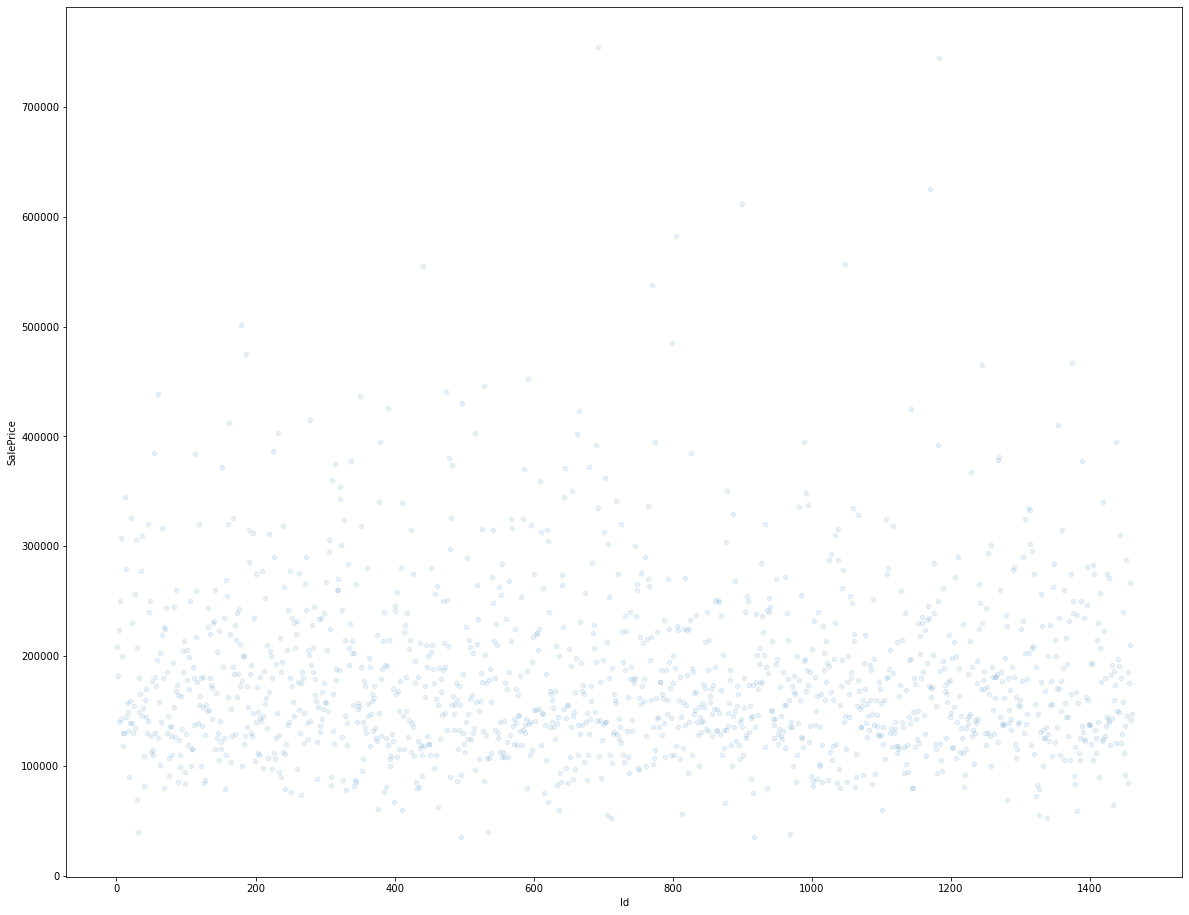

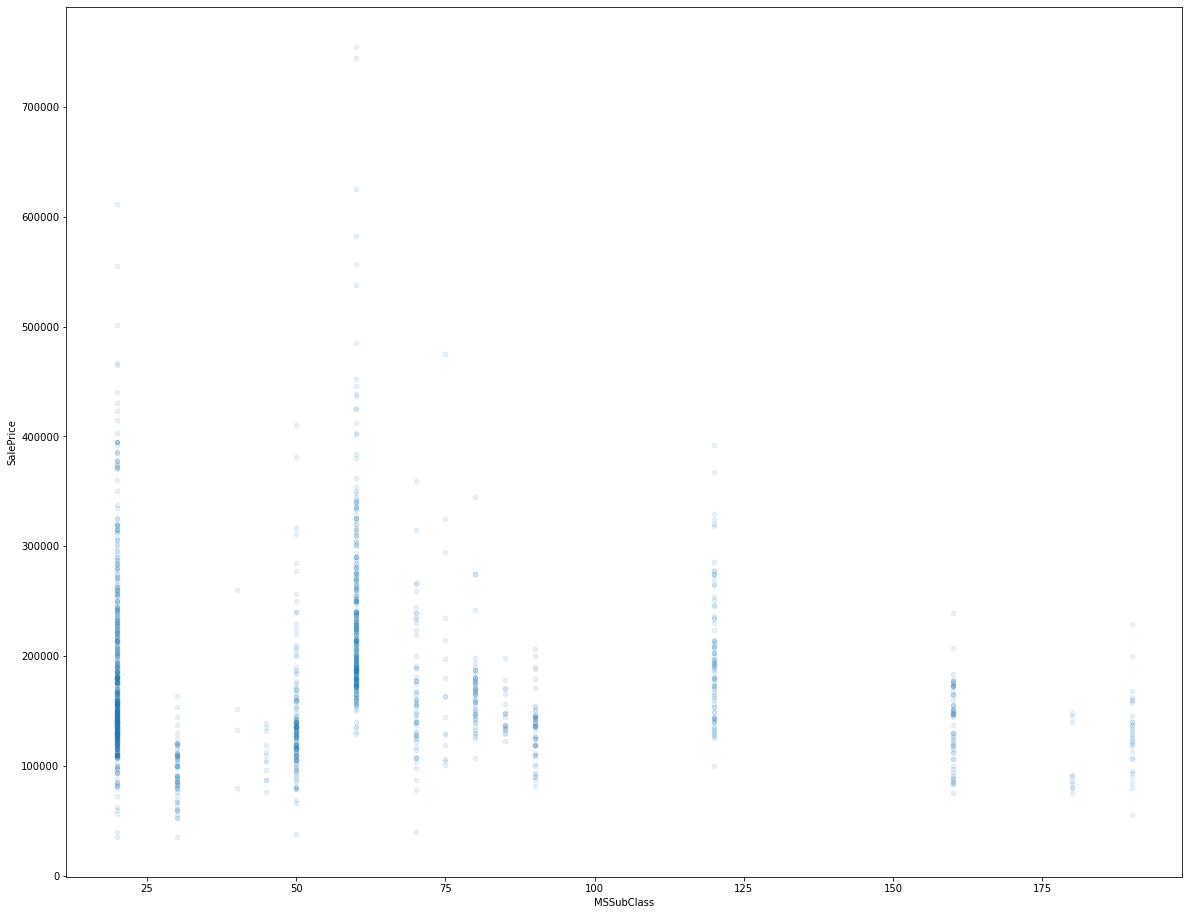

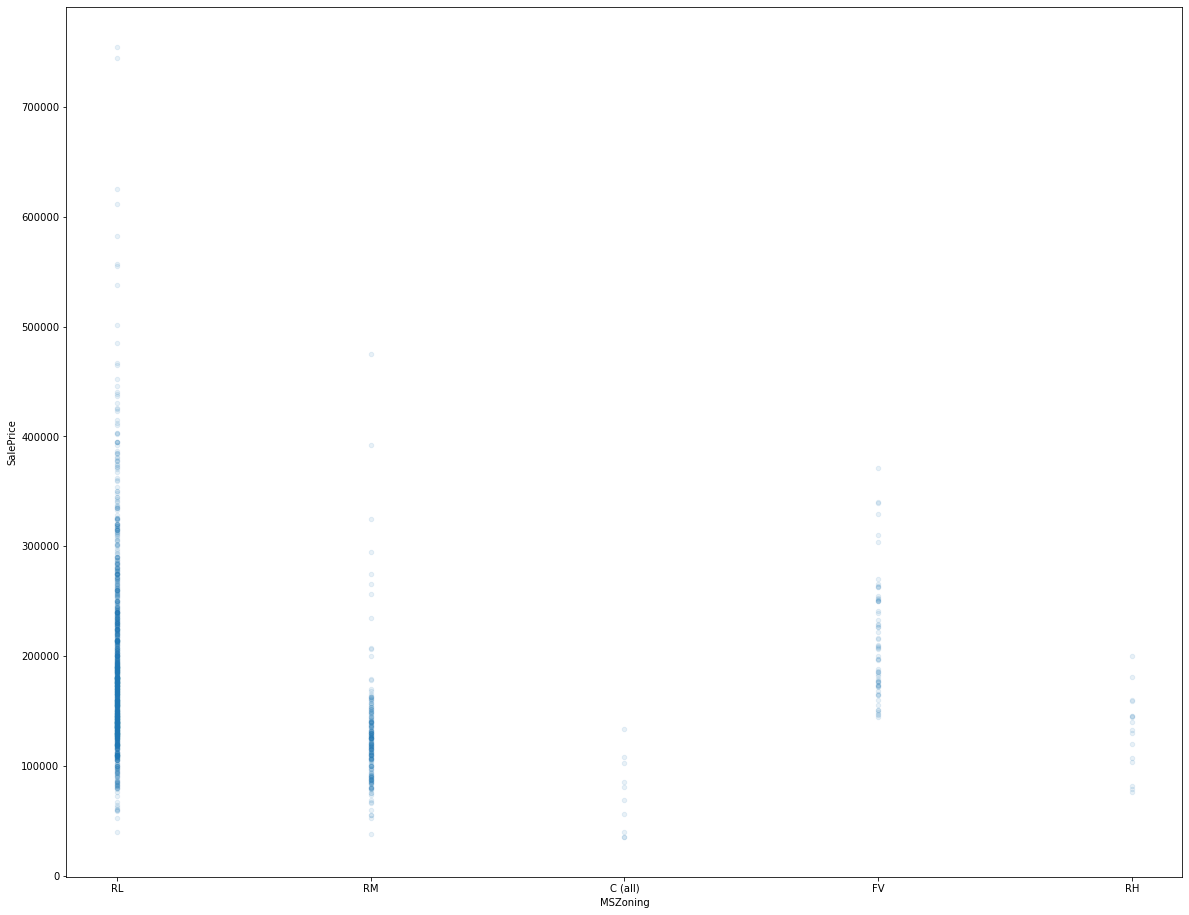

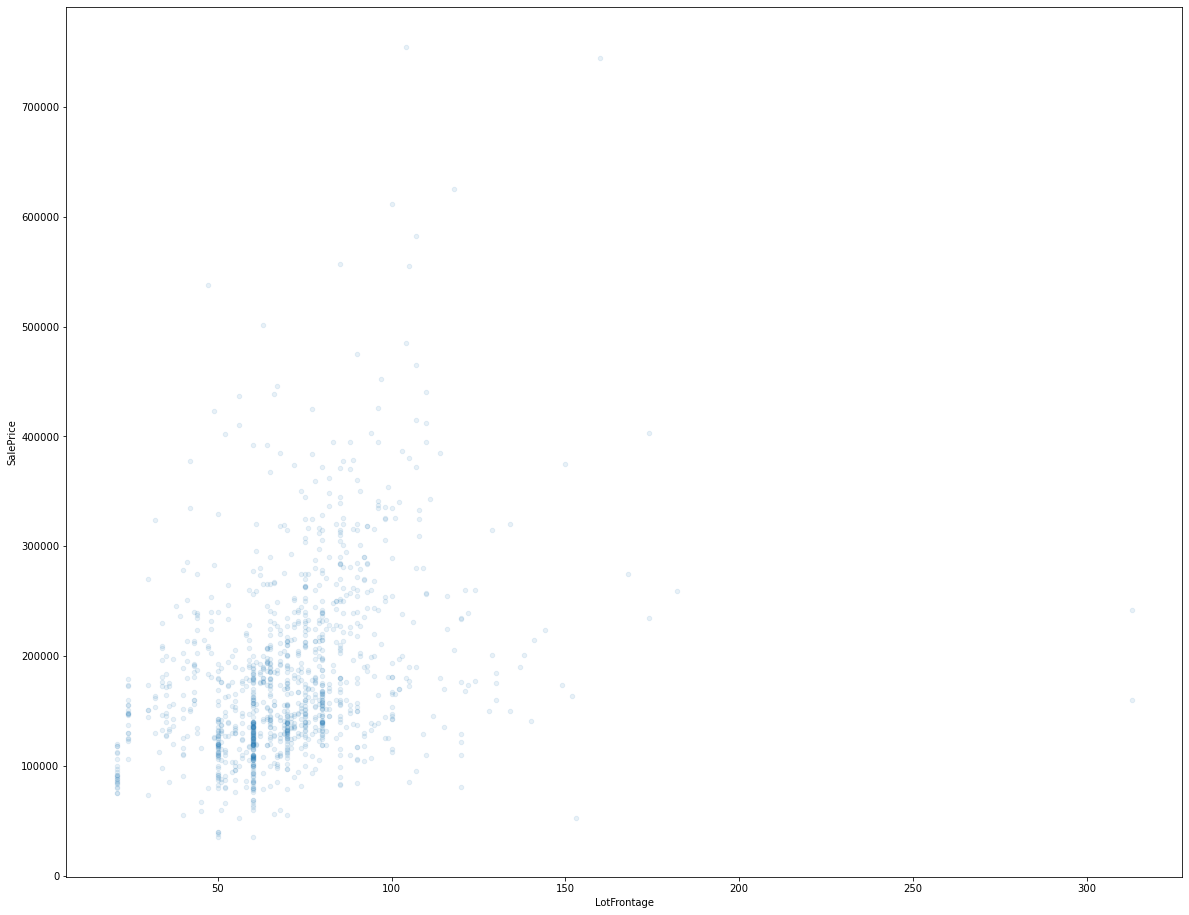

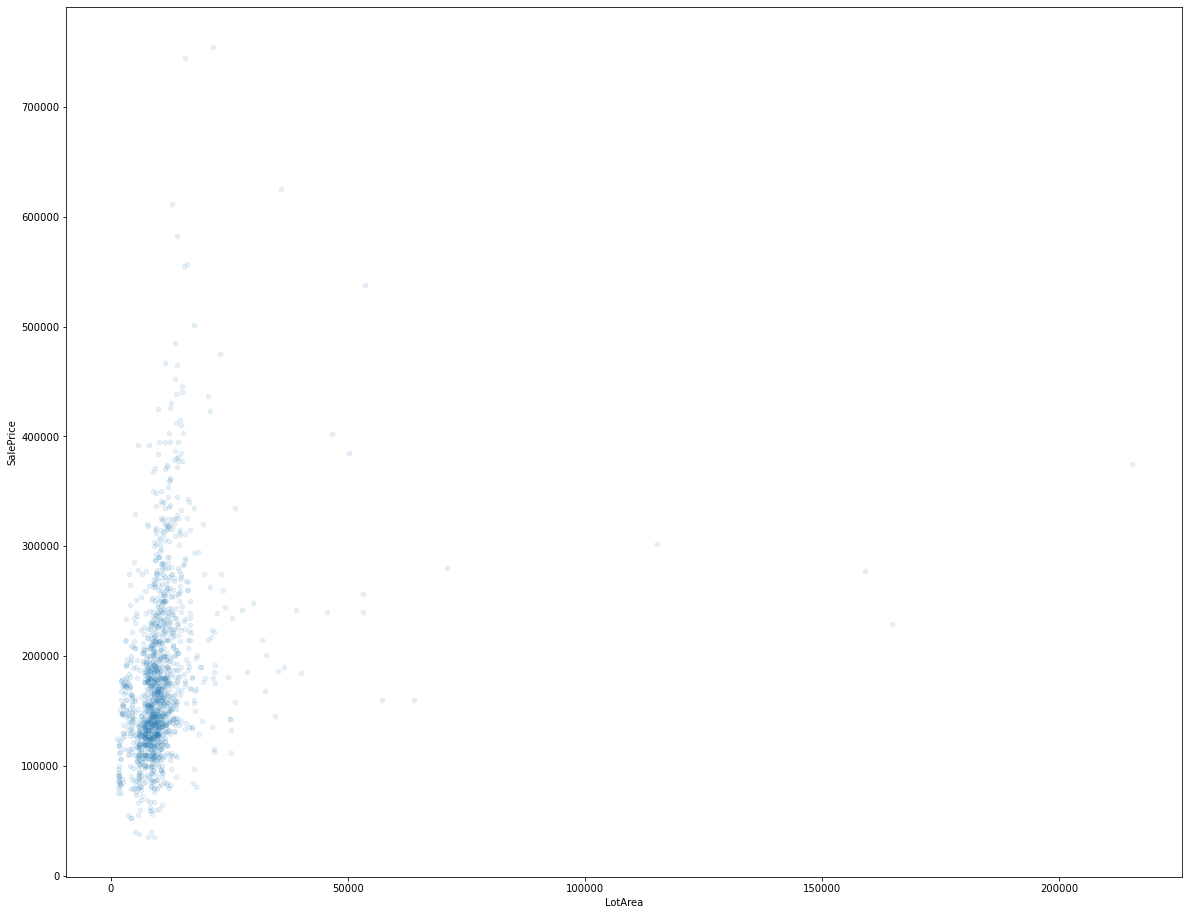

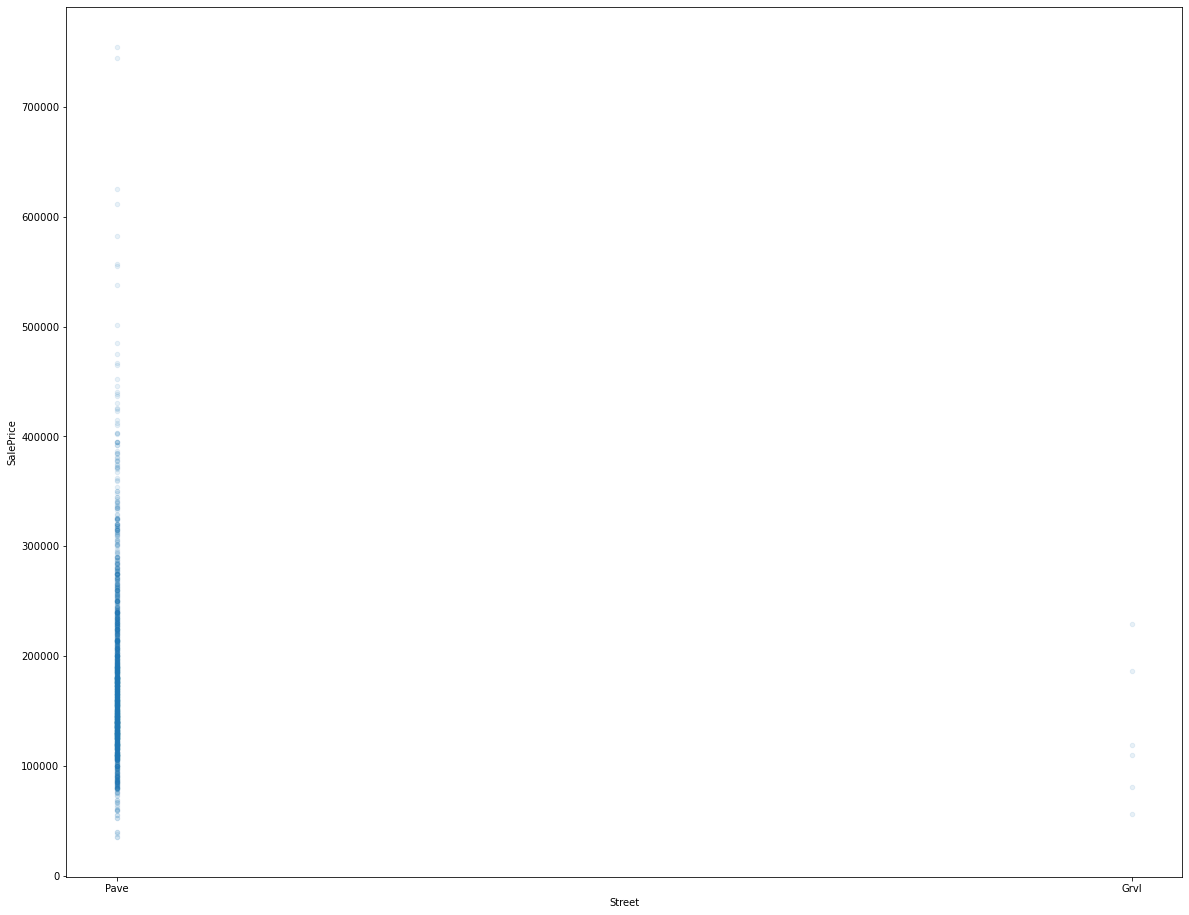

Unable to Plot Alley


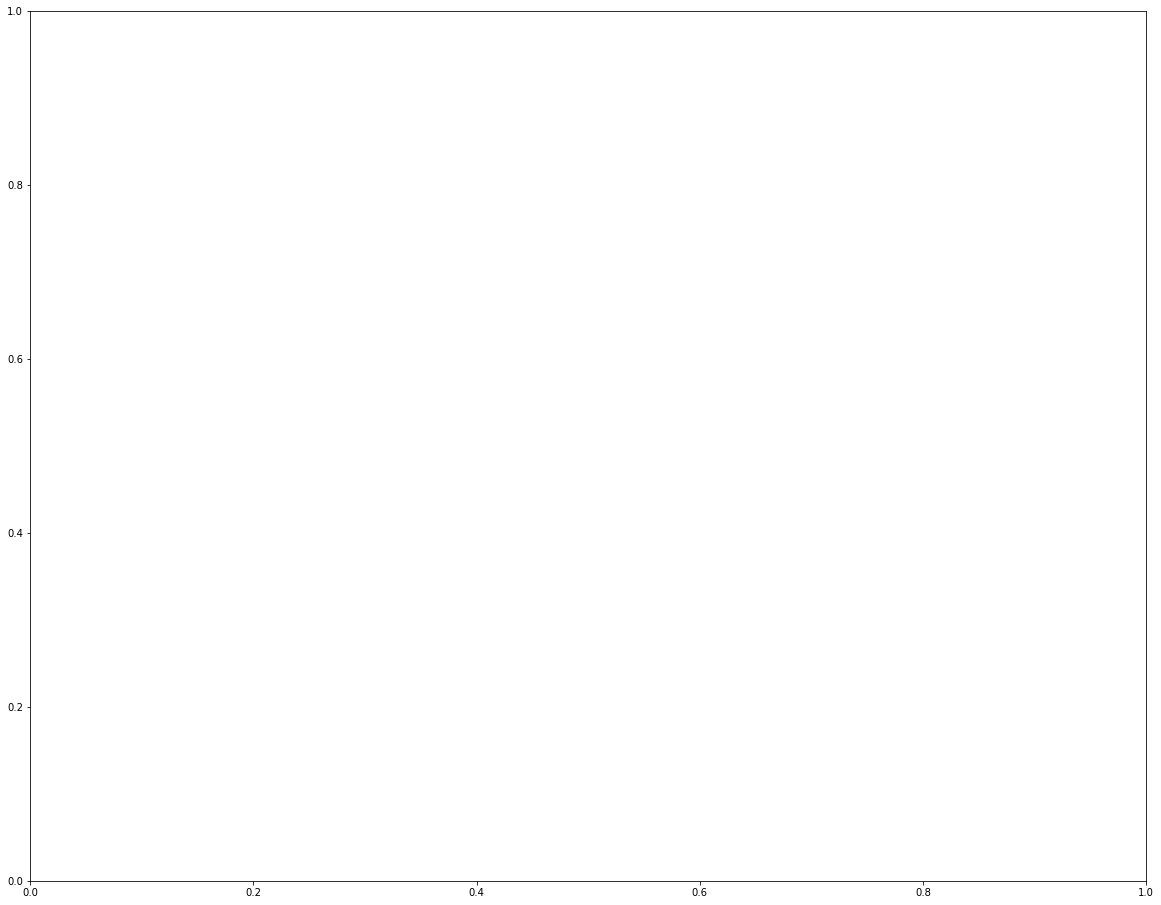

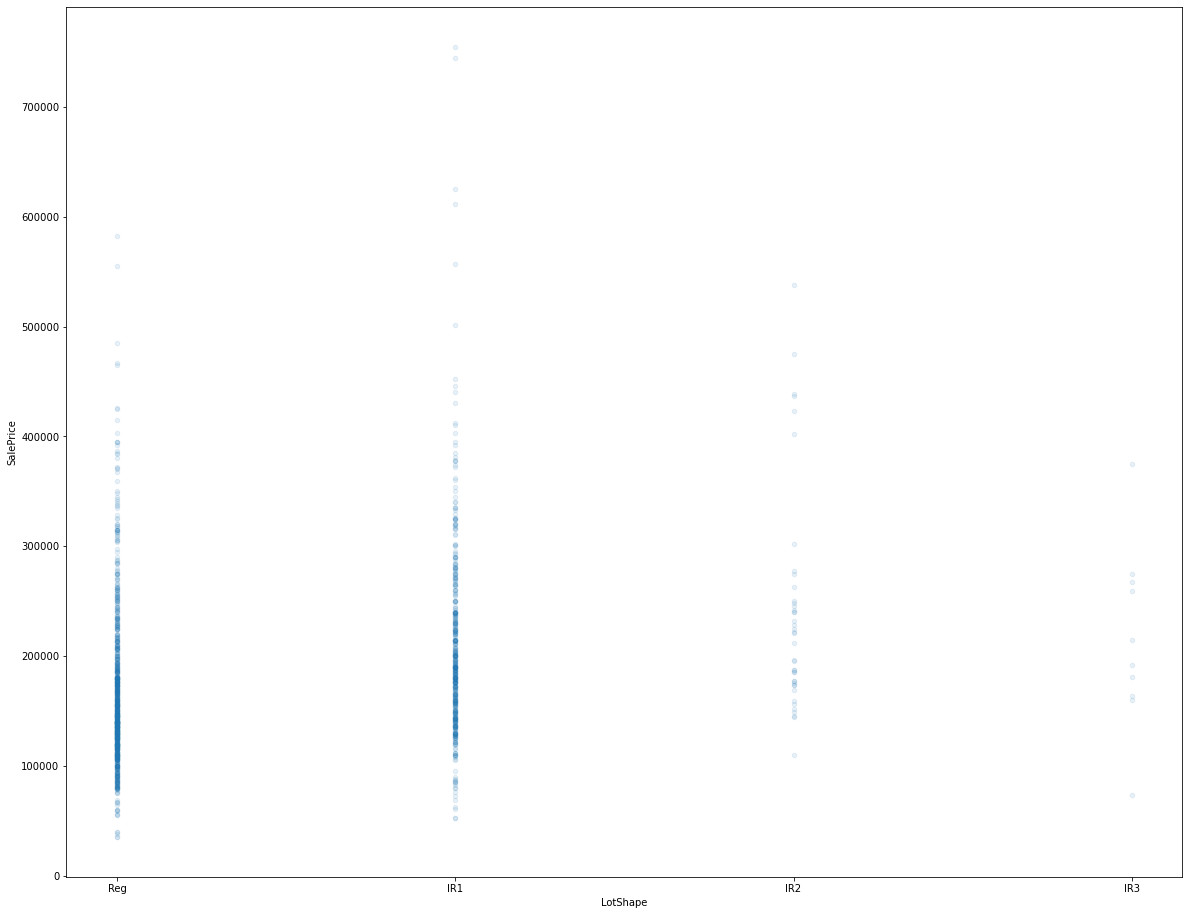

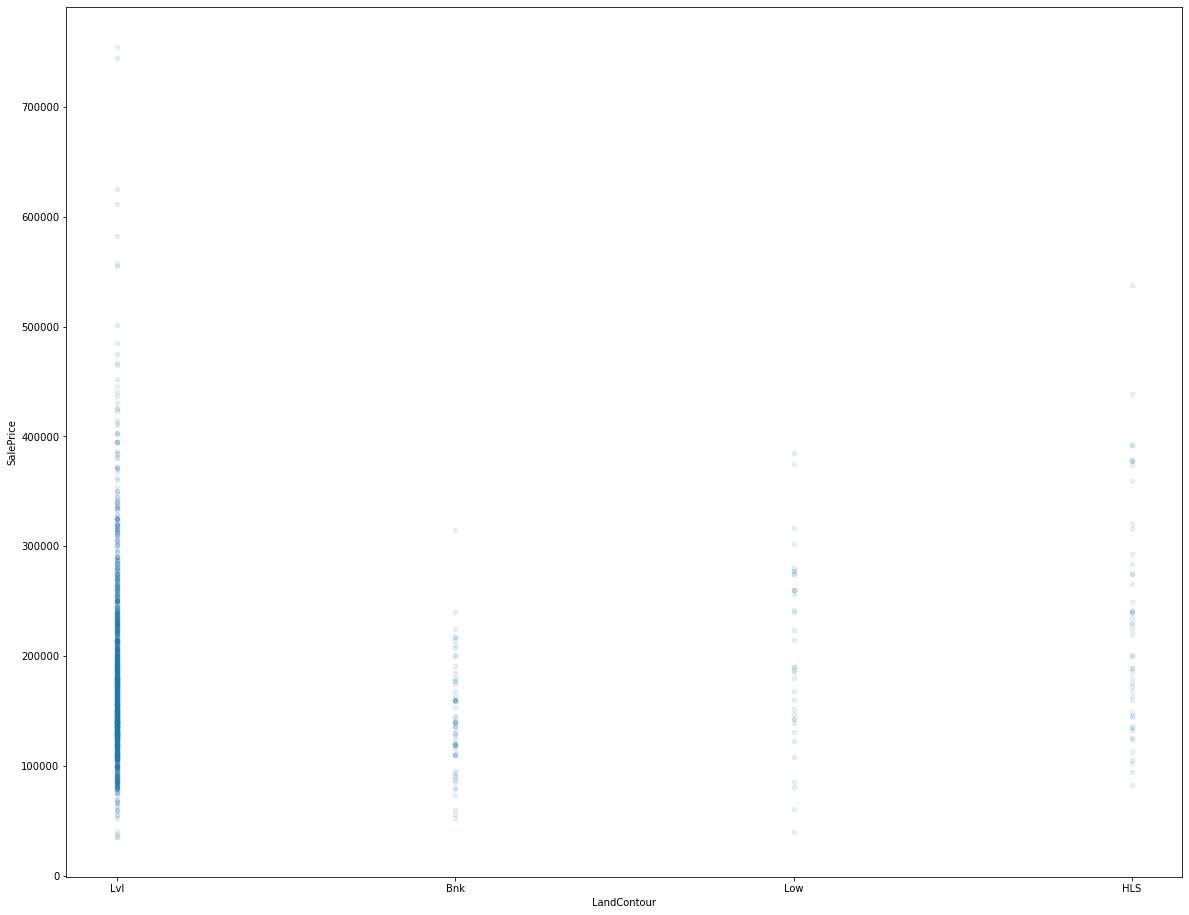

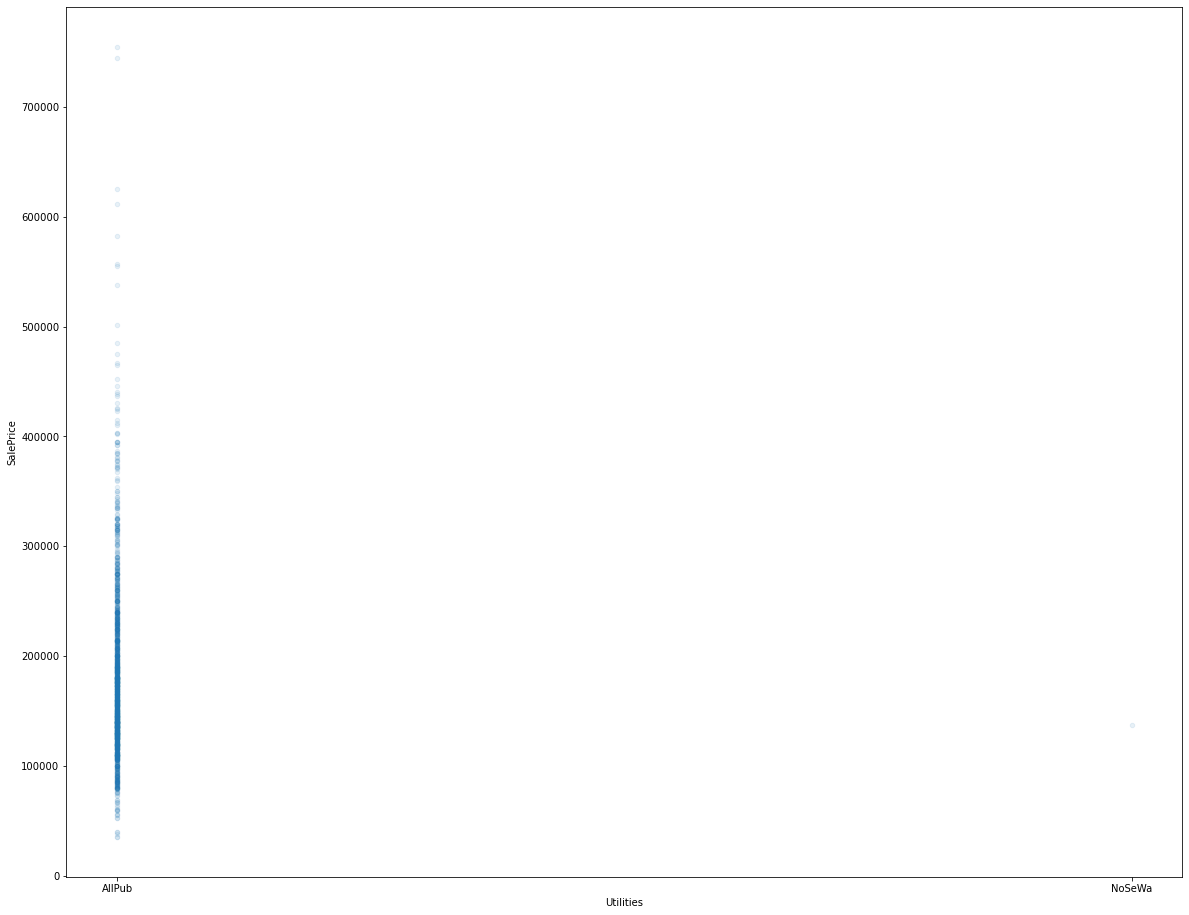

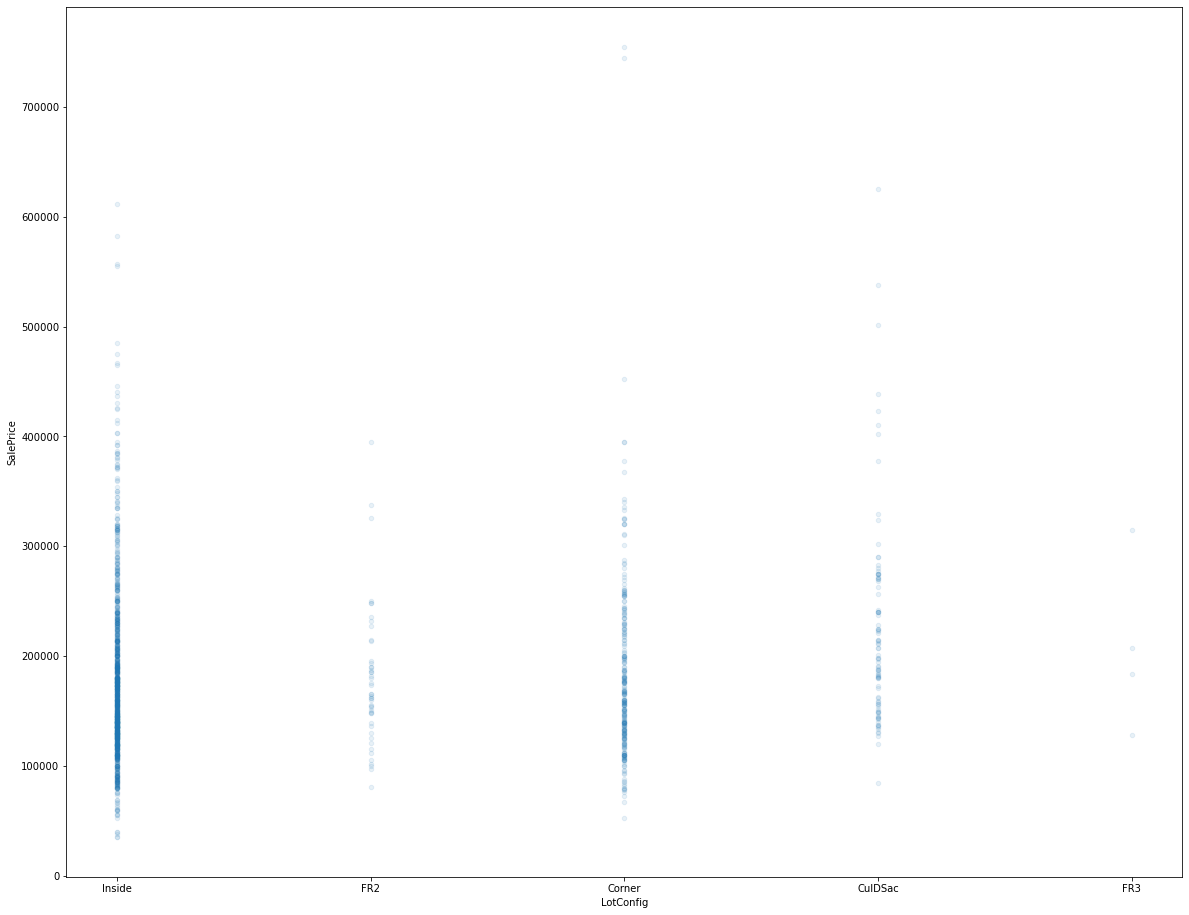

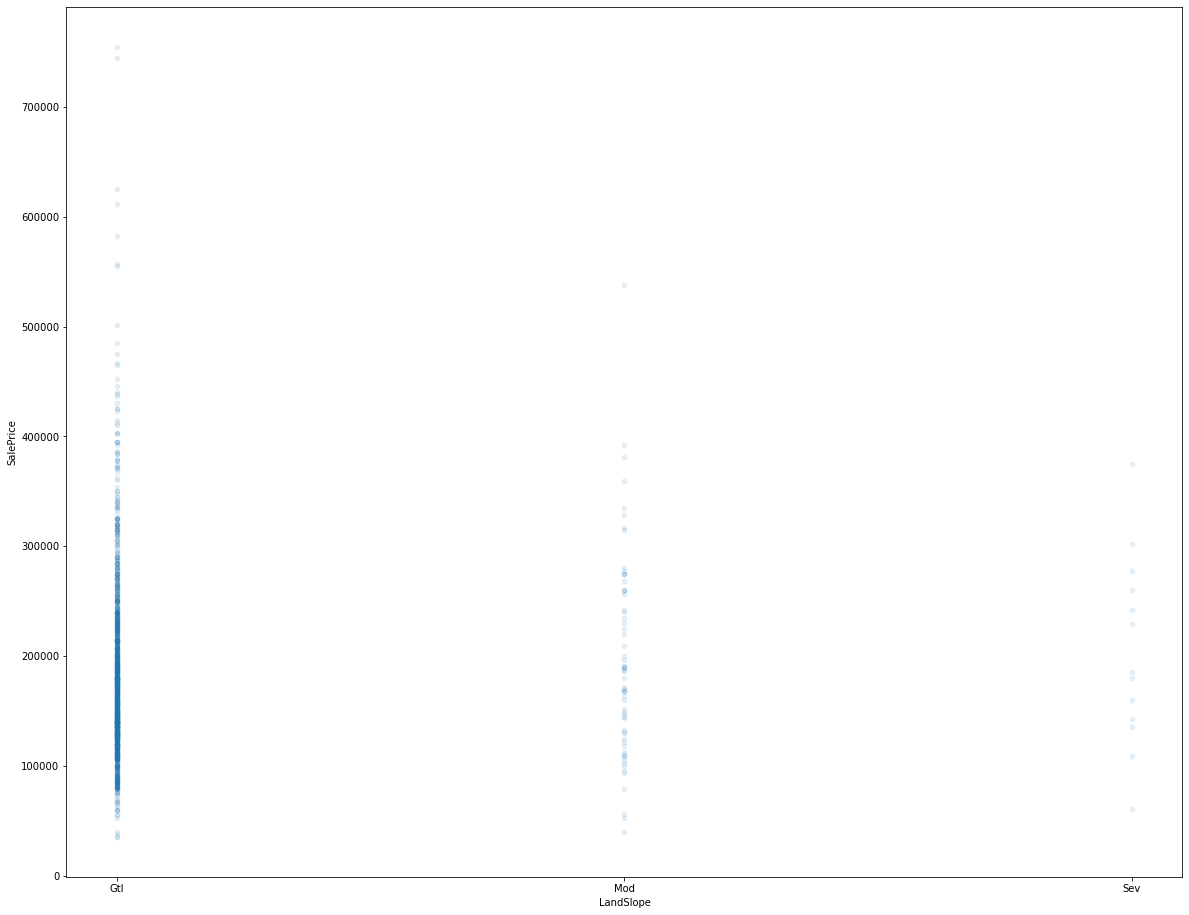

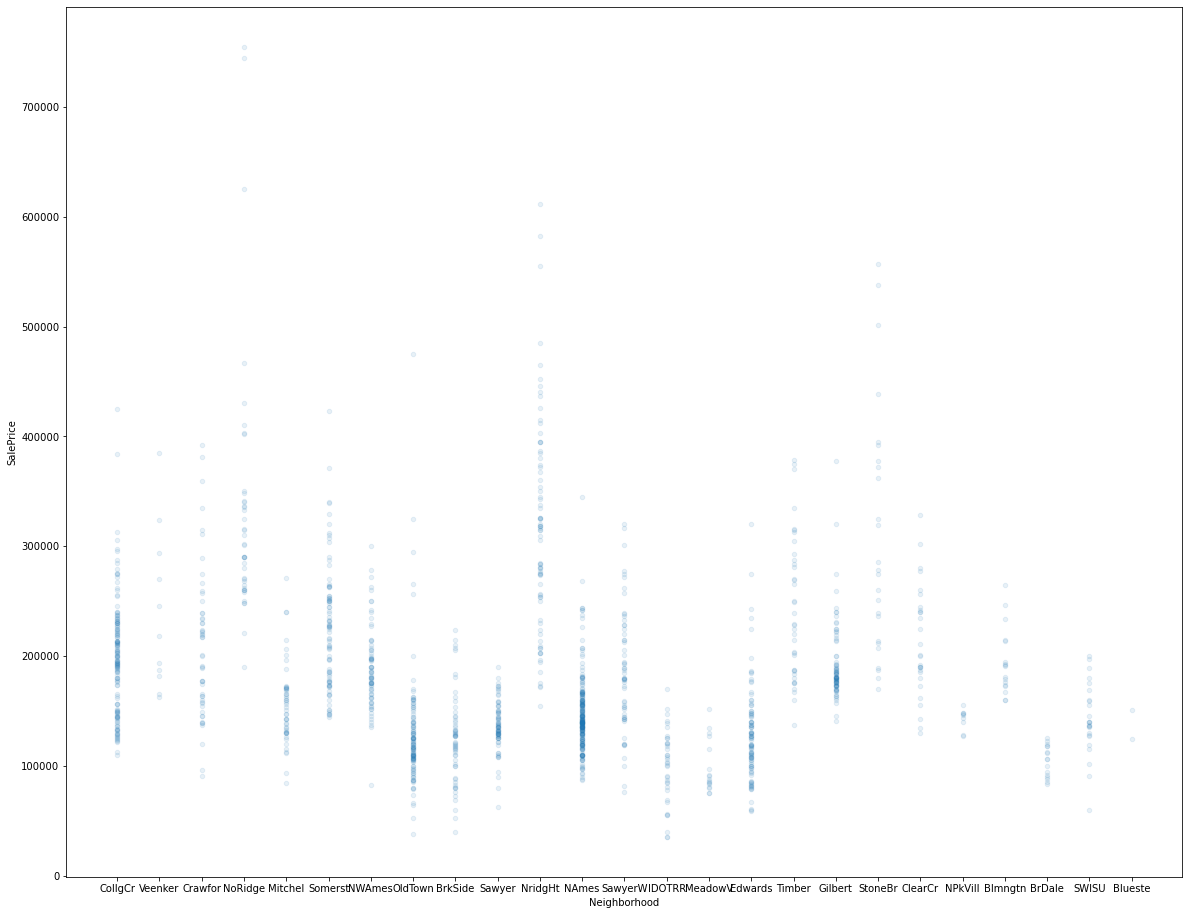

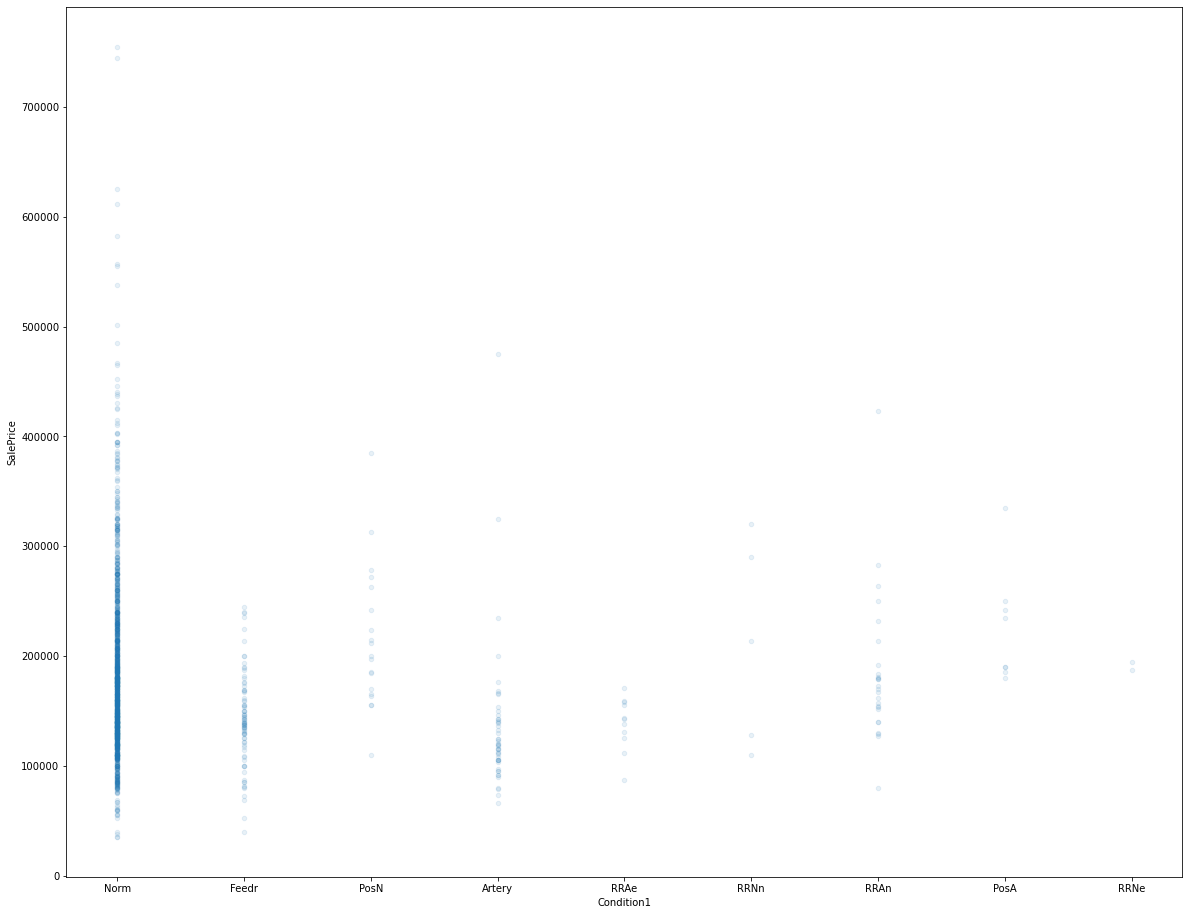

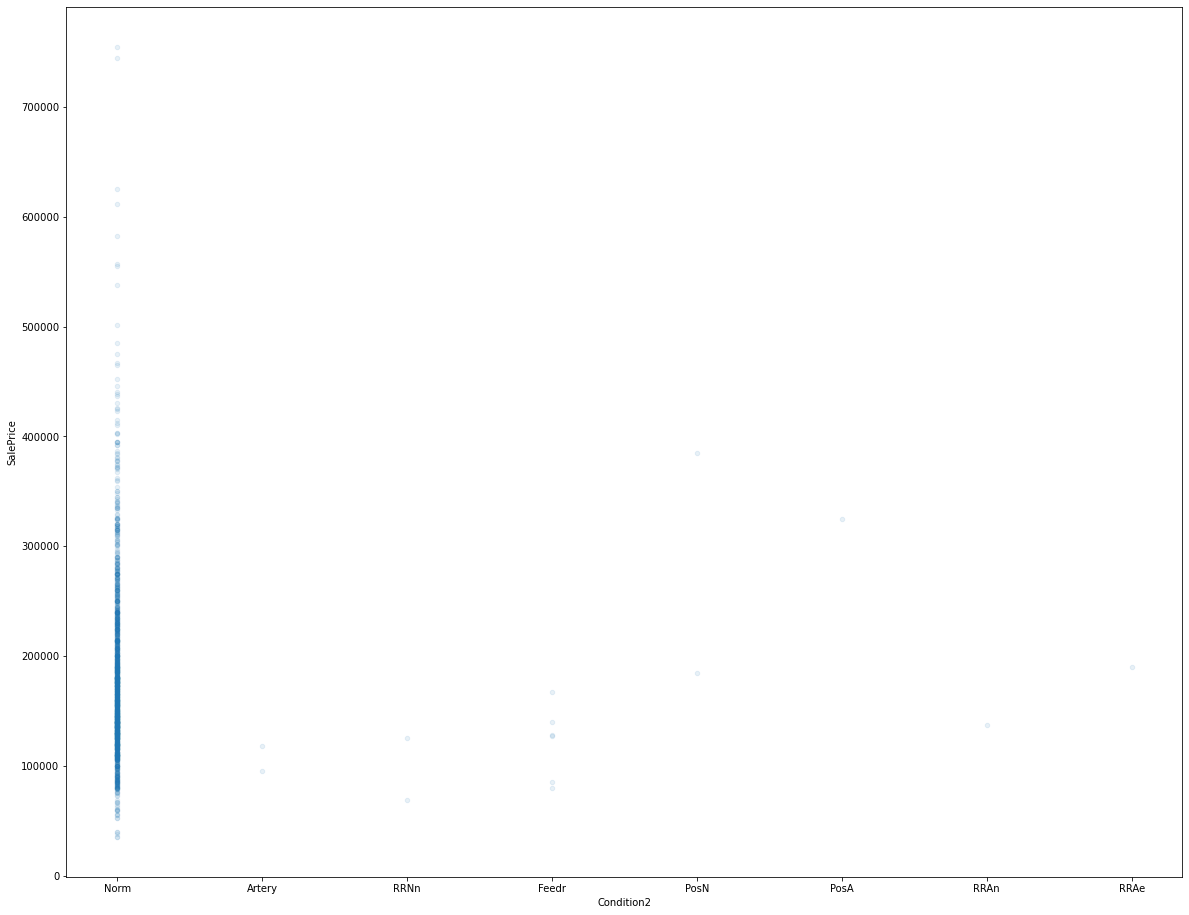

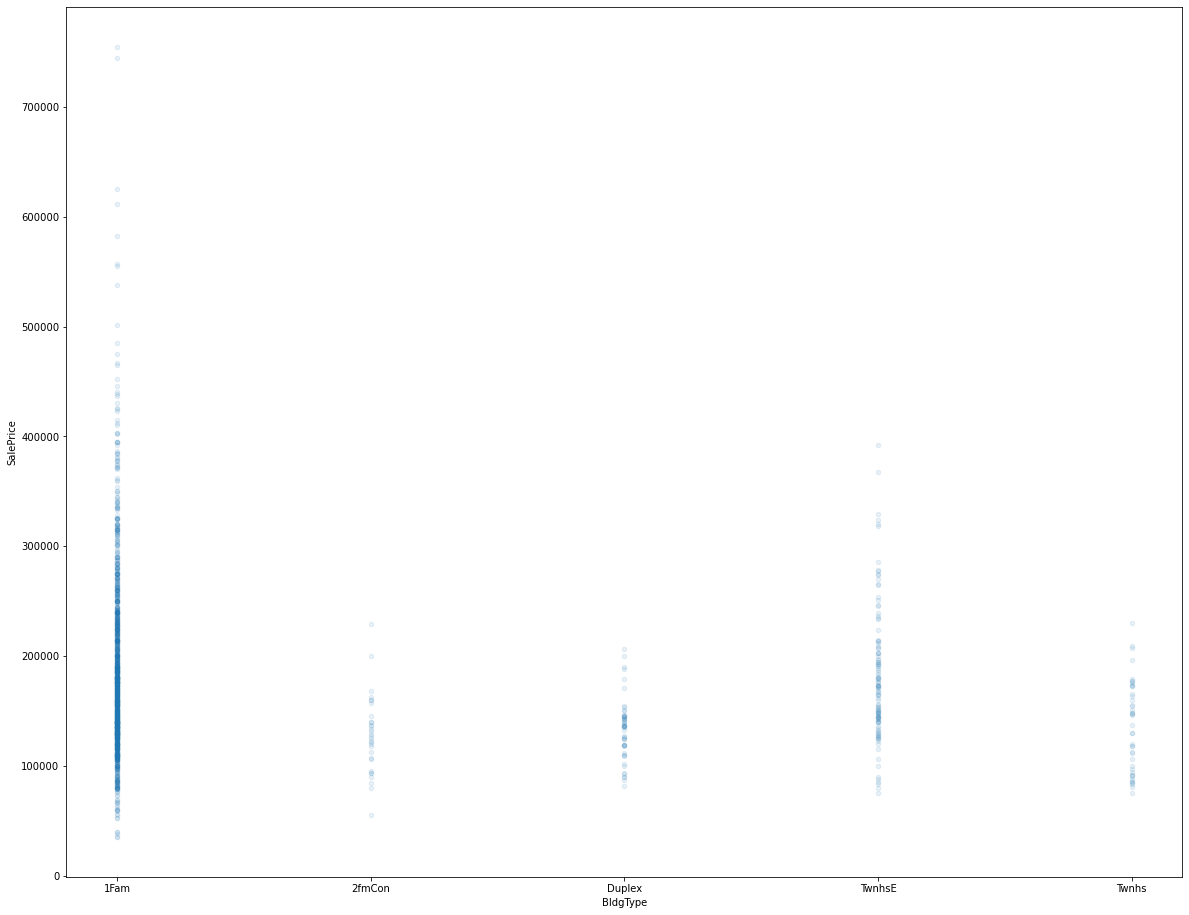

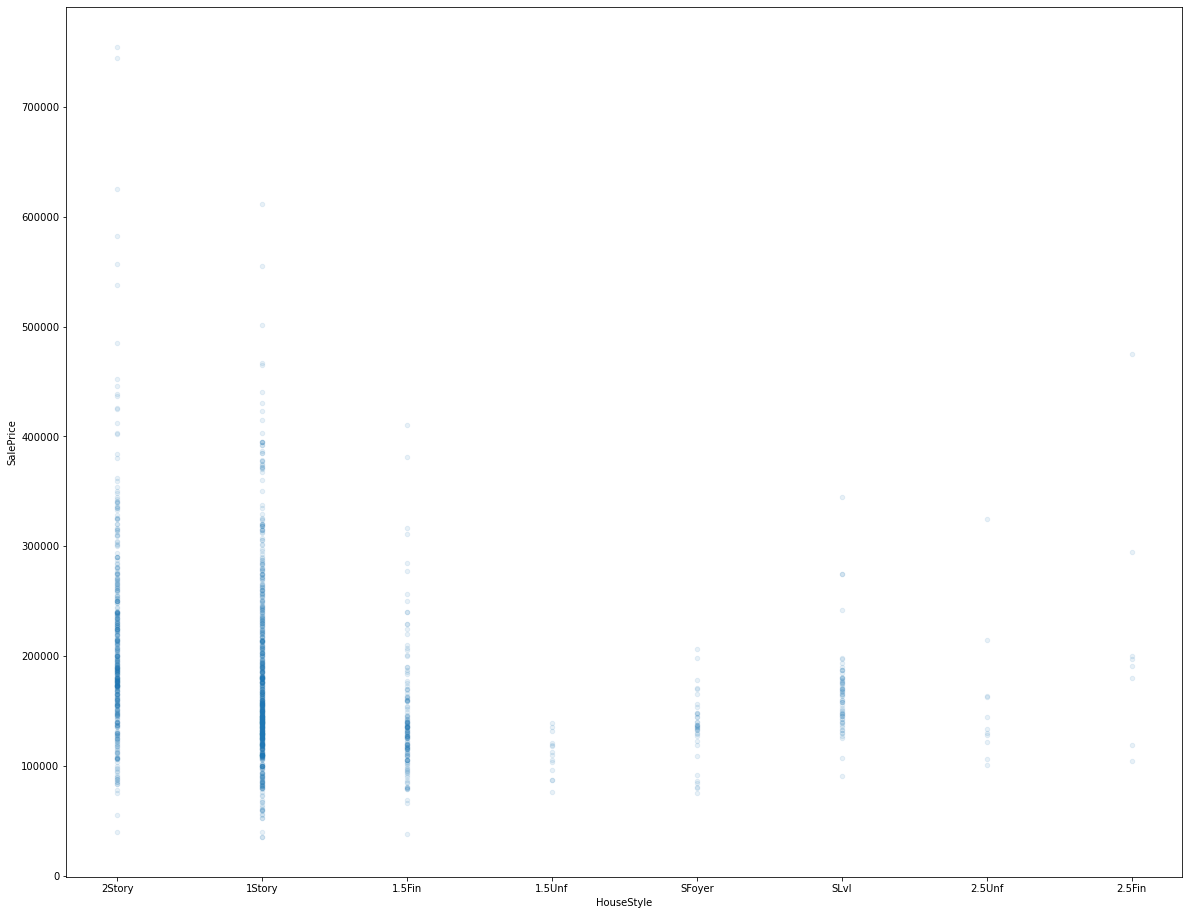

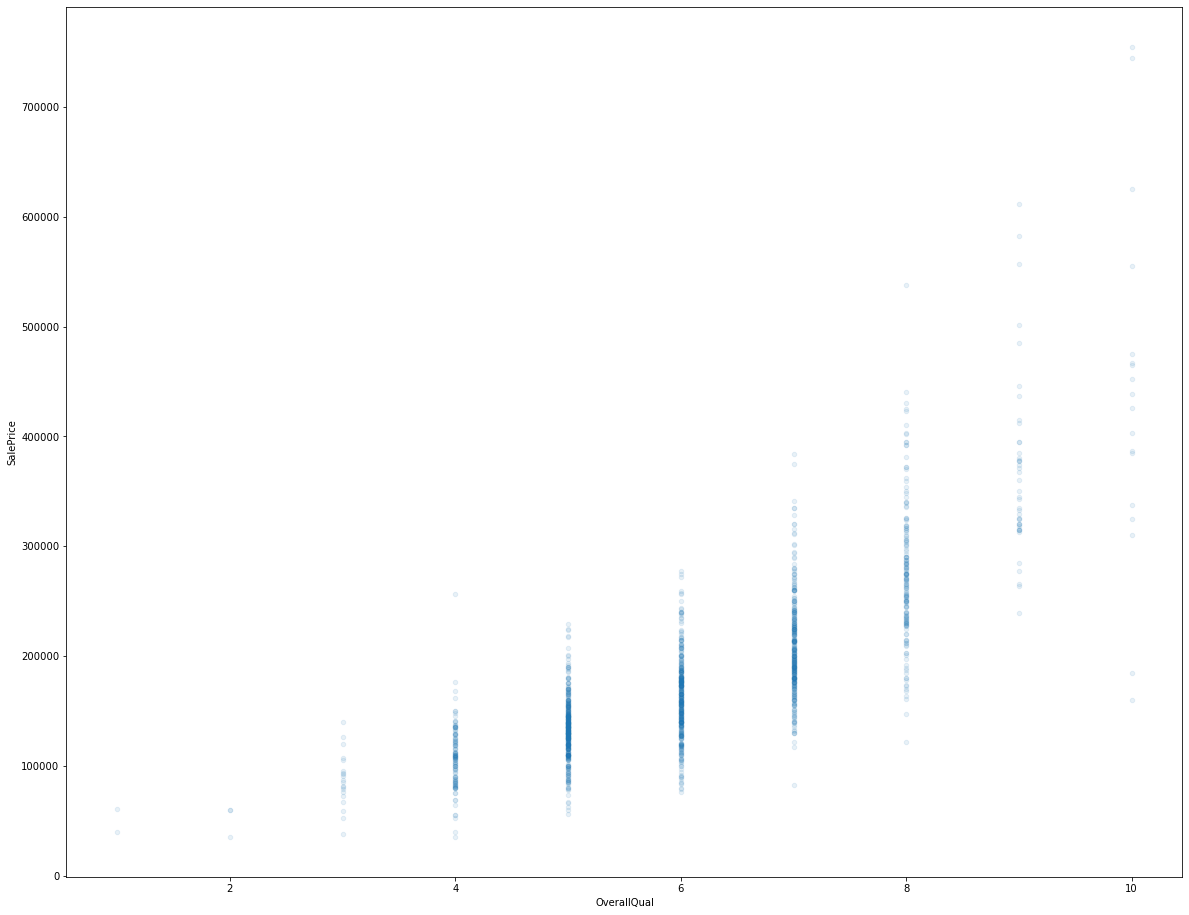

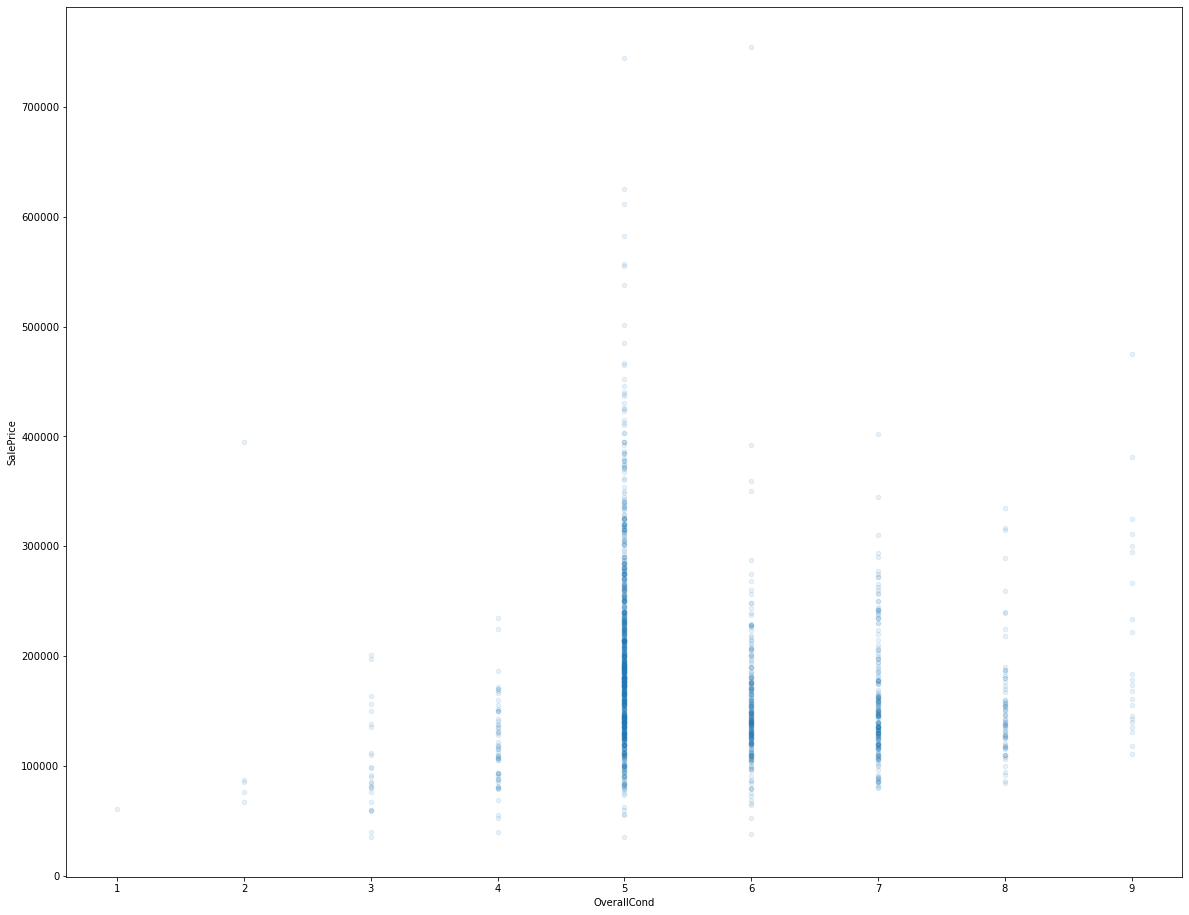

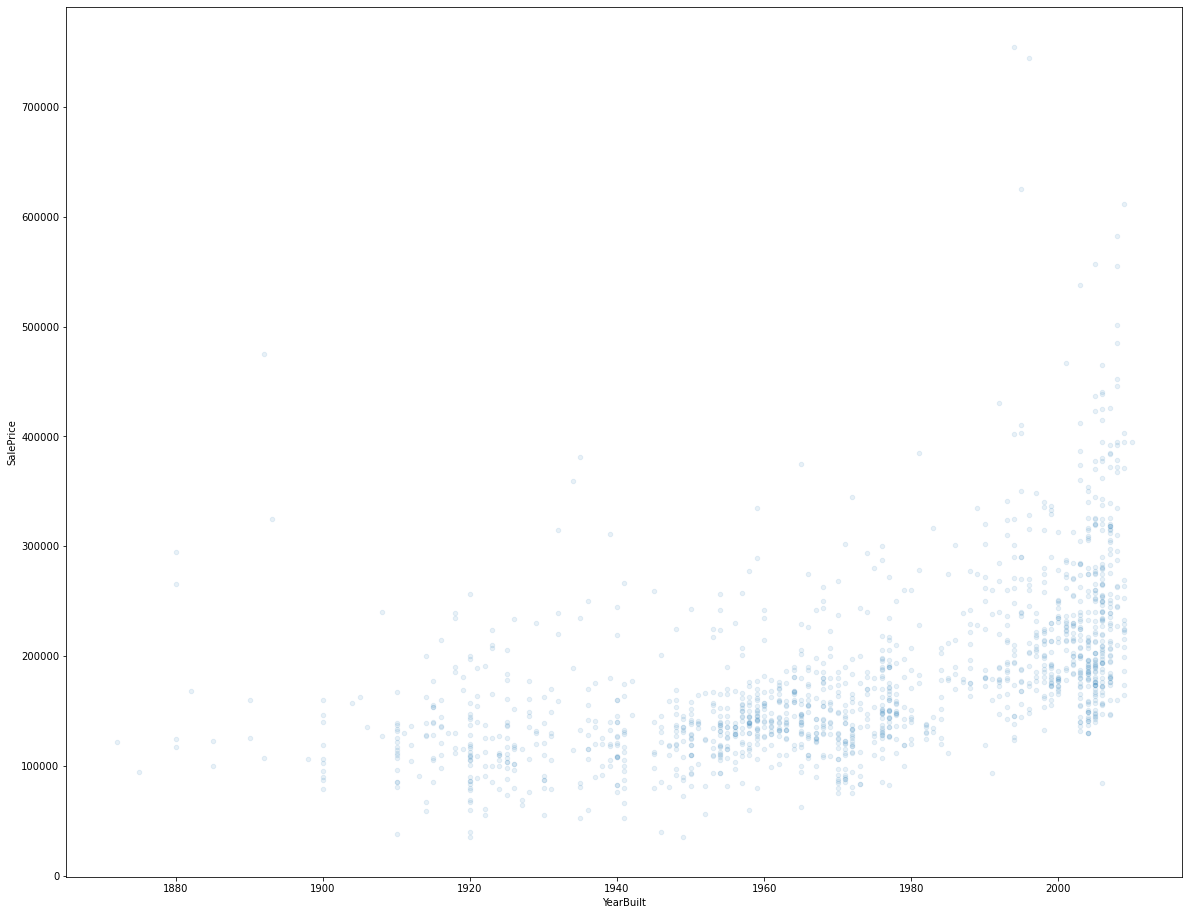

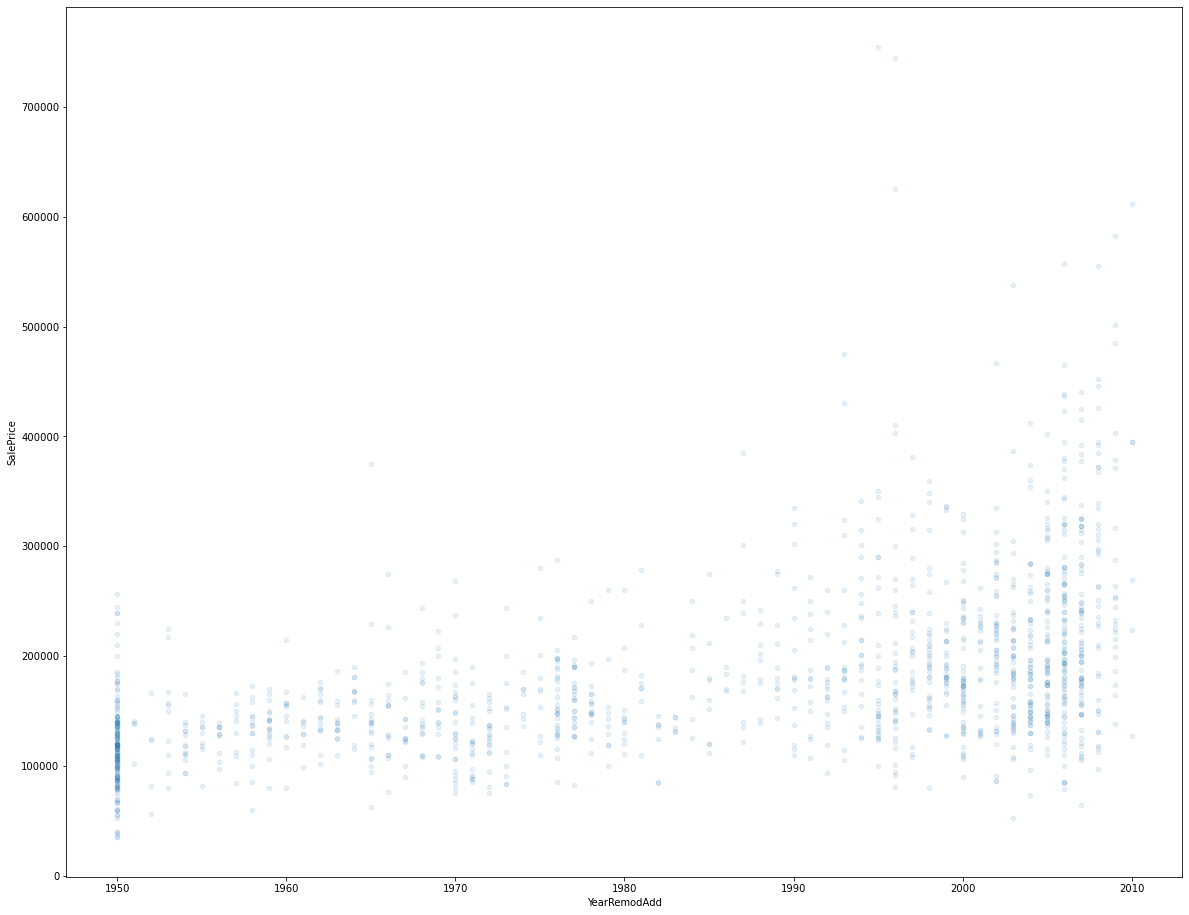

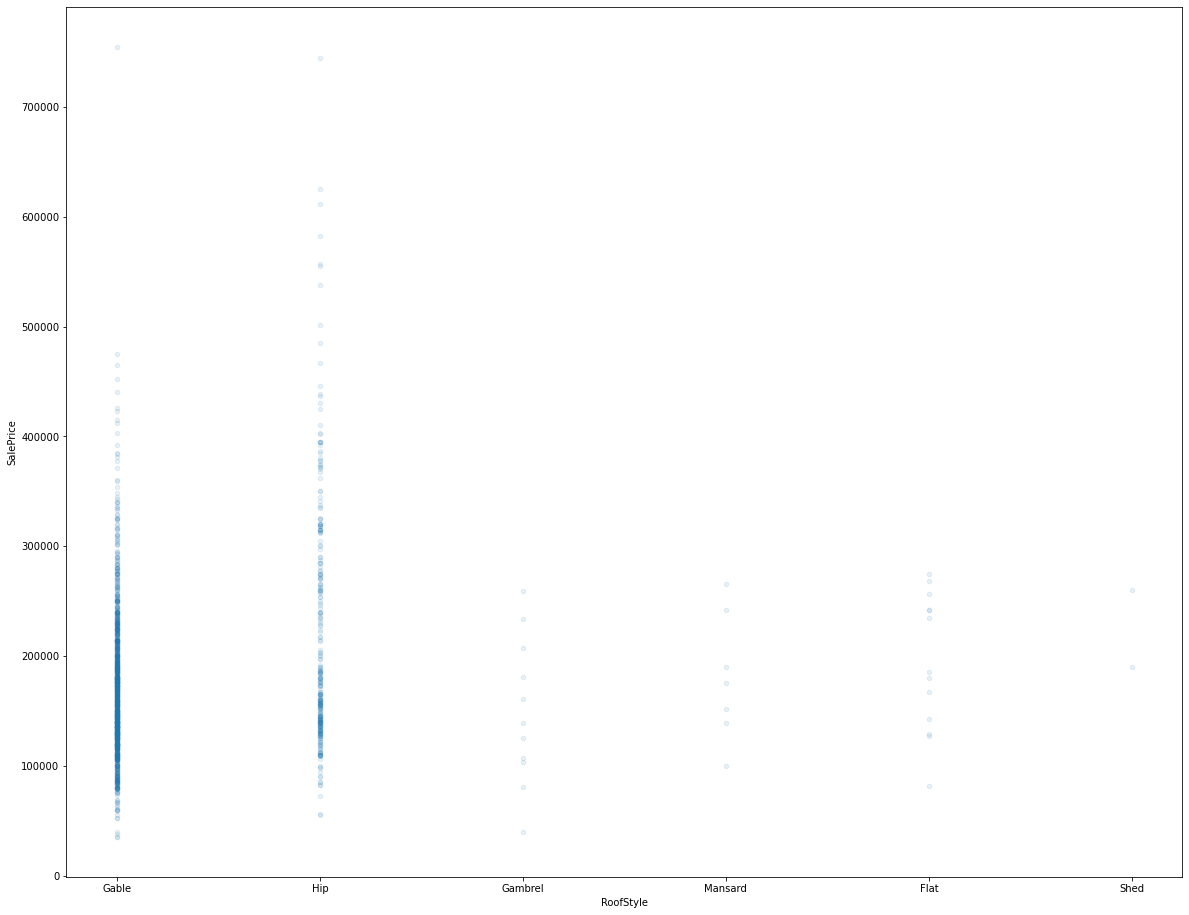

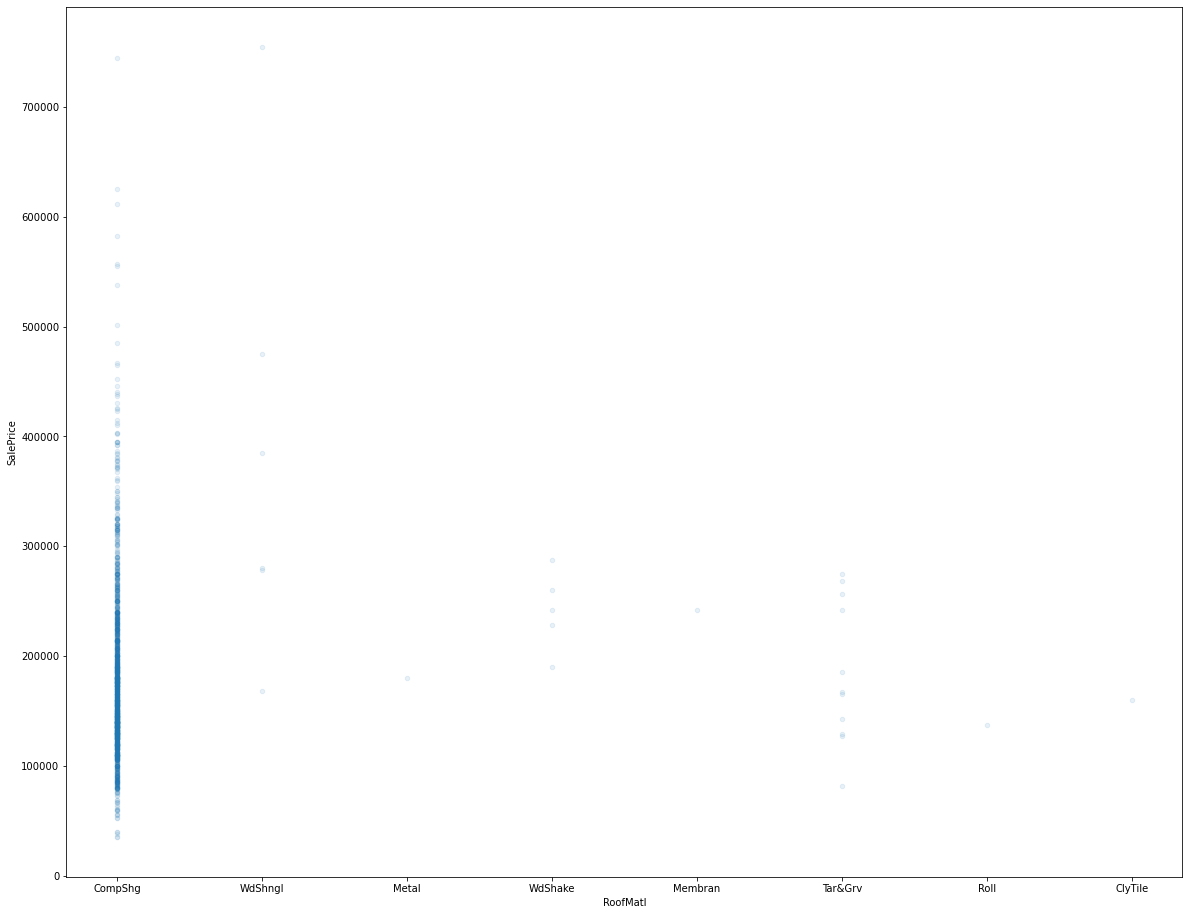

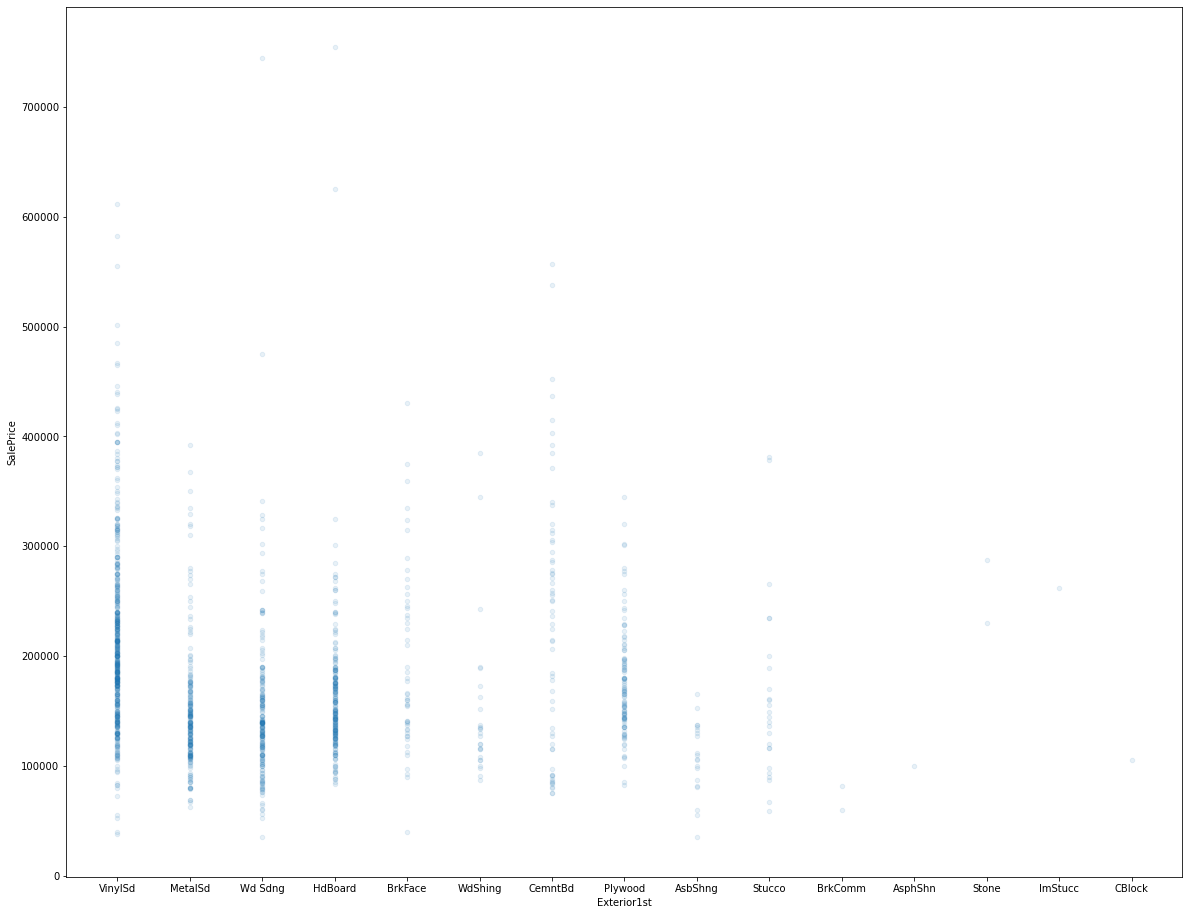

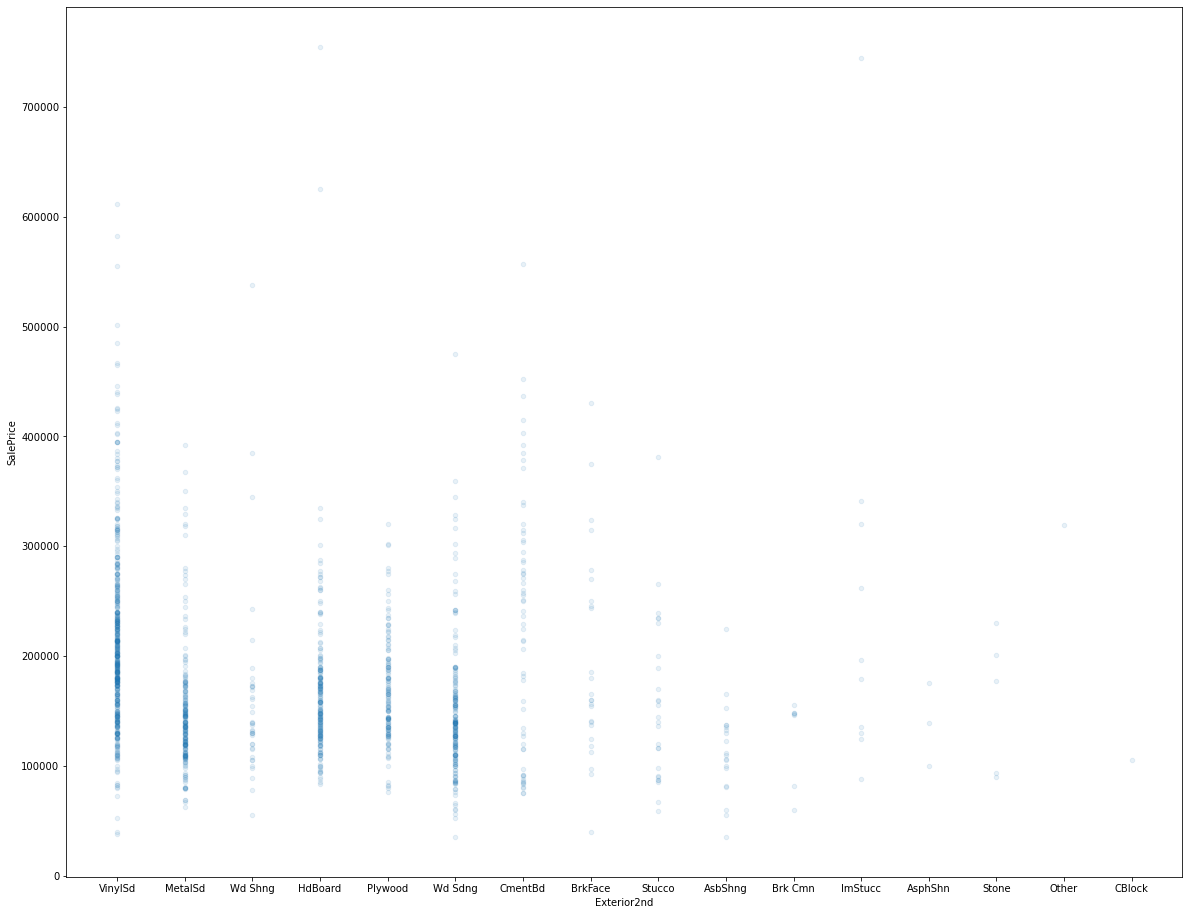

Unable to Plot MasVnrType


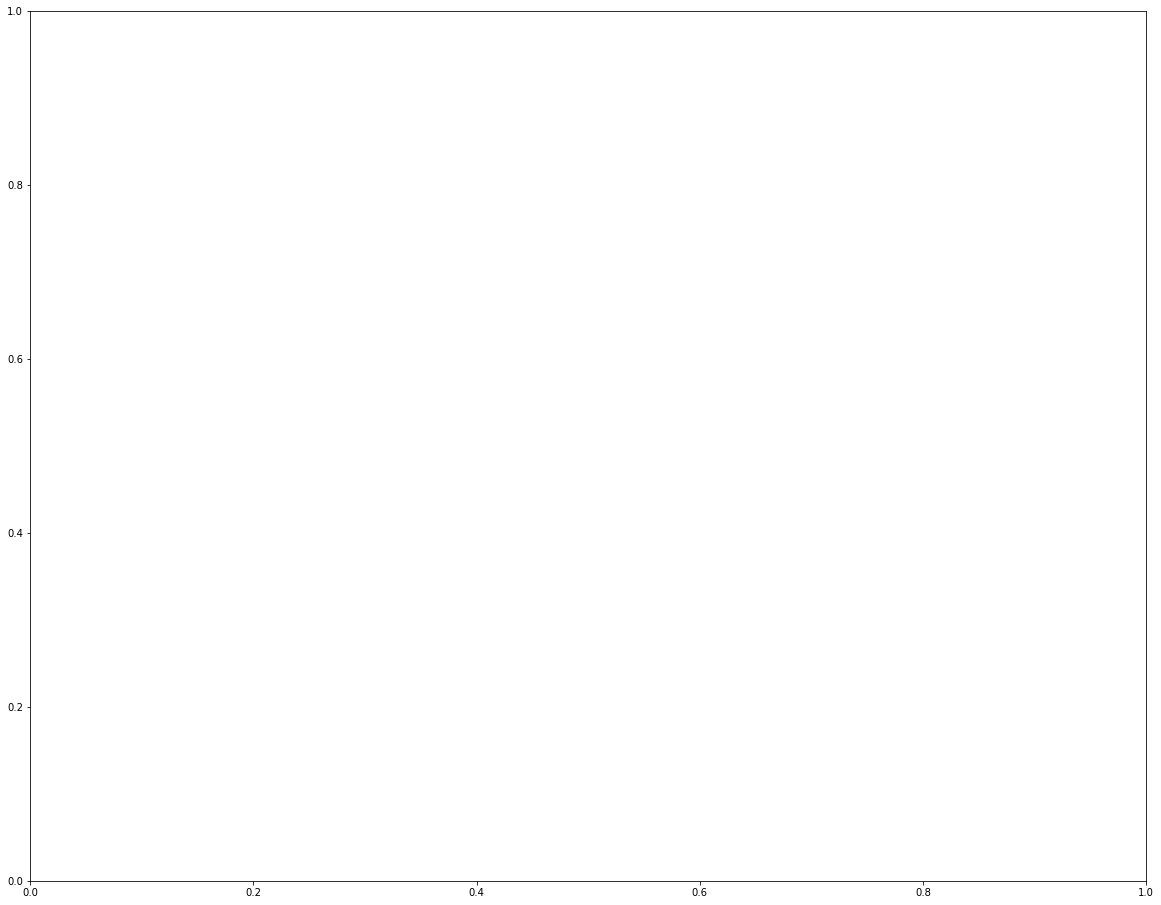

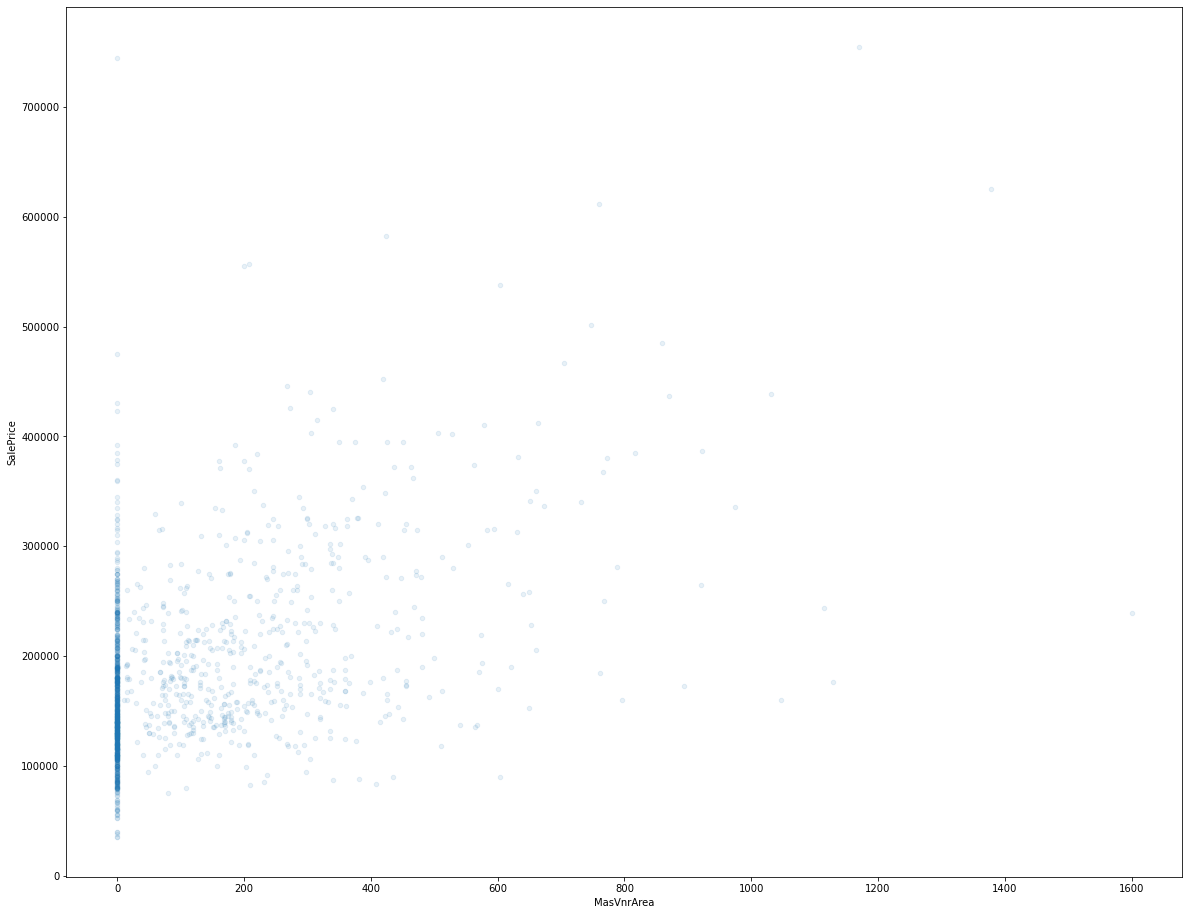

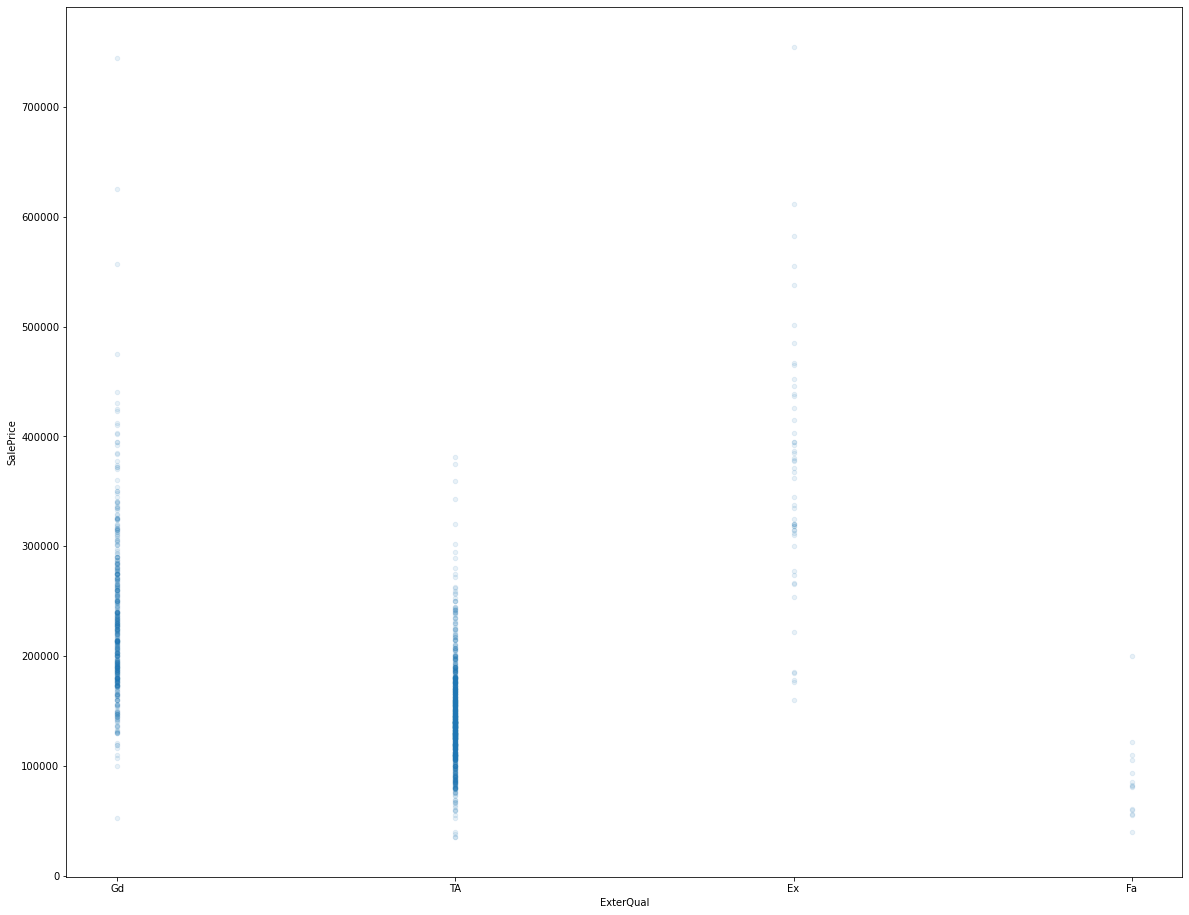

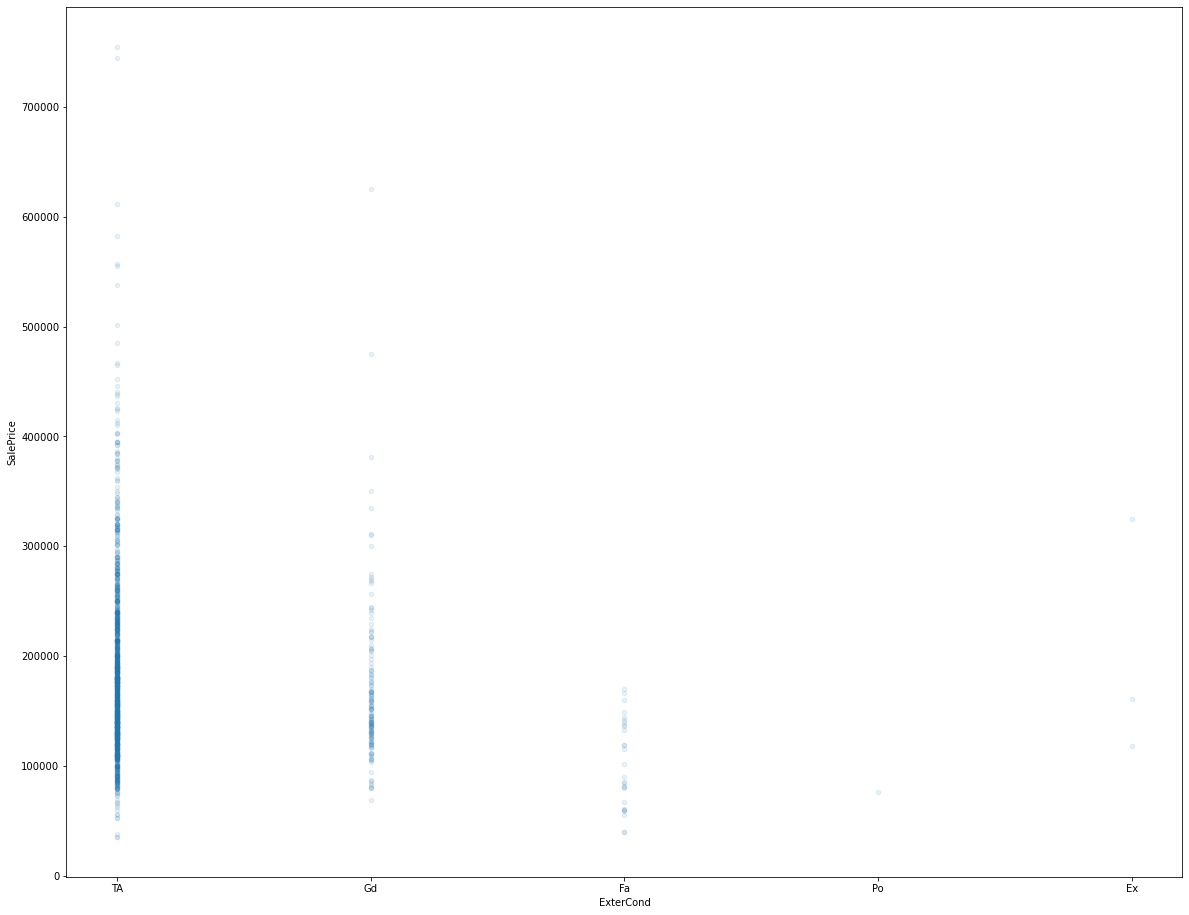

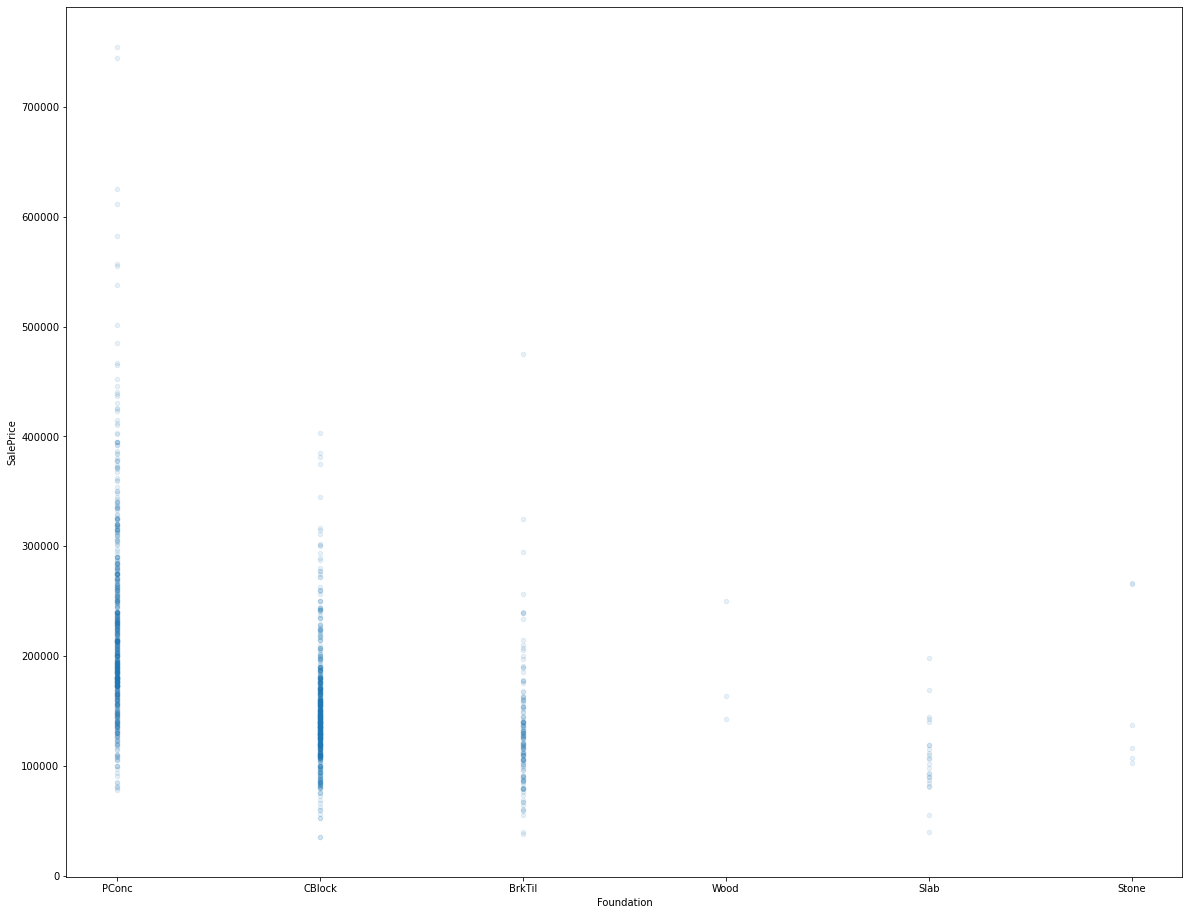

Unable to Plot BsmtQual
Unable to Plot BsmtCond
Unable to Plot BsmtExposure
Unable to Plot BsmtFinType1


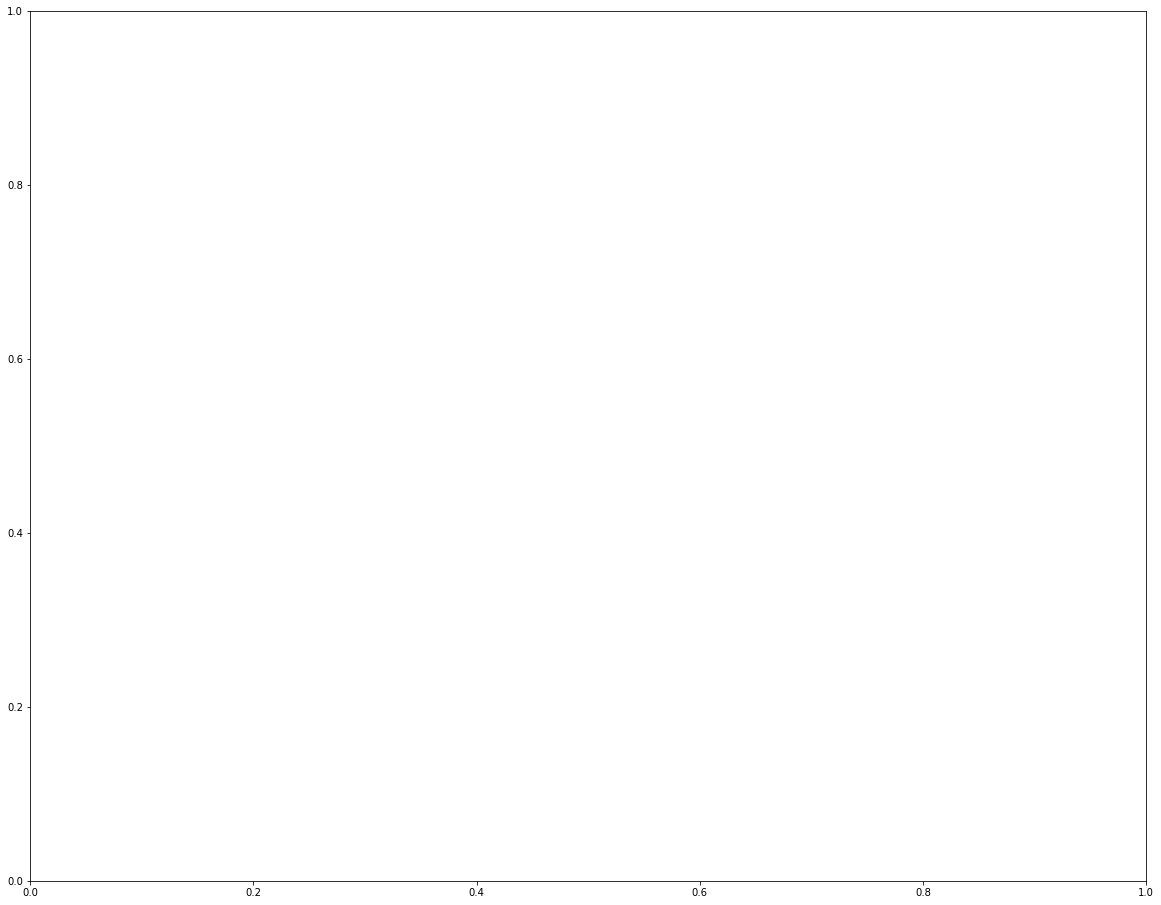

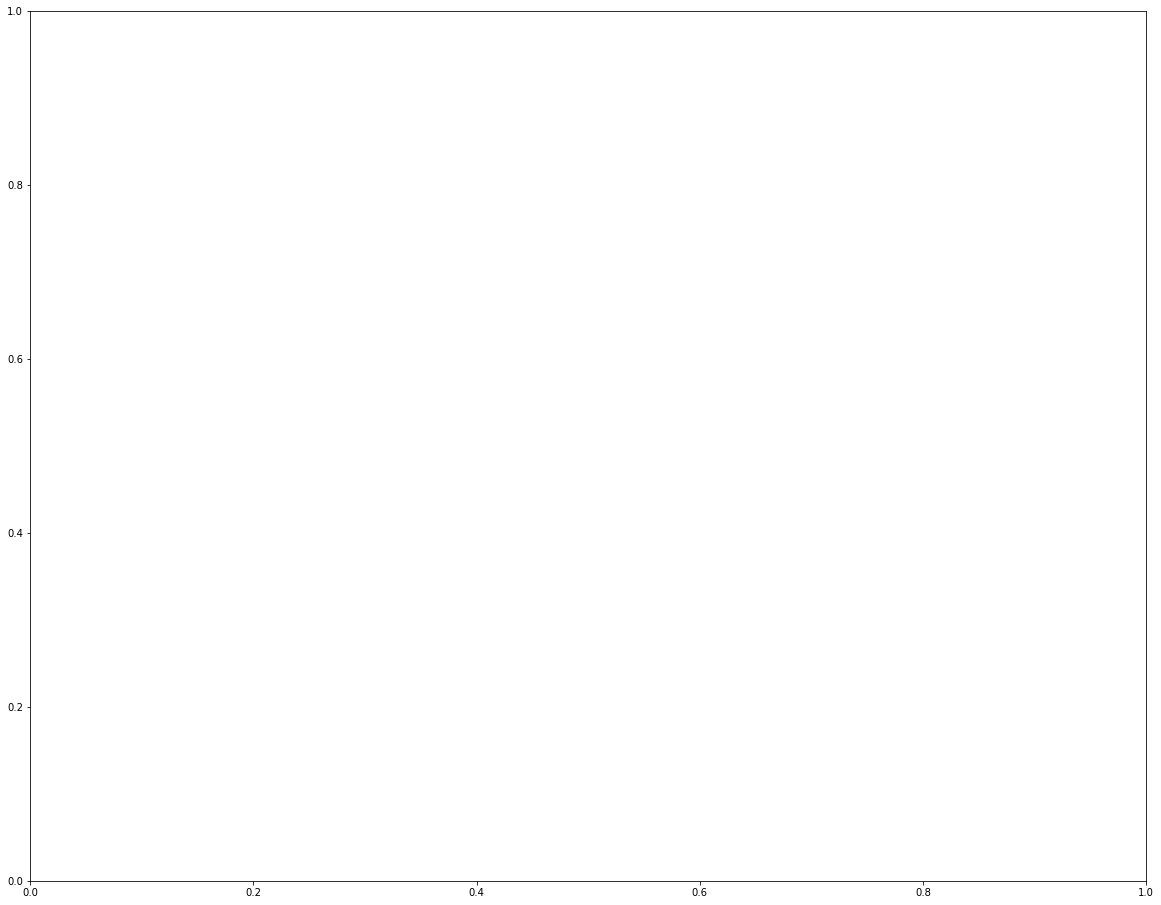

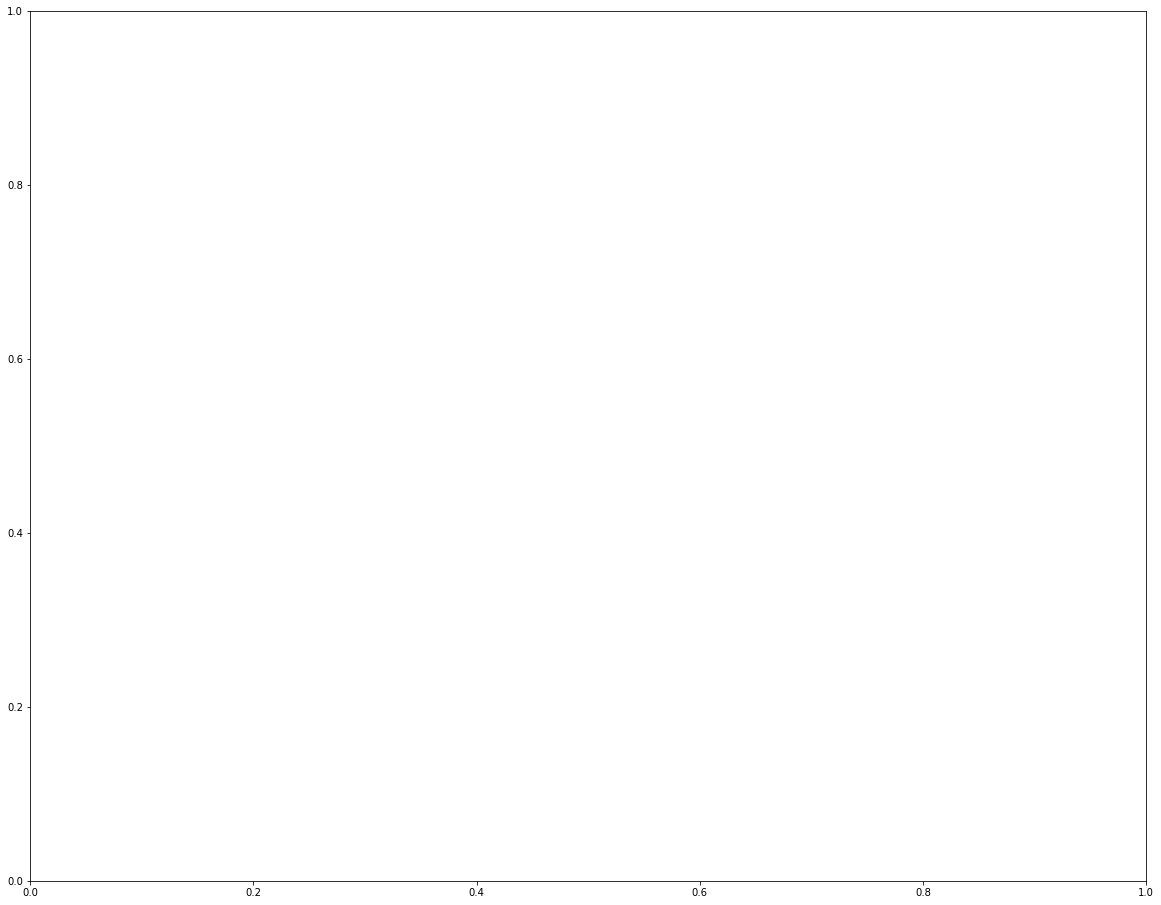

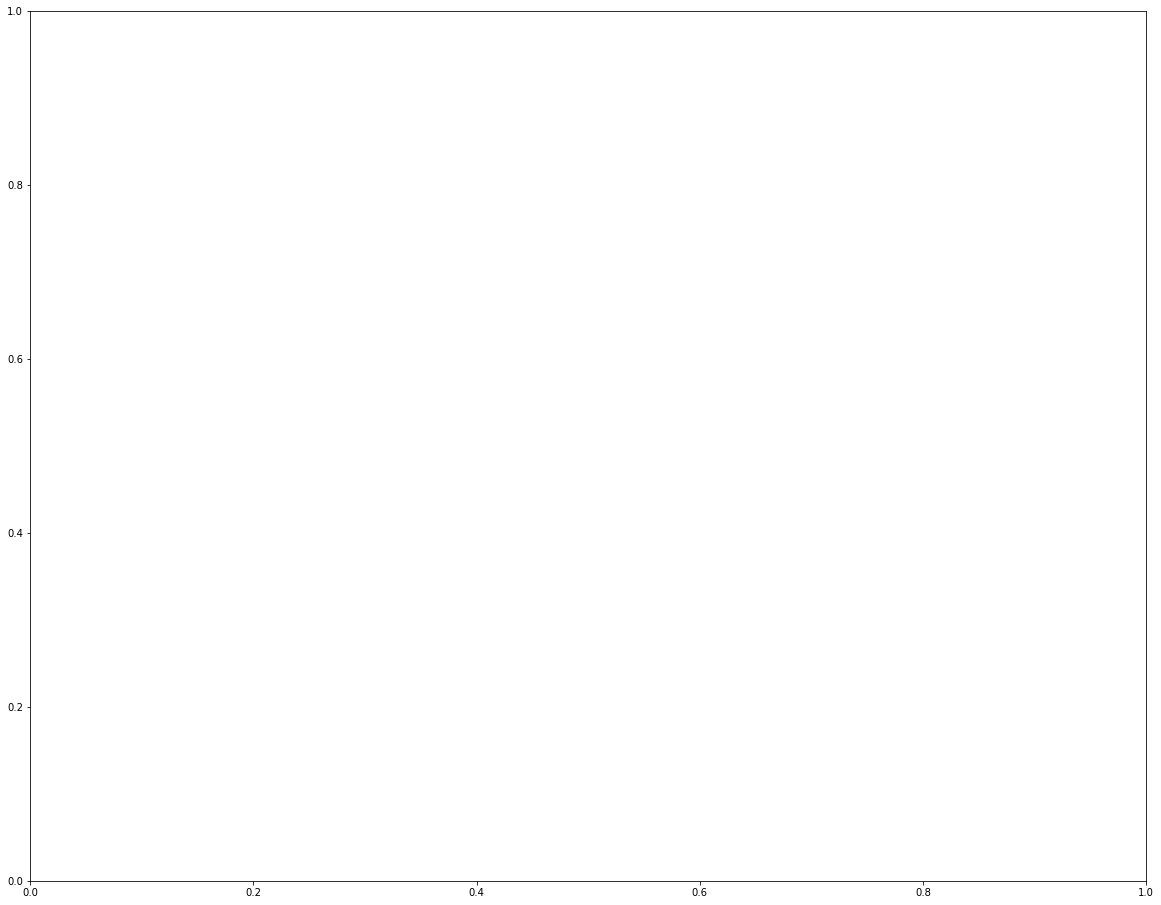

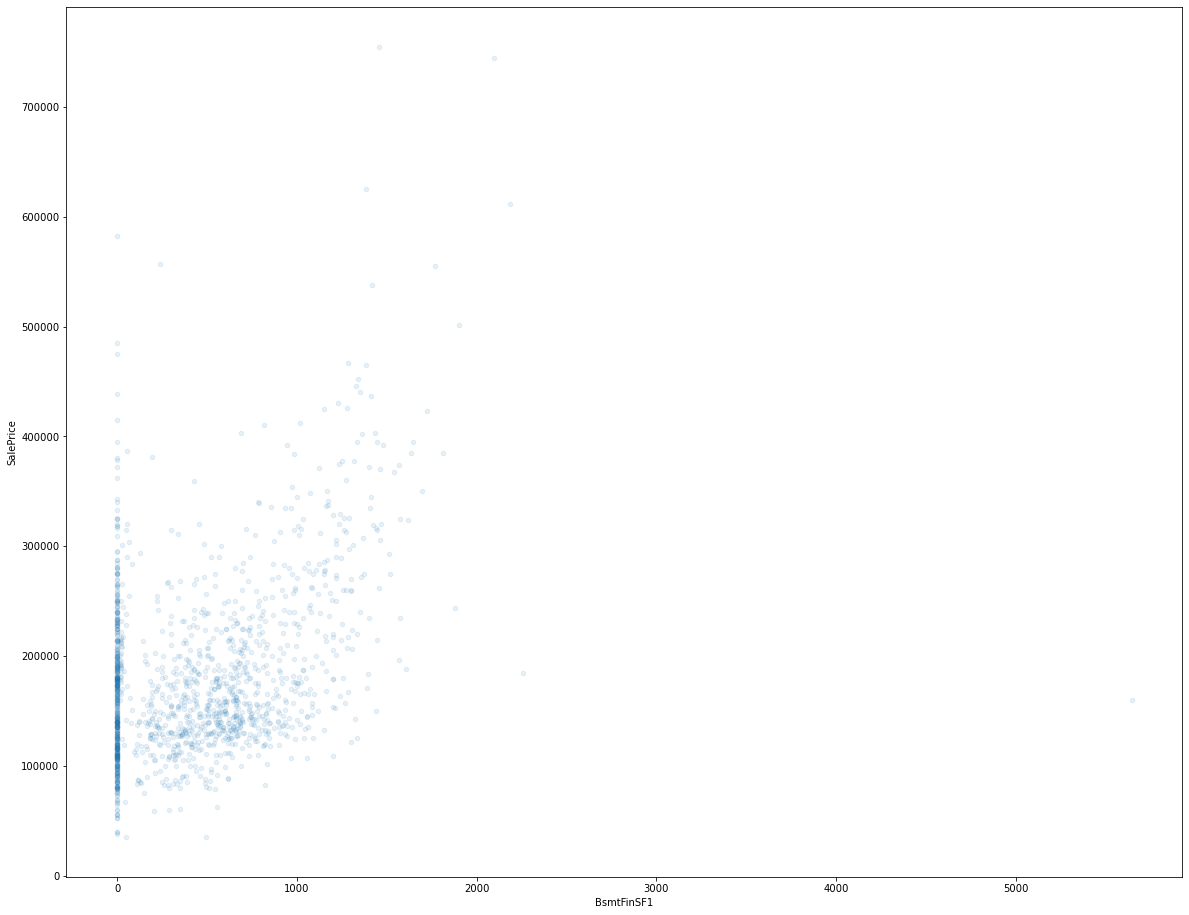

Unable to Plot BsmtFinType2


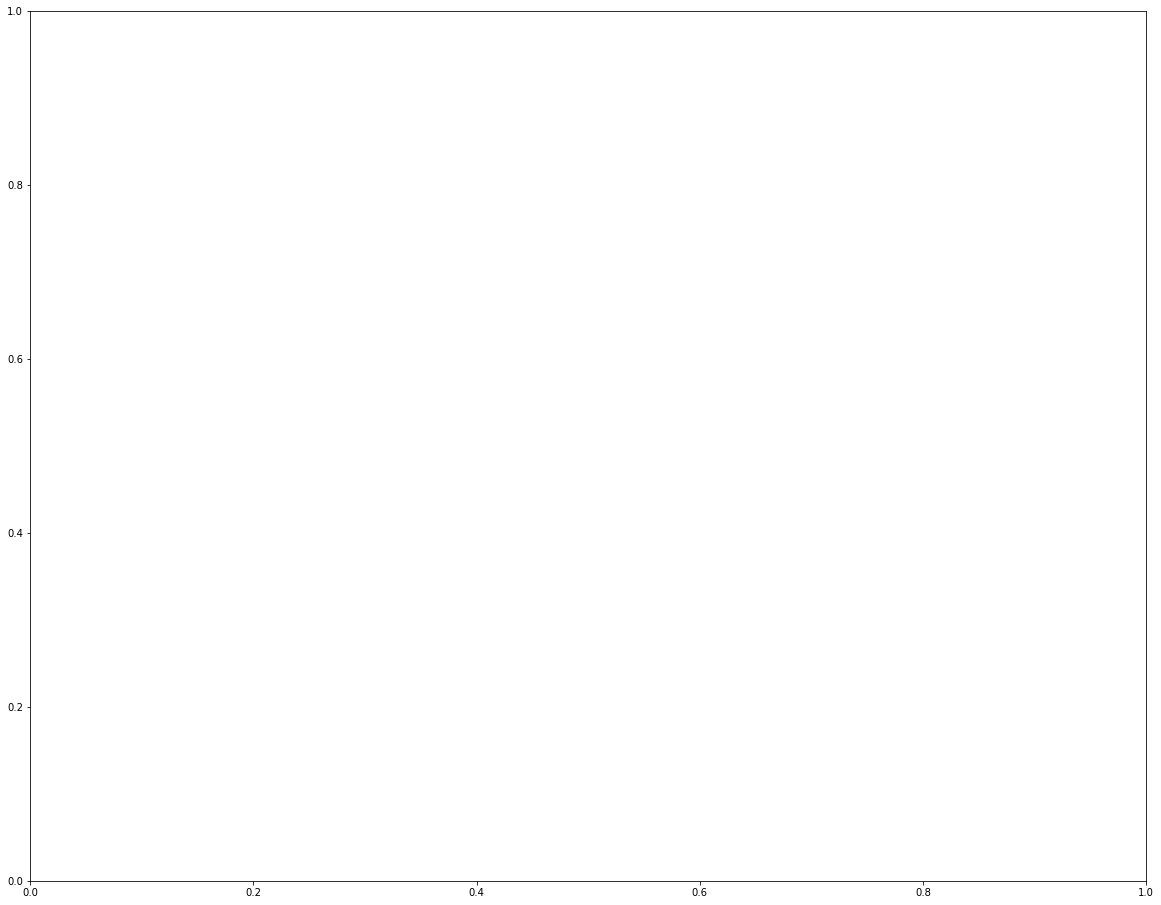

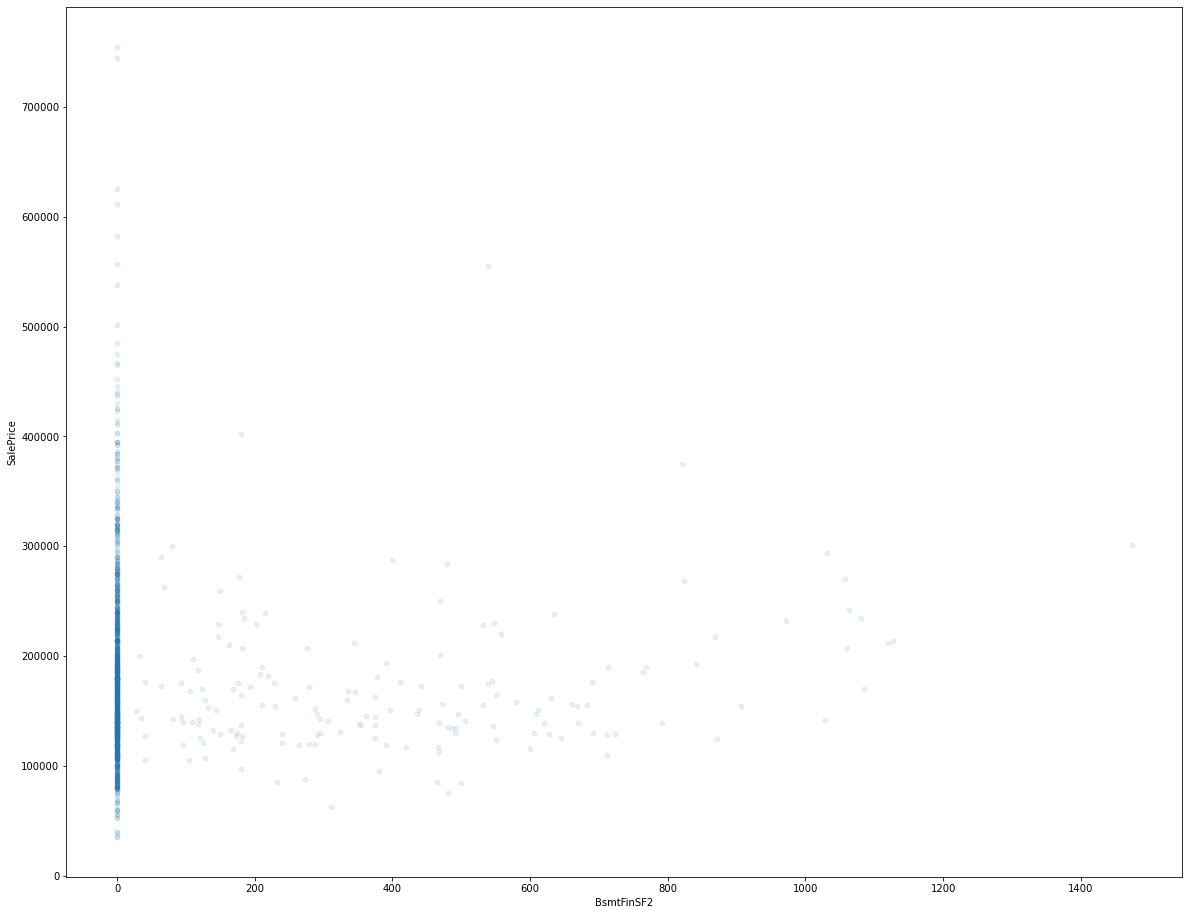

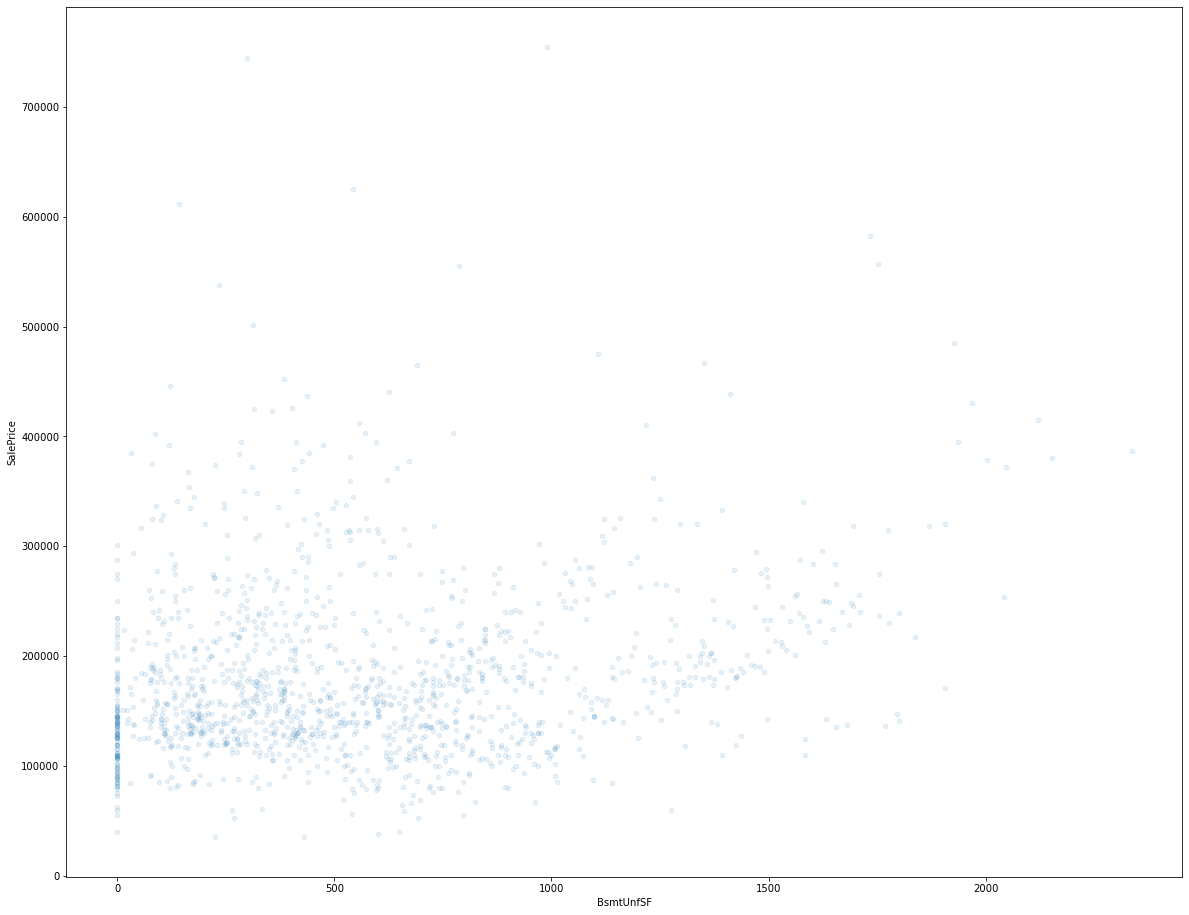

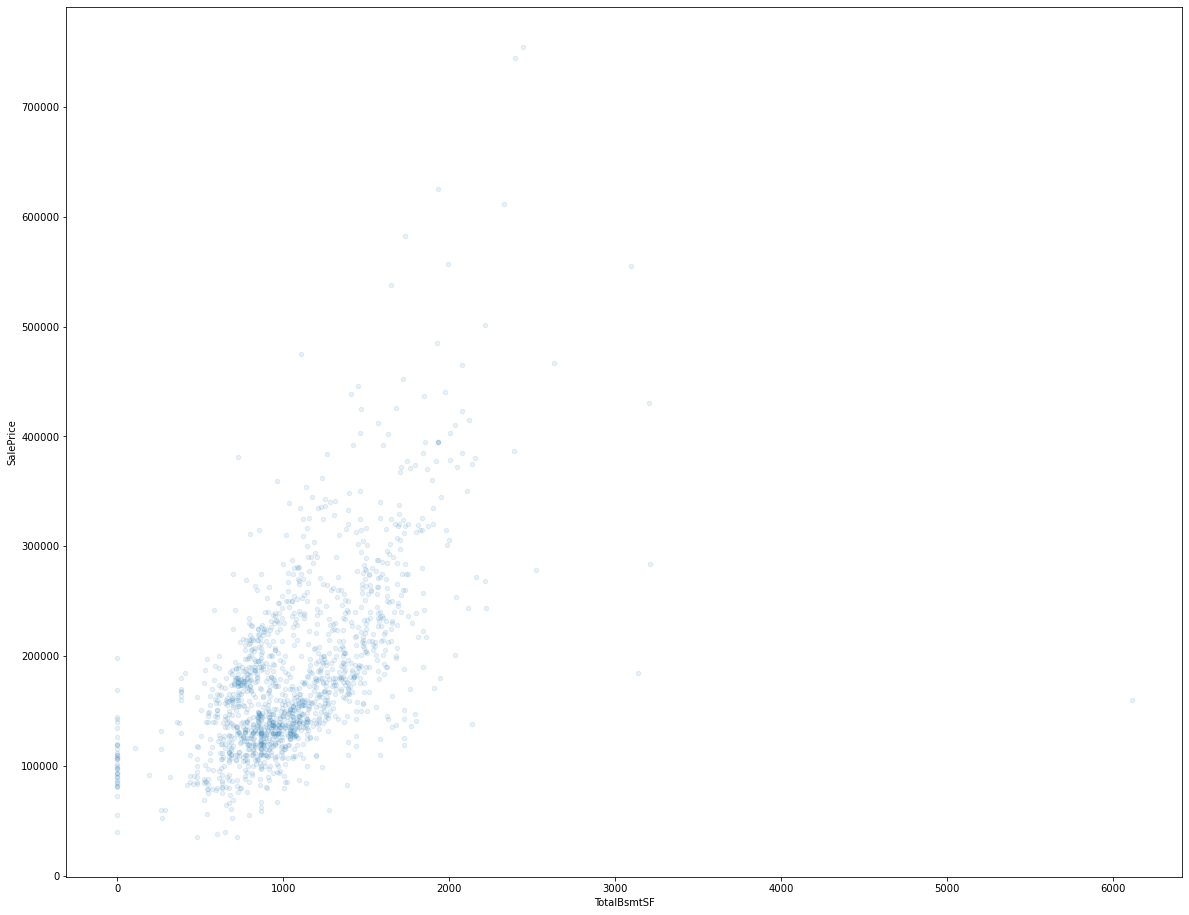

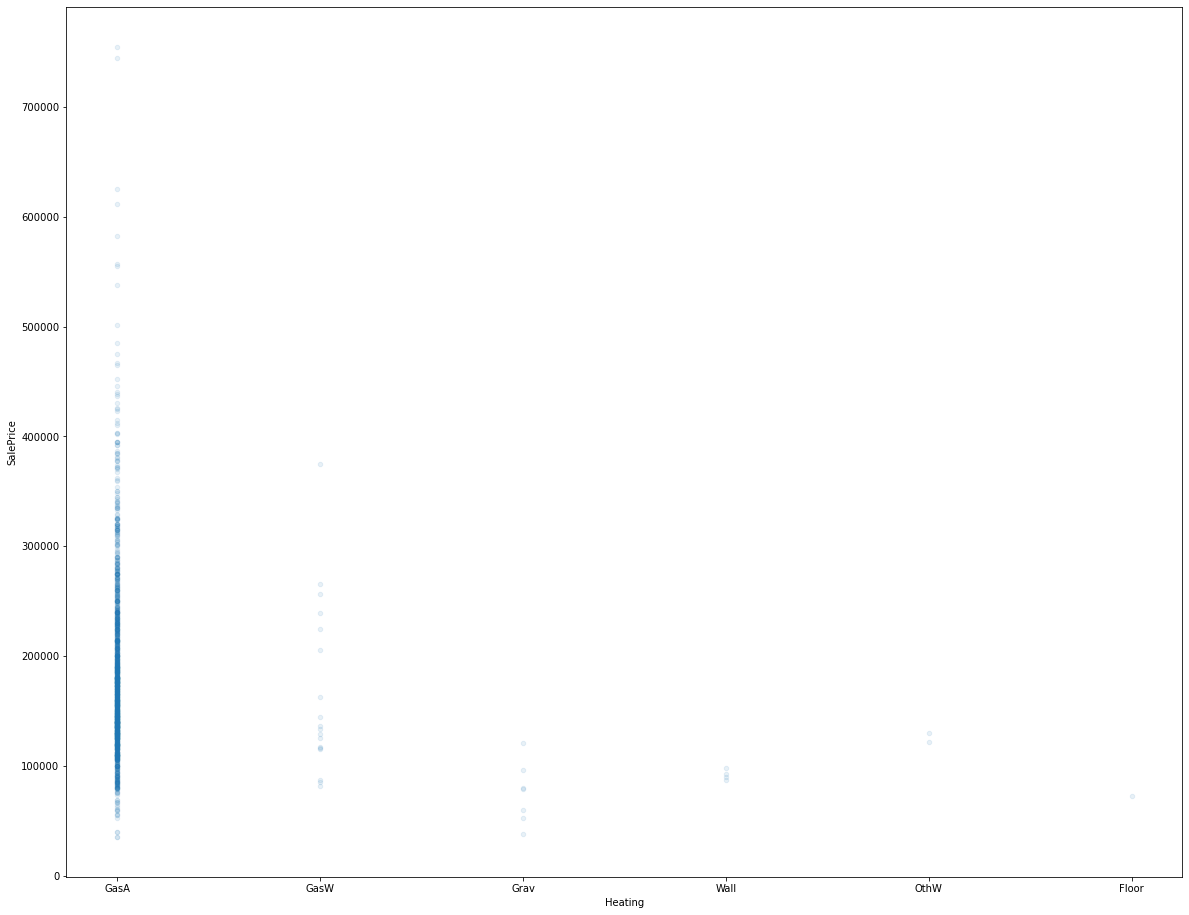

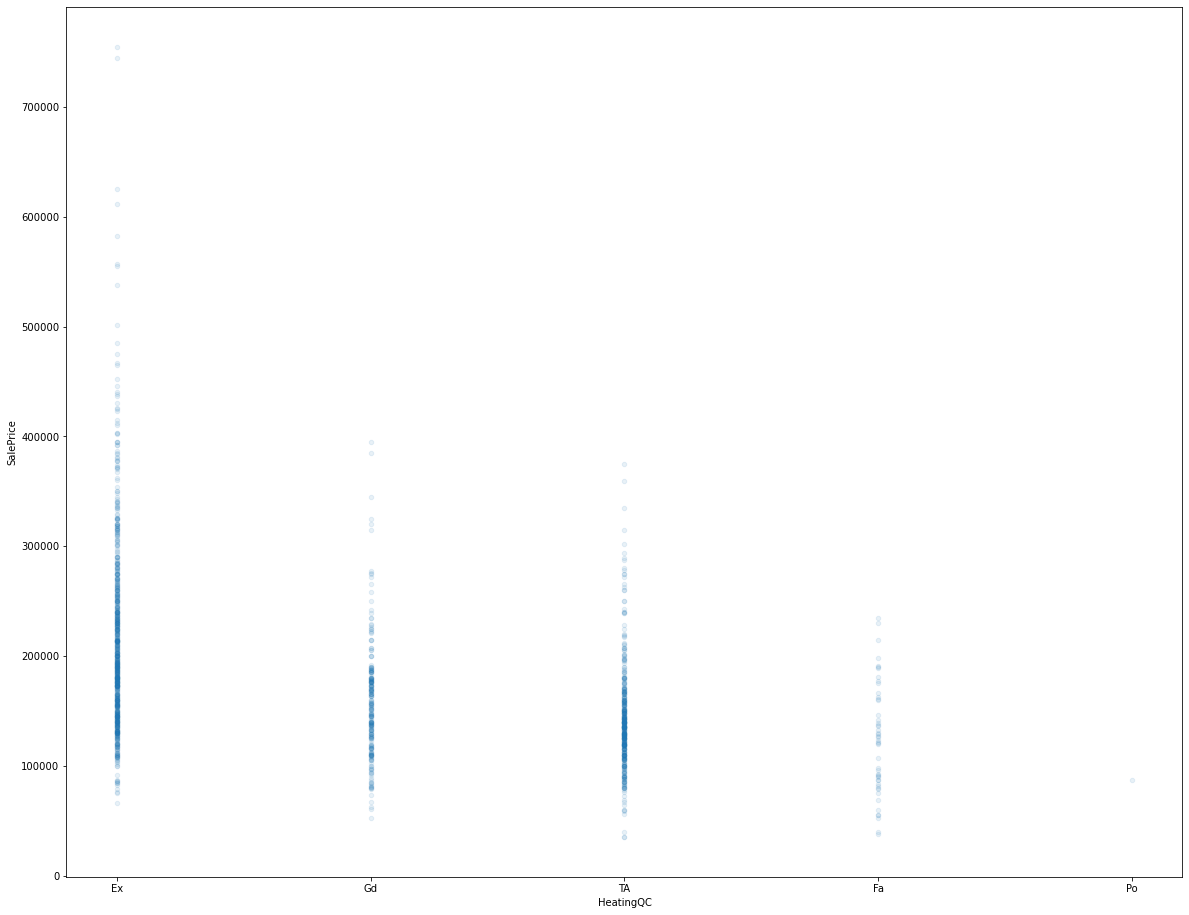

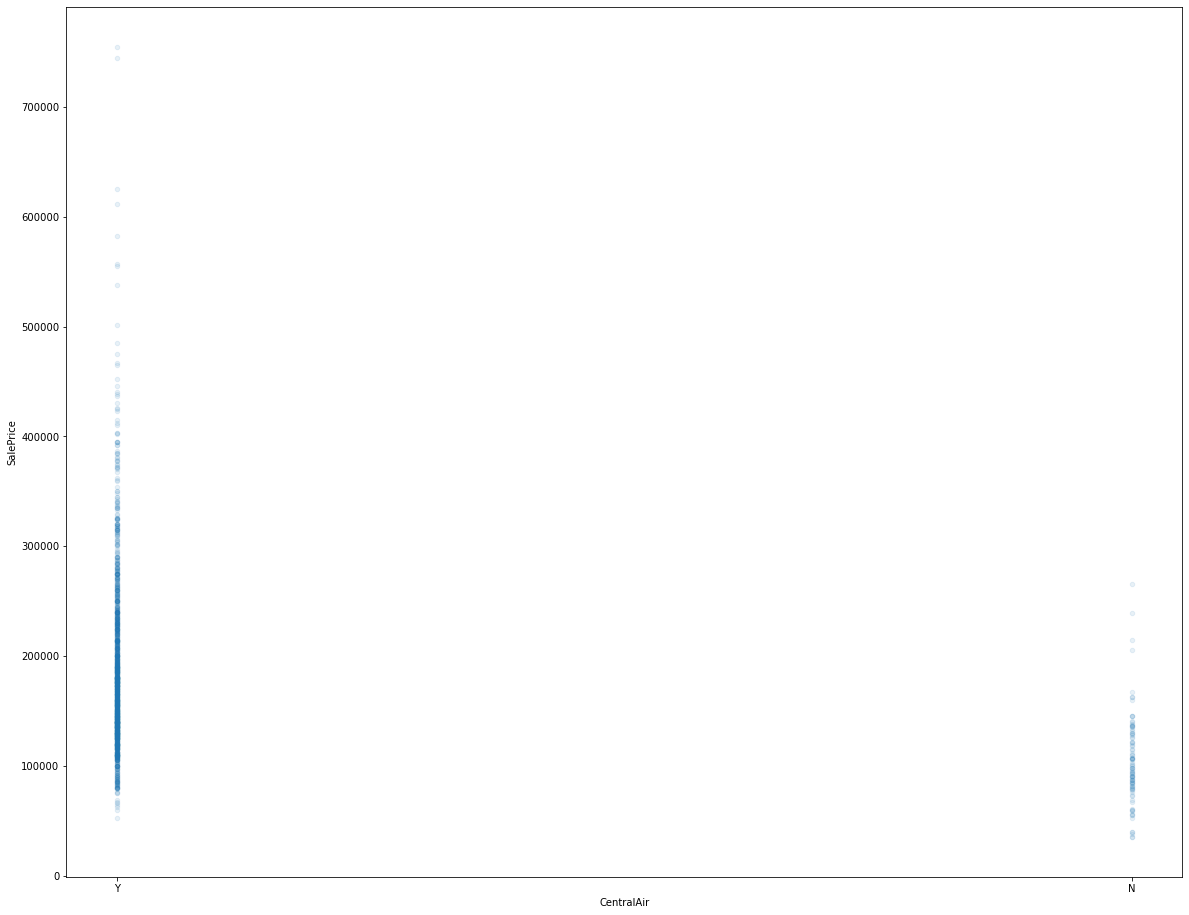

Unable to Plot Electrical


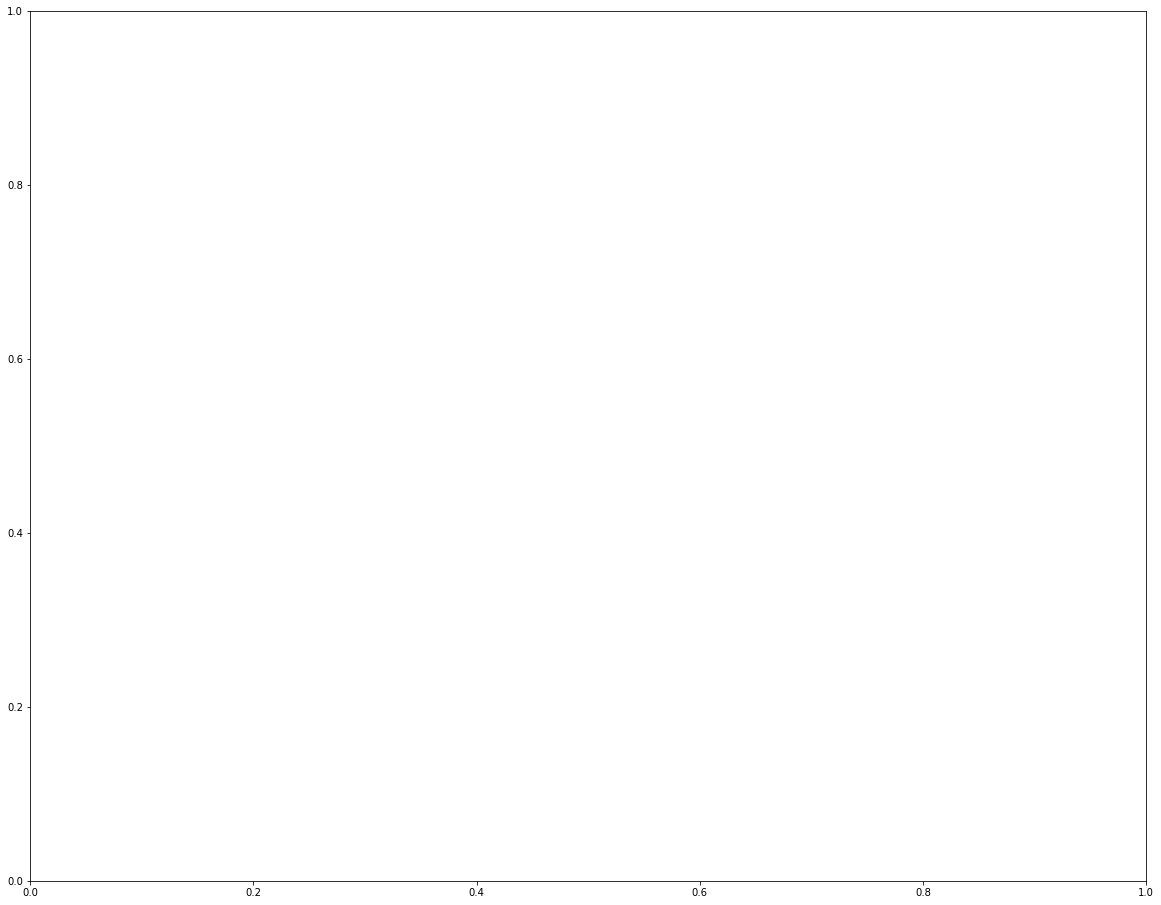

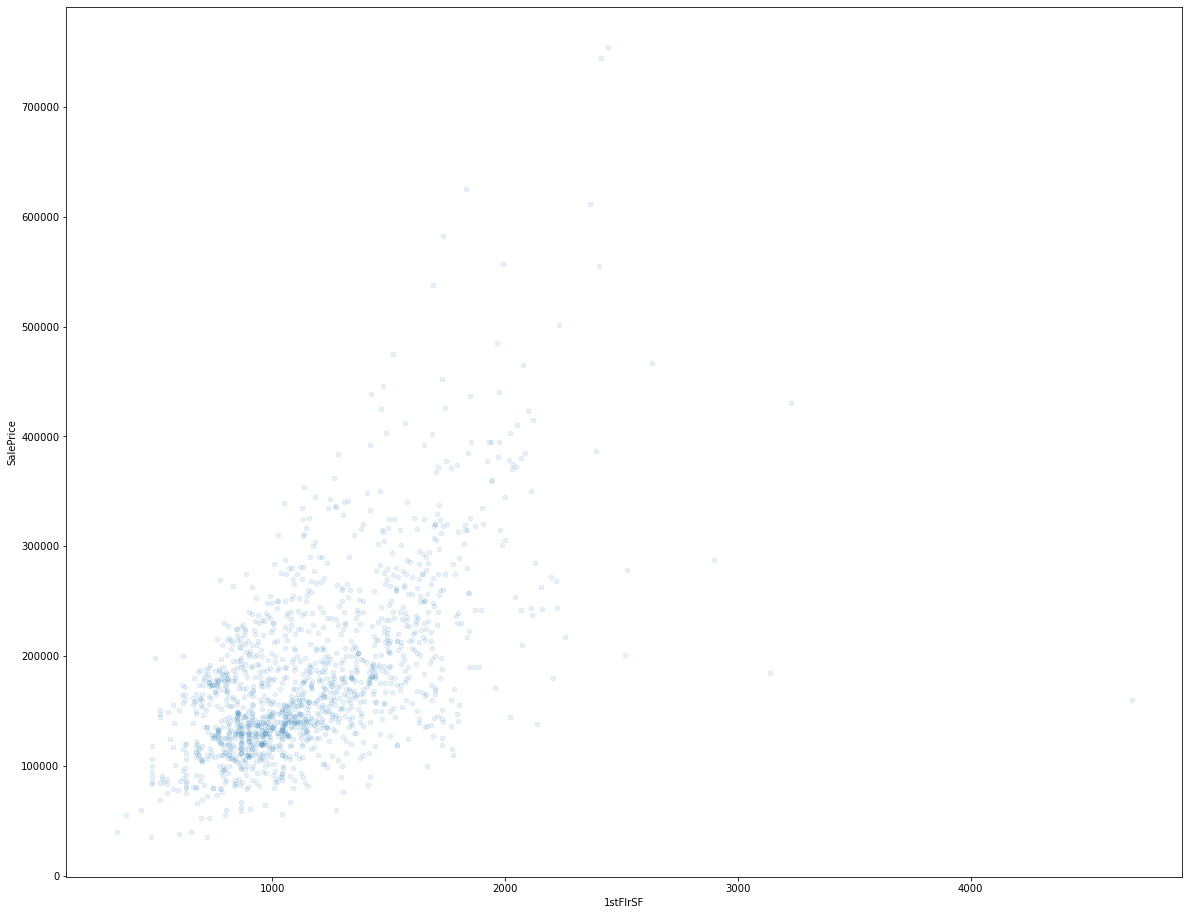

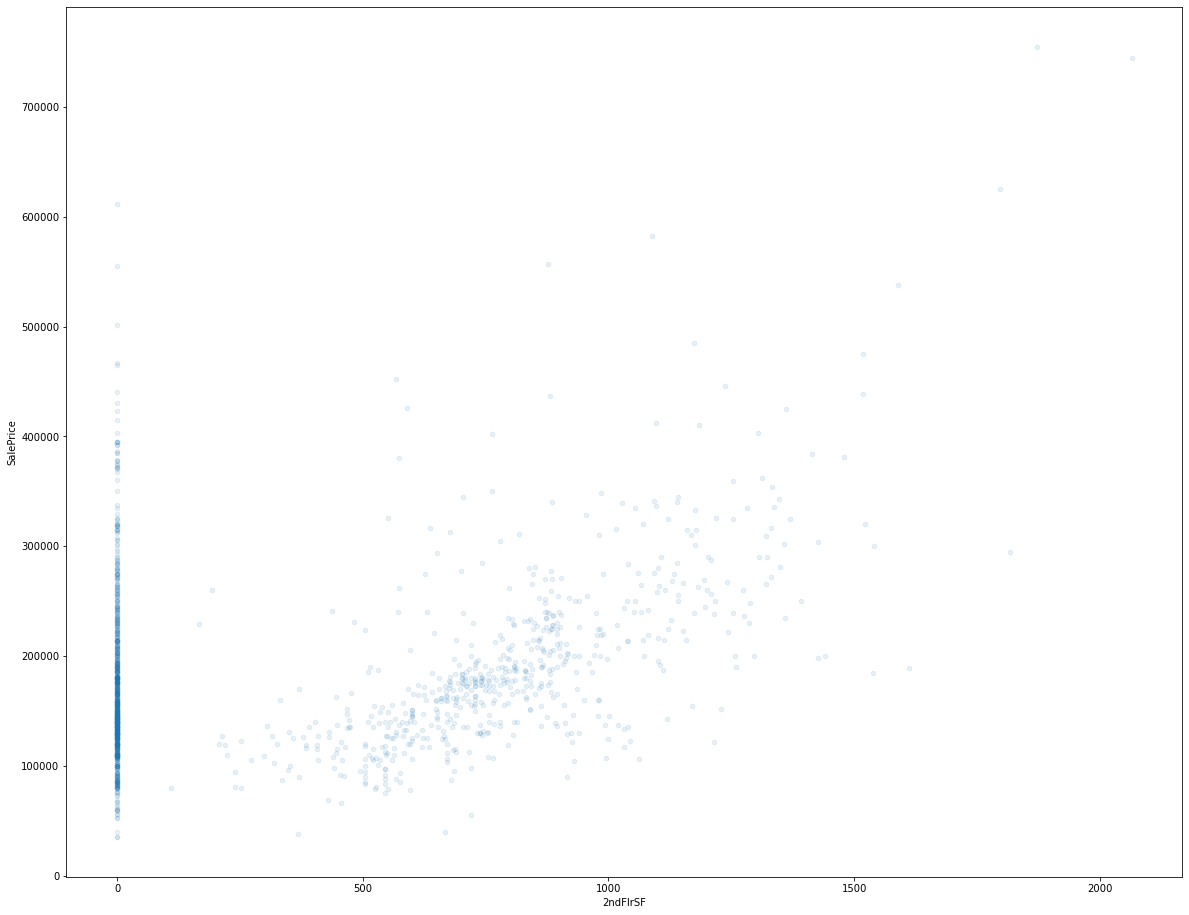

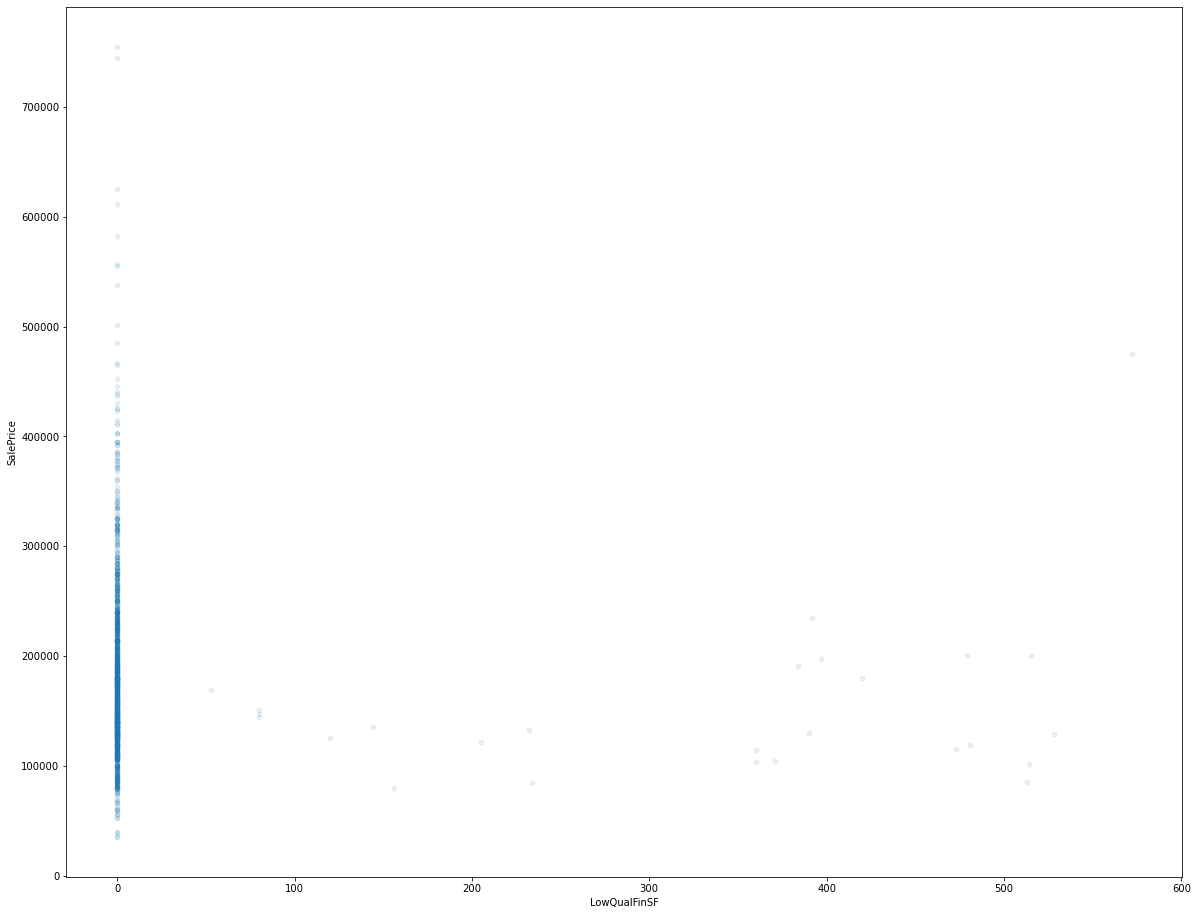

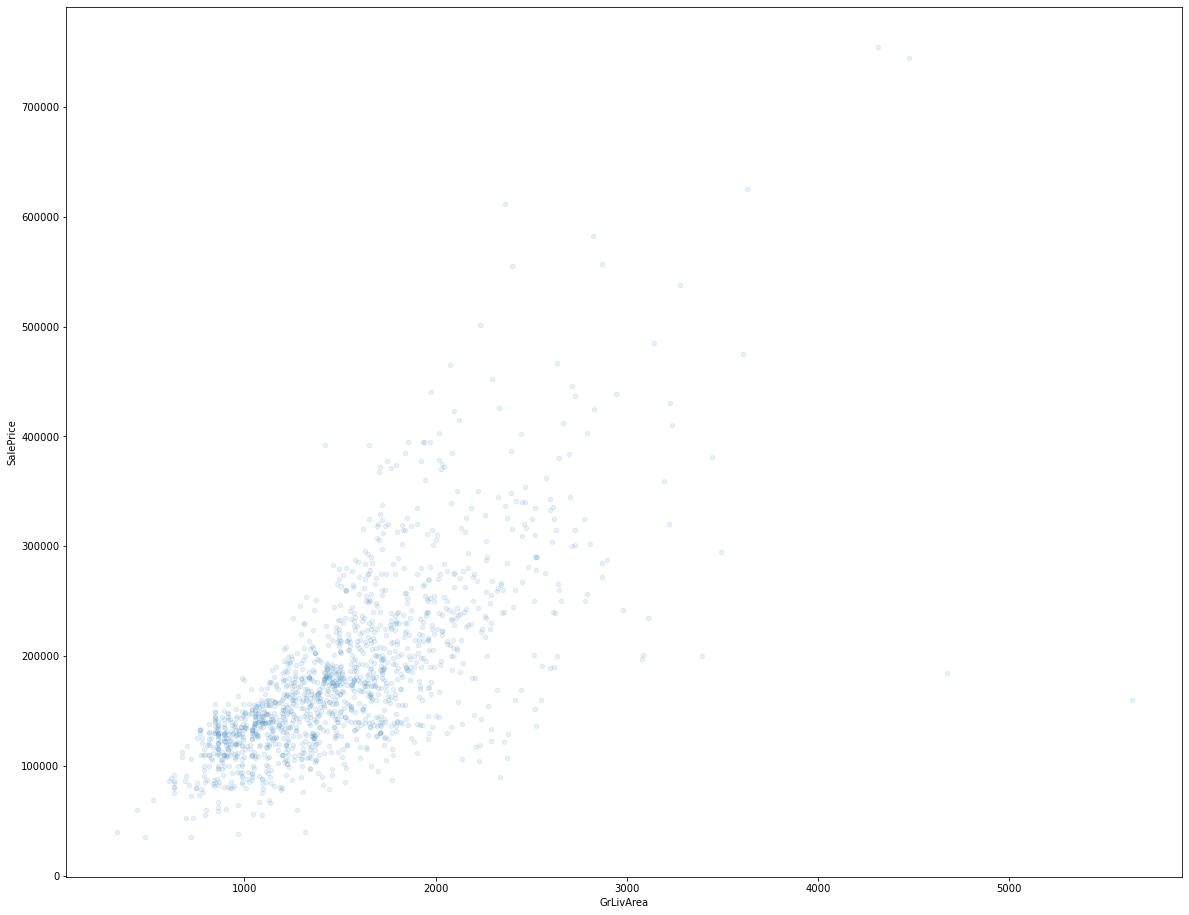

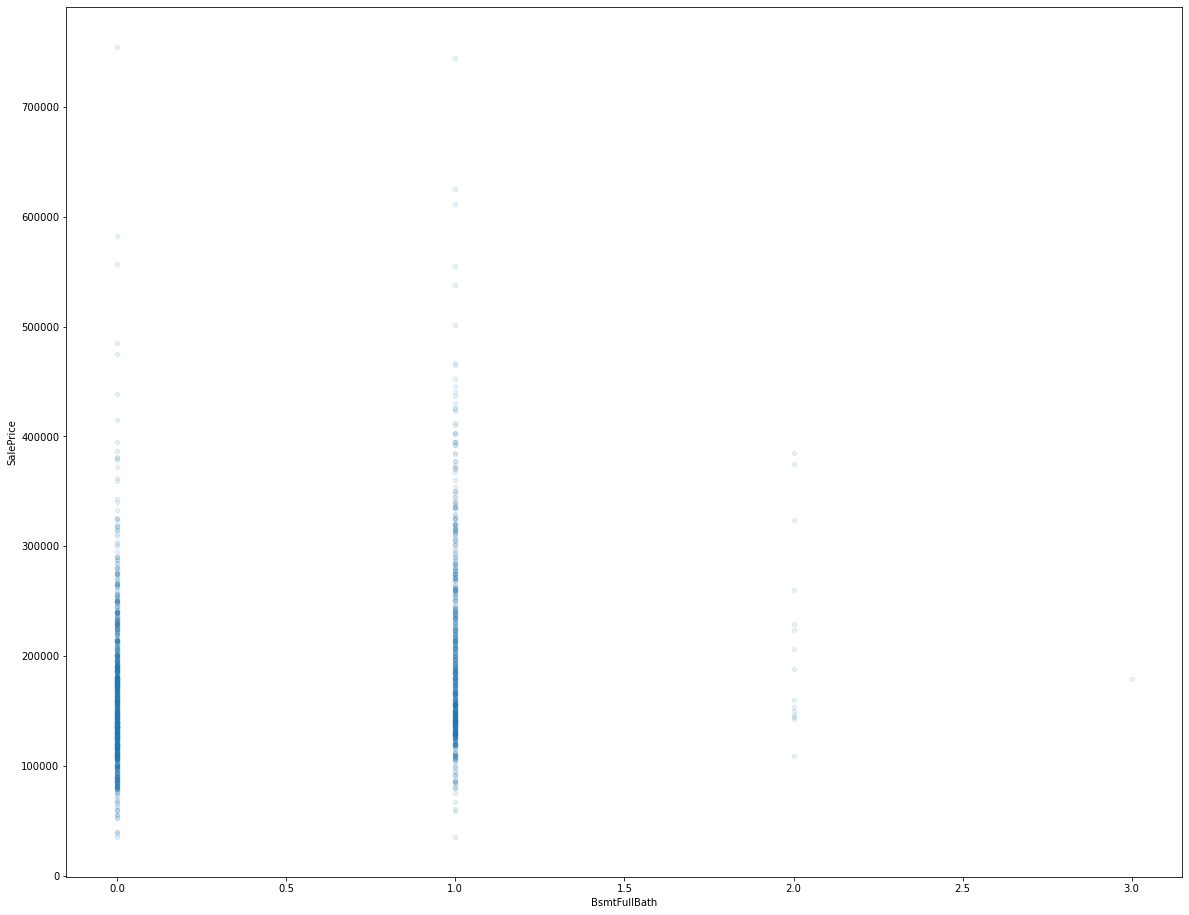

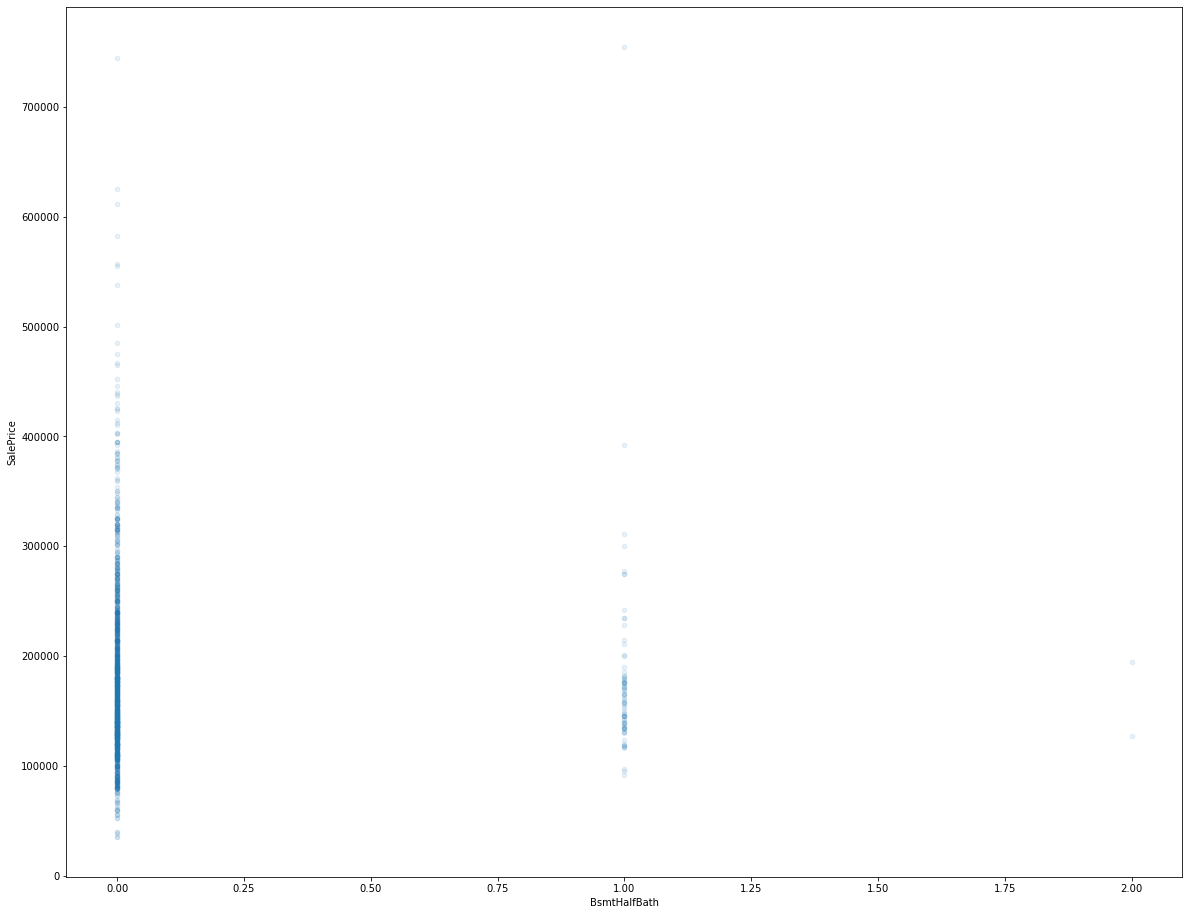

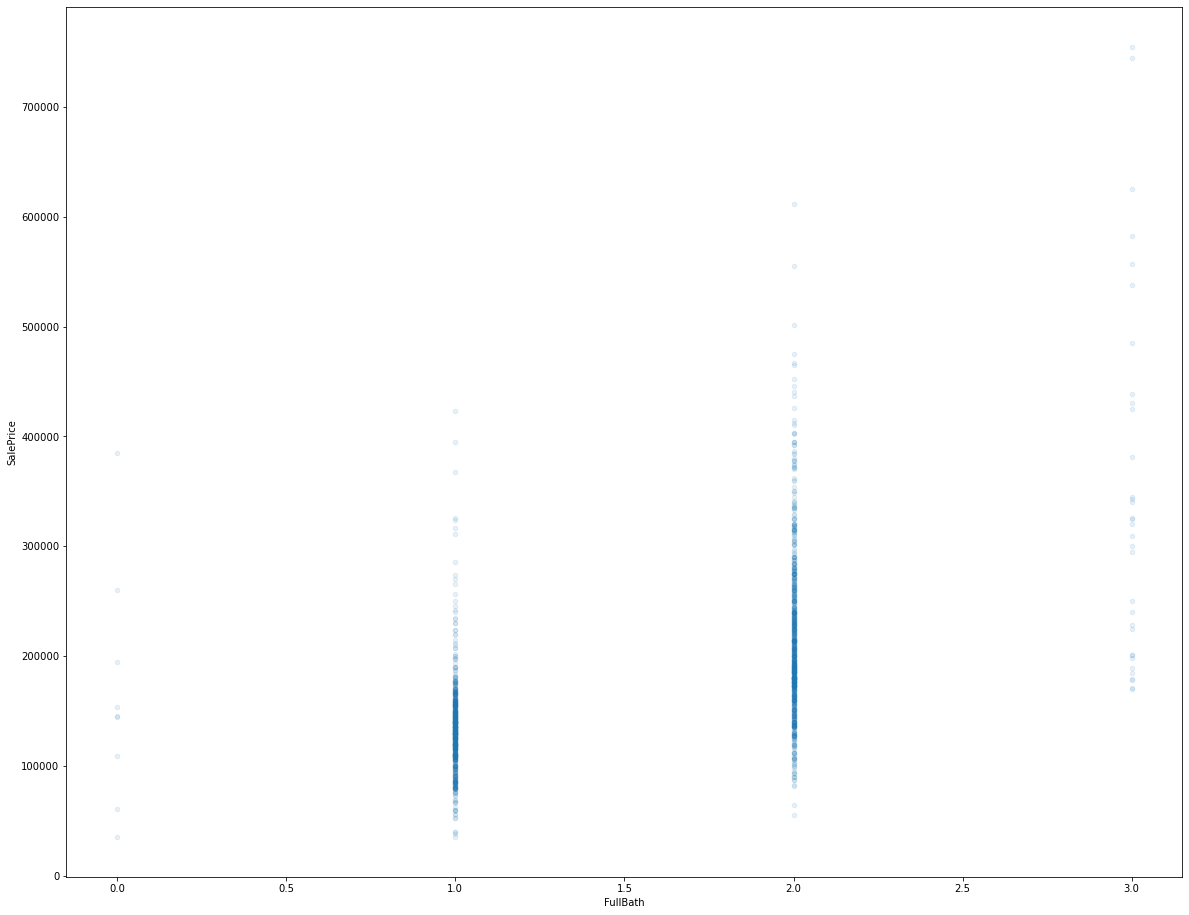

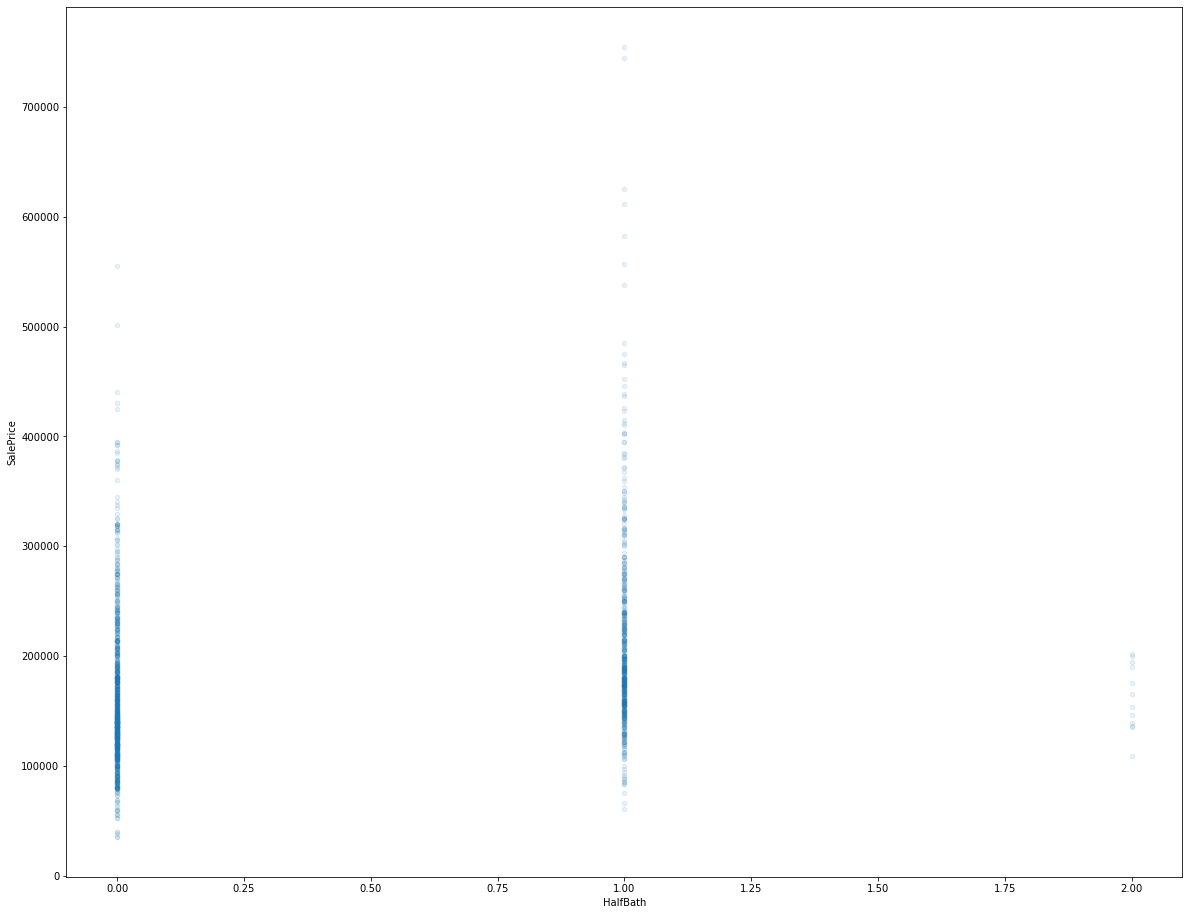

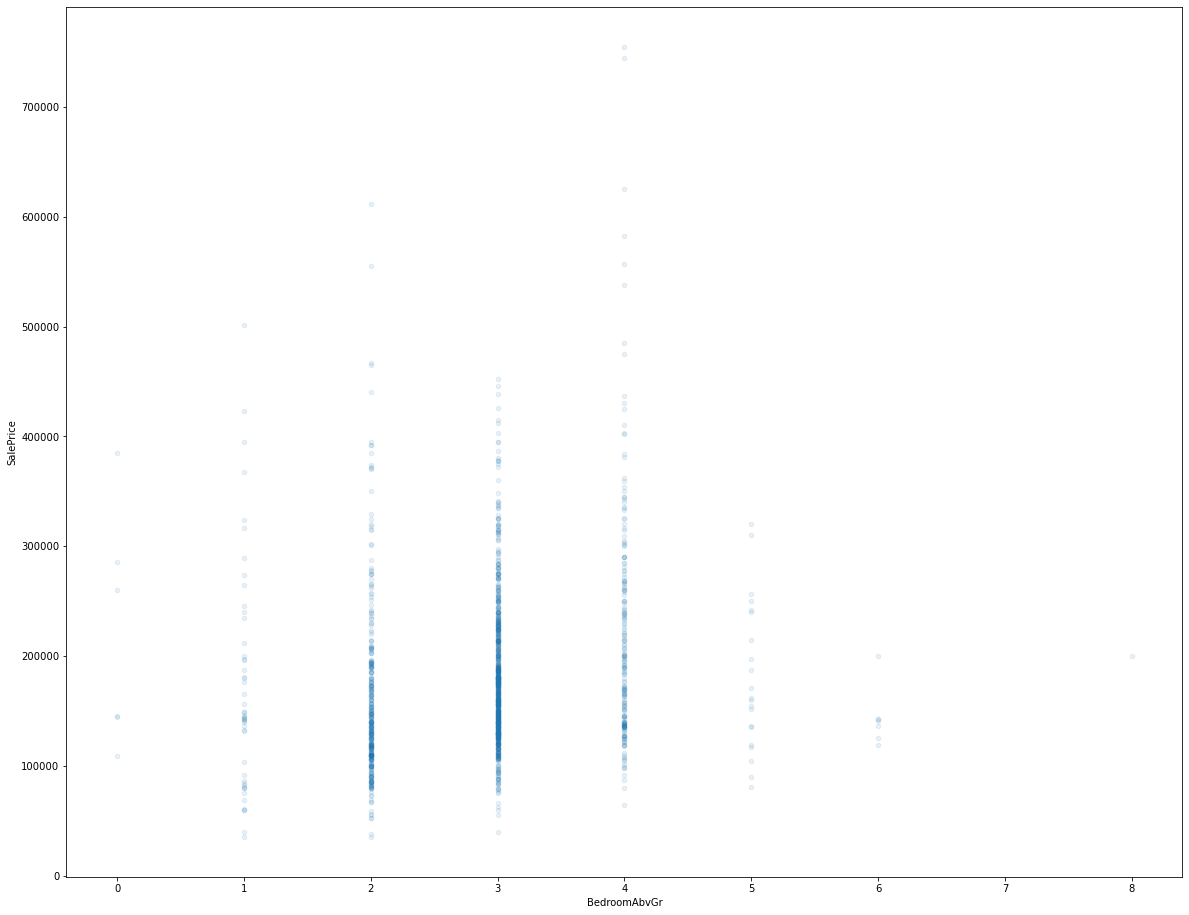

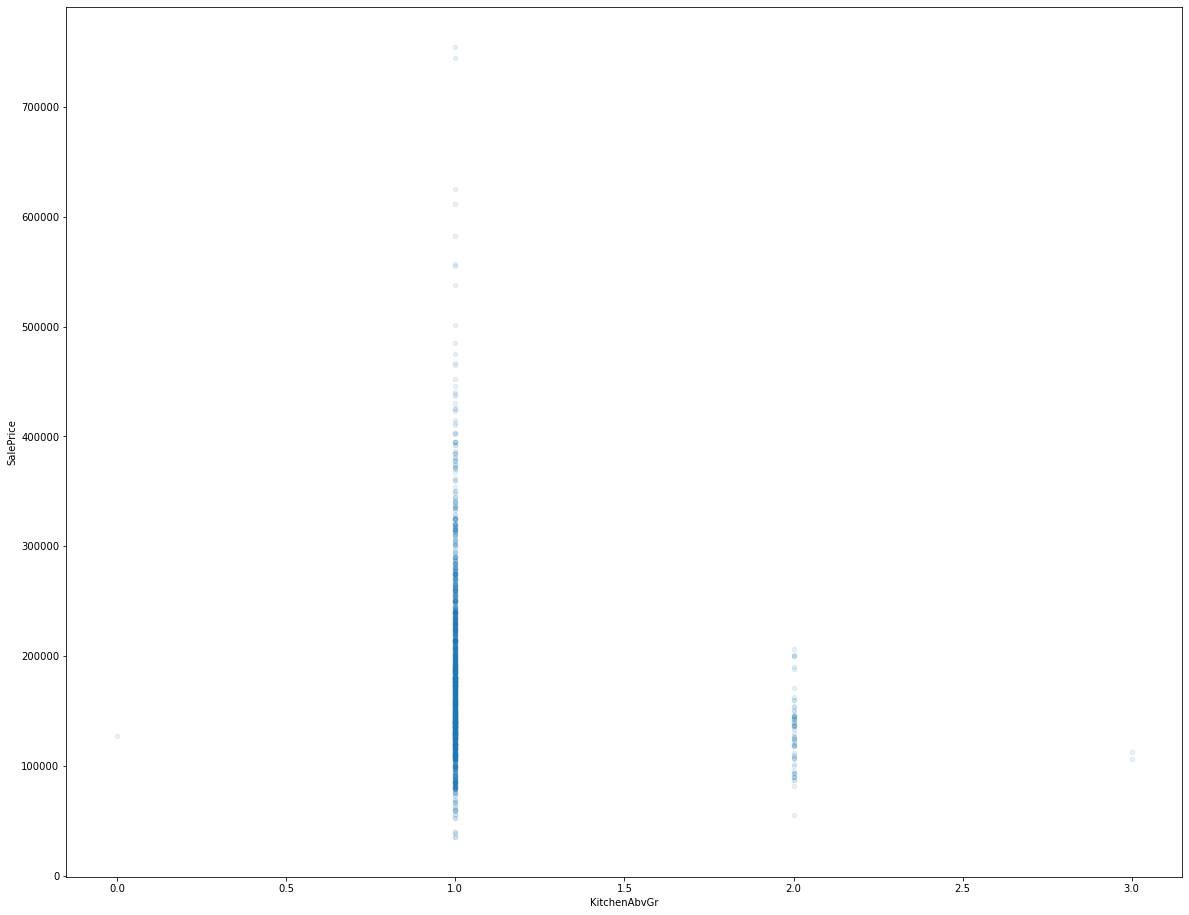

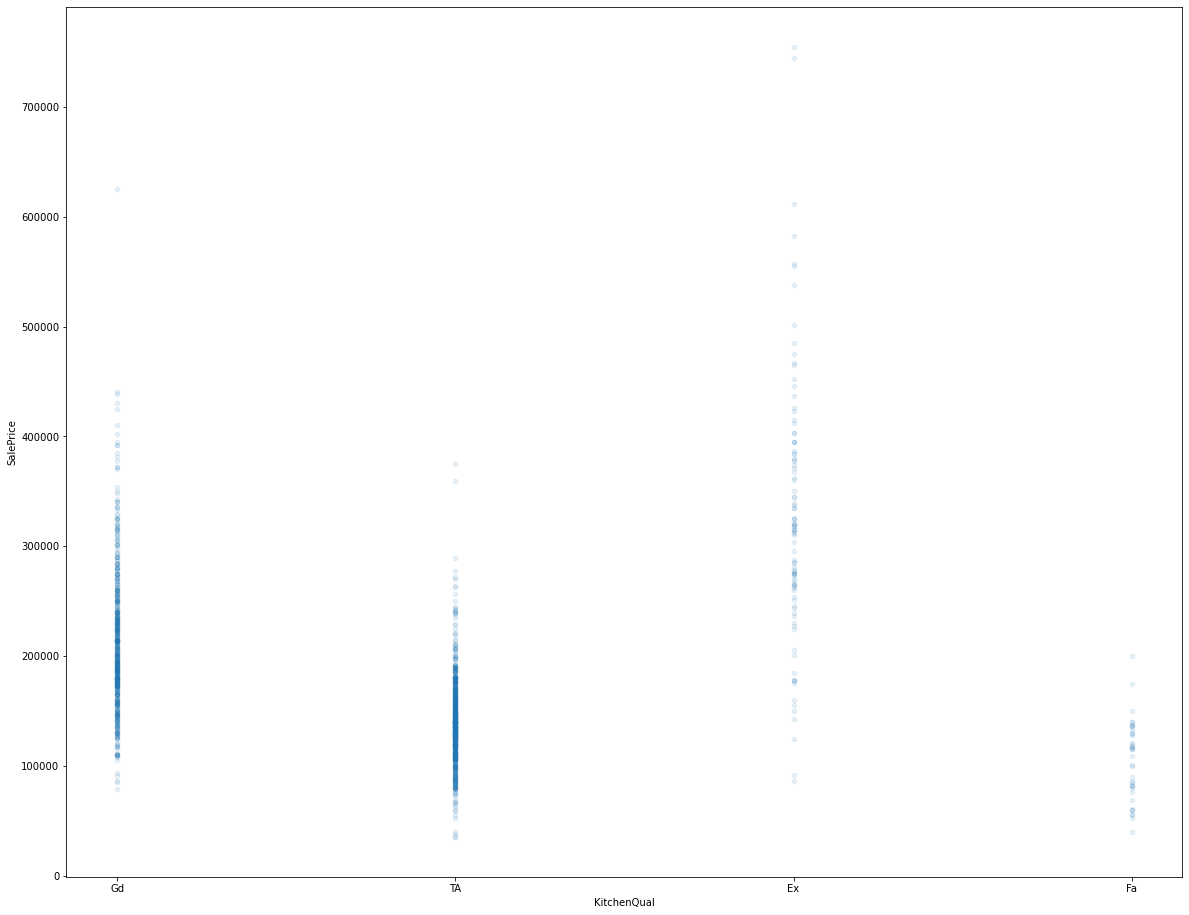

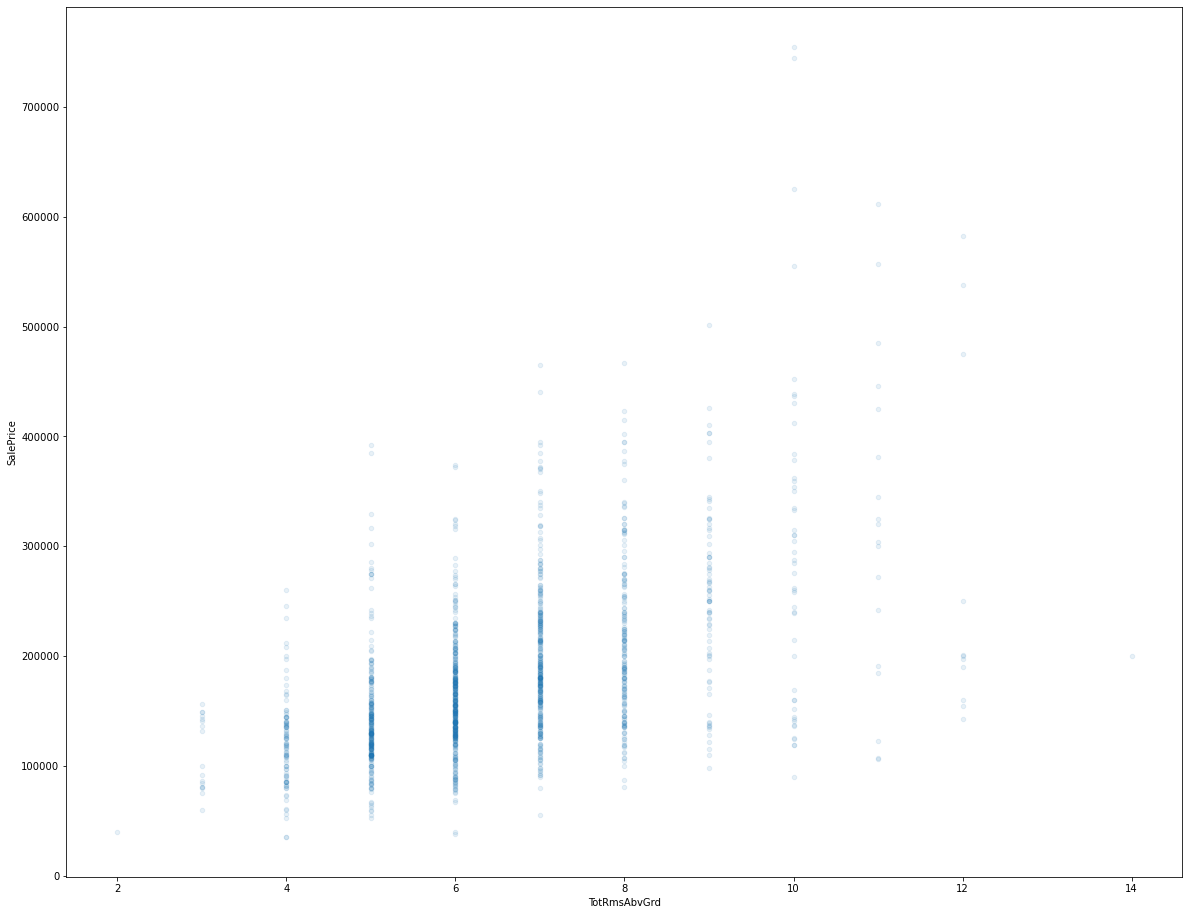

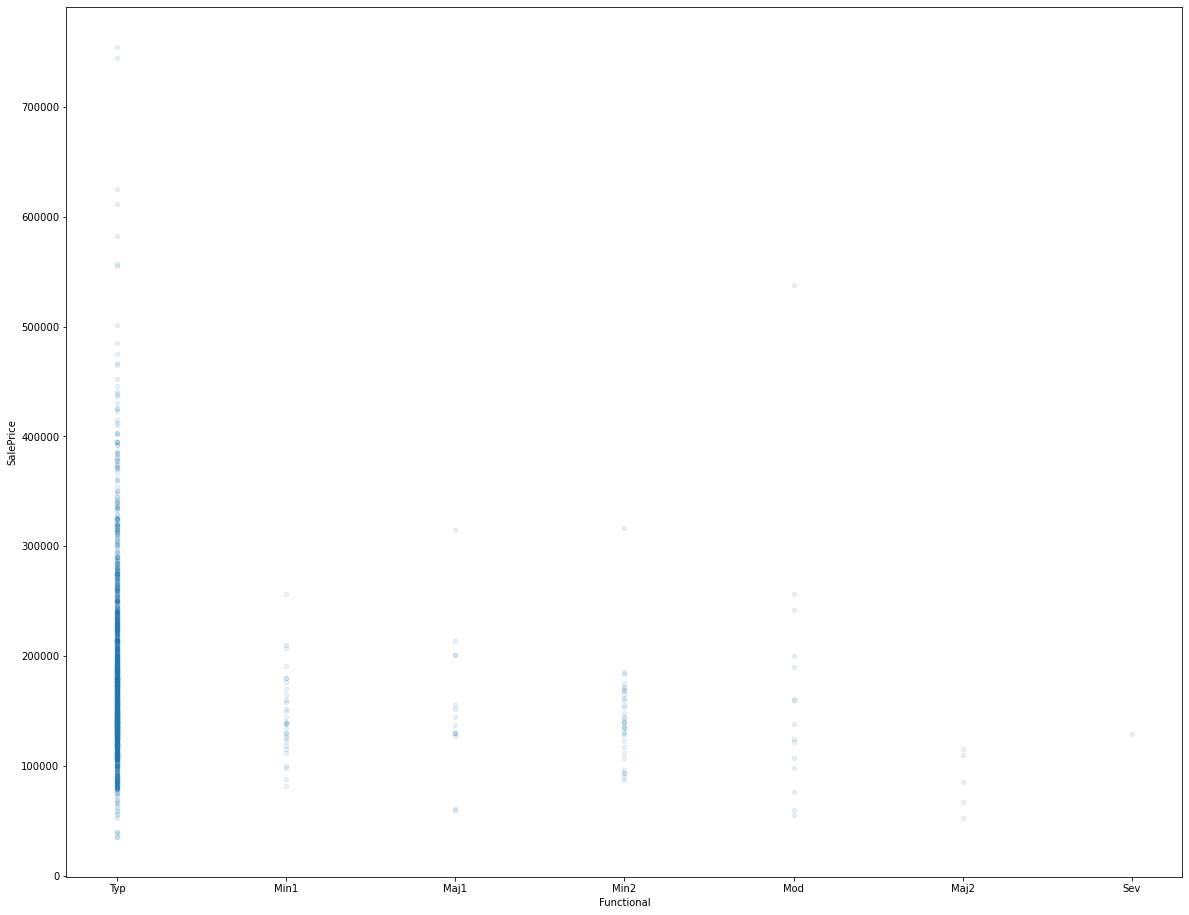

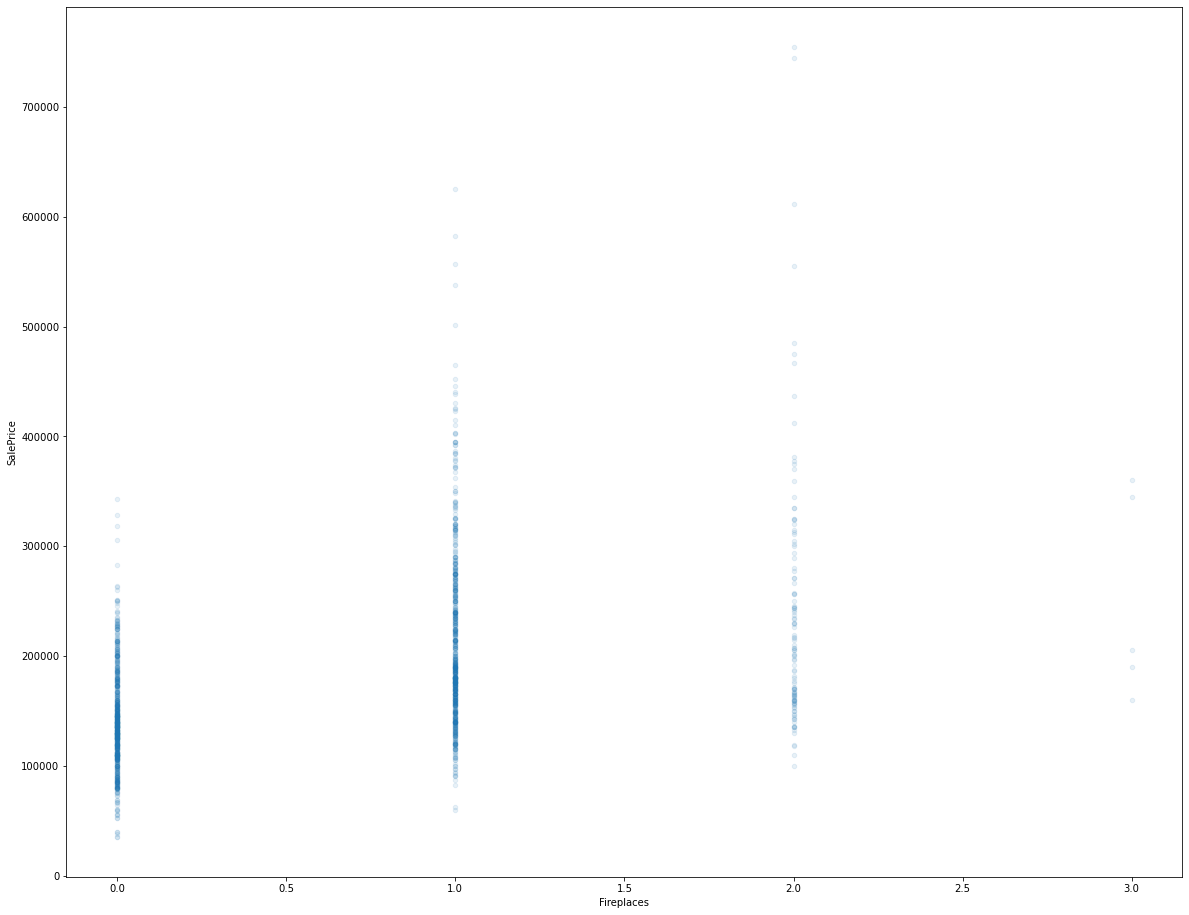

Unable to Plot FireplaceQu
Unable to Plot GarageType


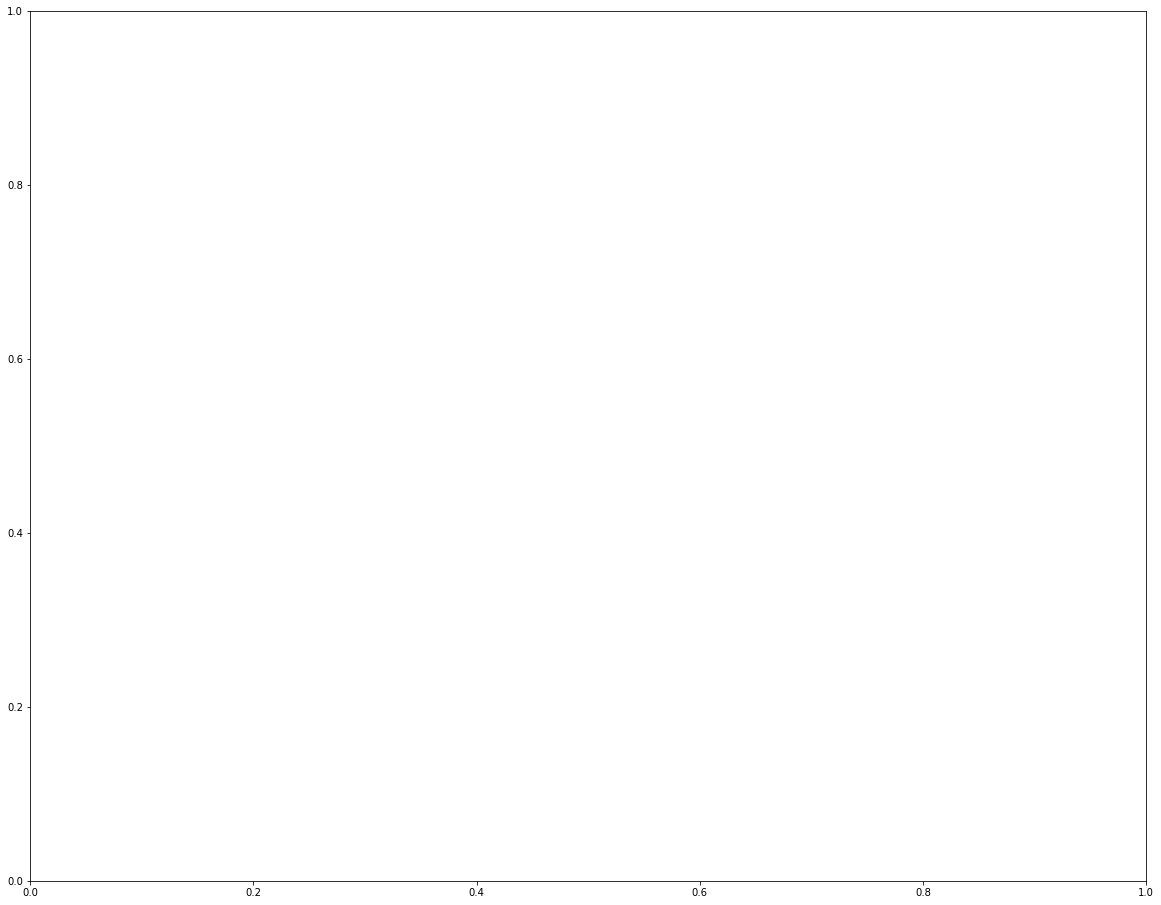

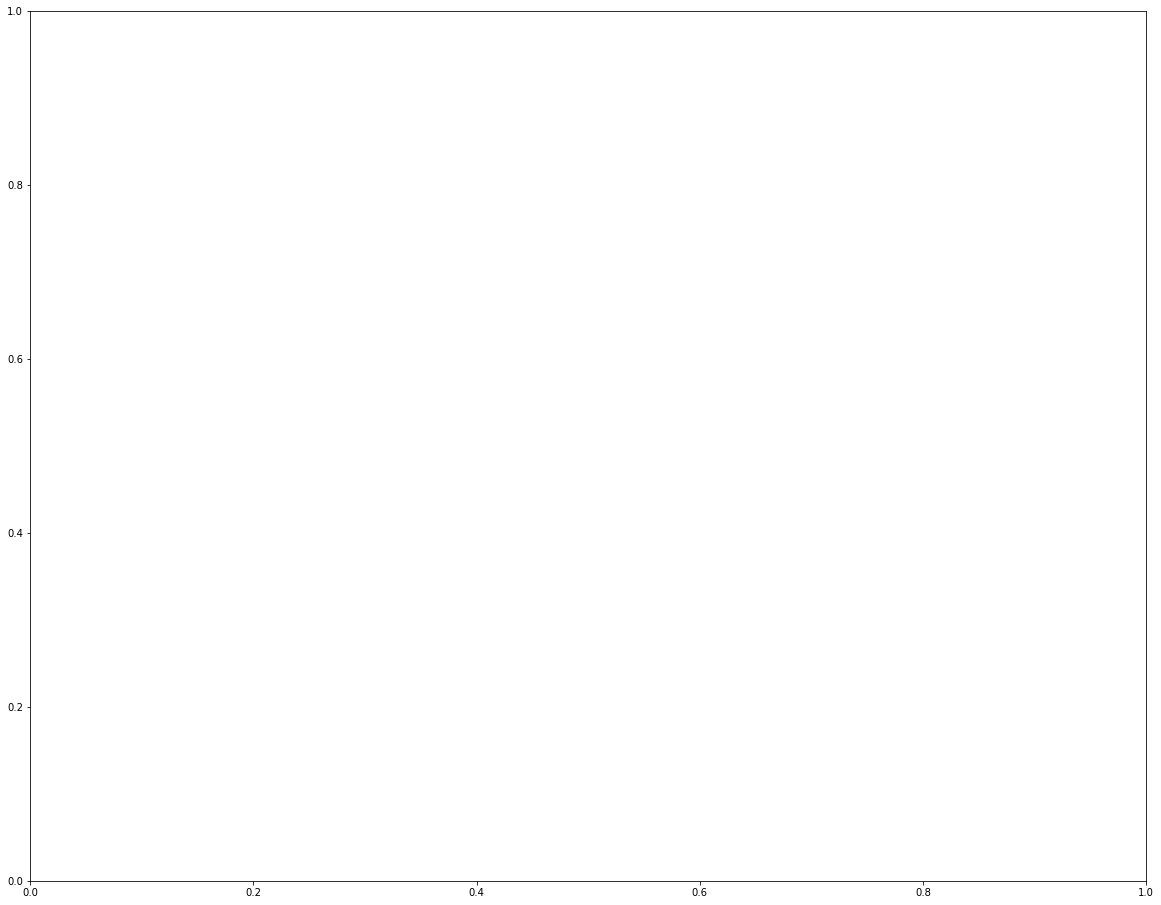

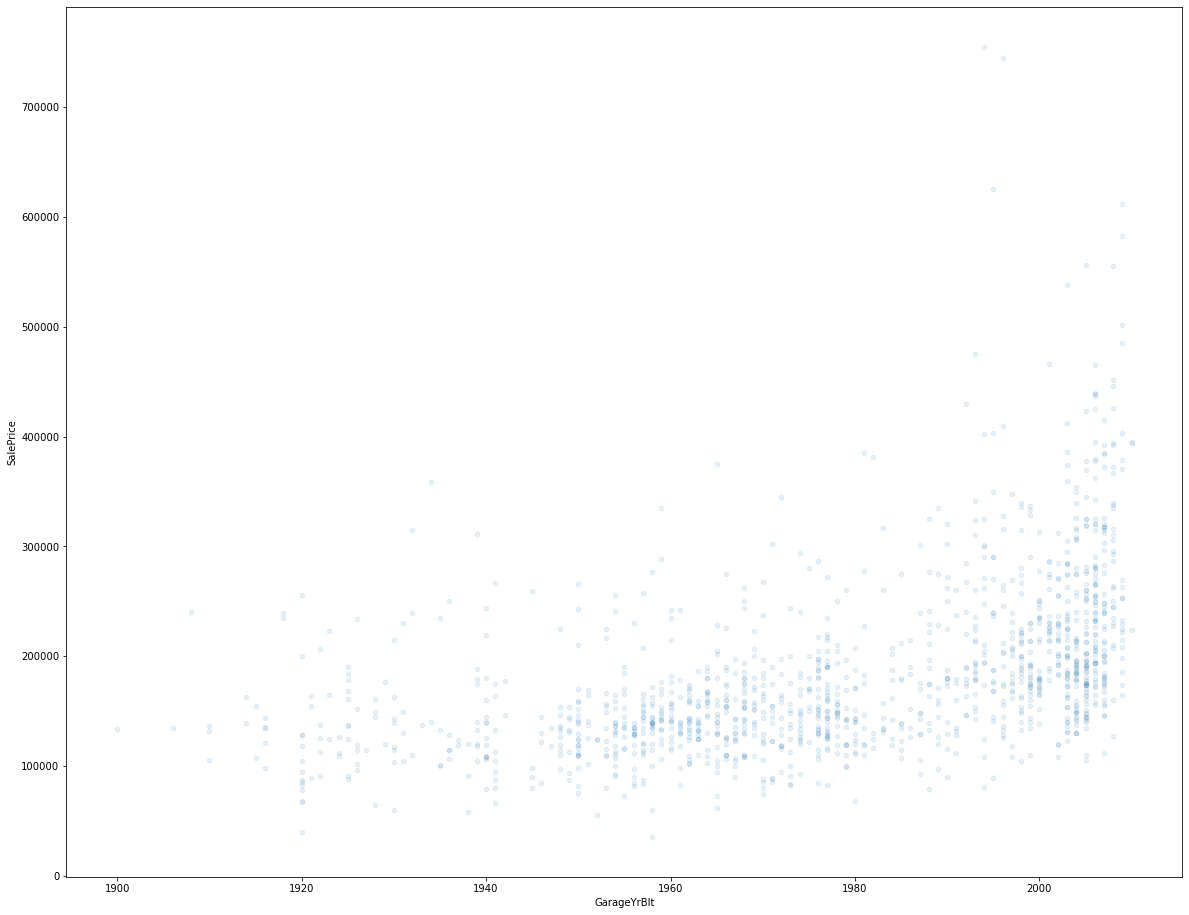

Unable to Plot GarageFinish


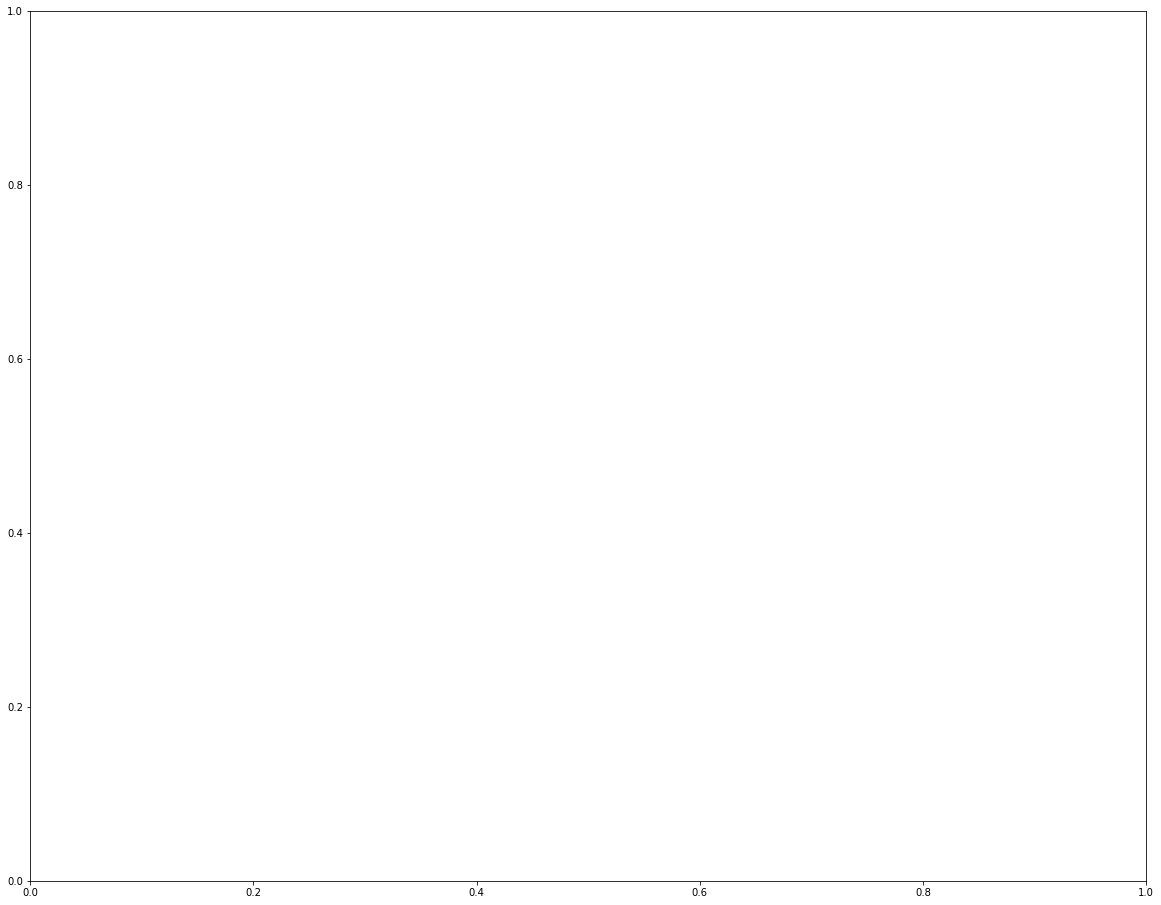

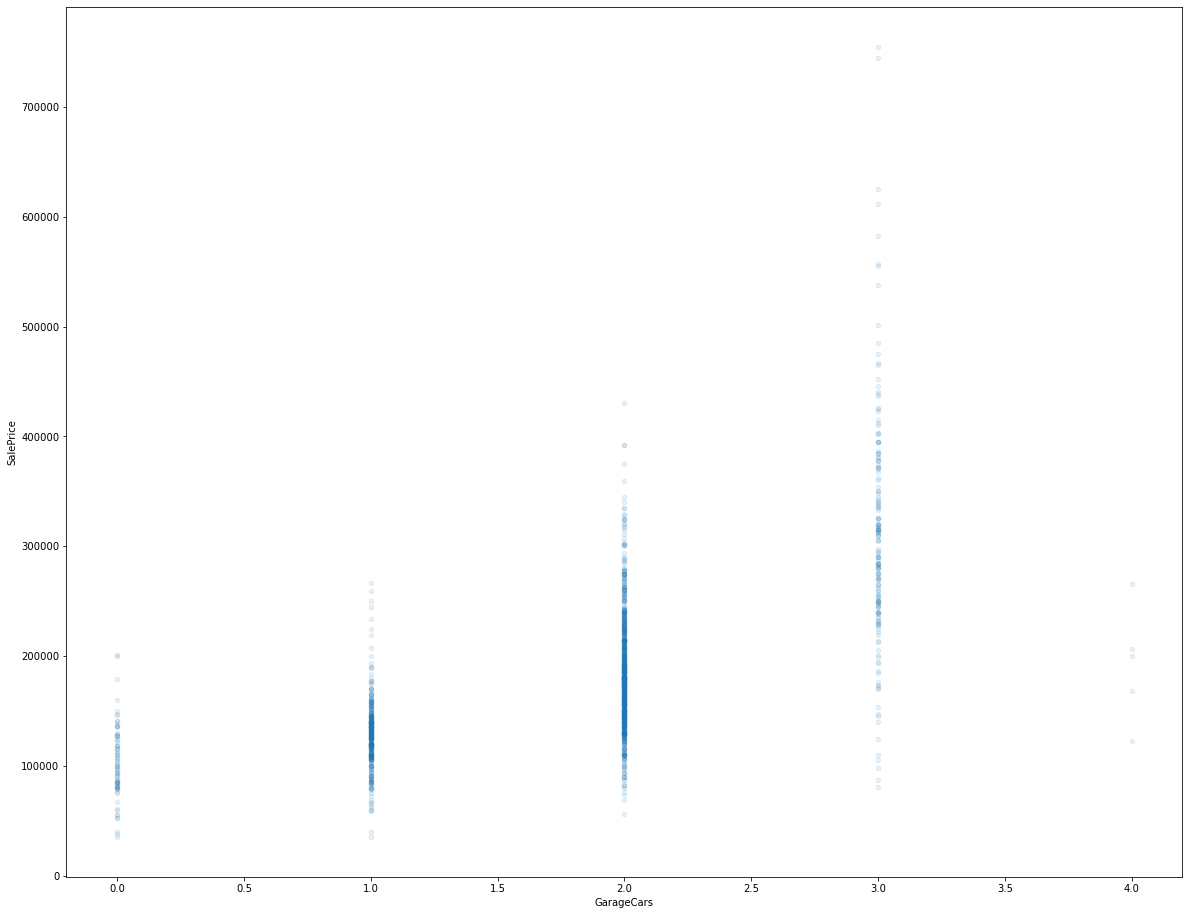

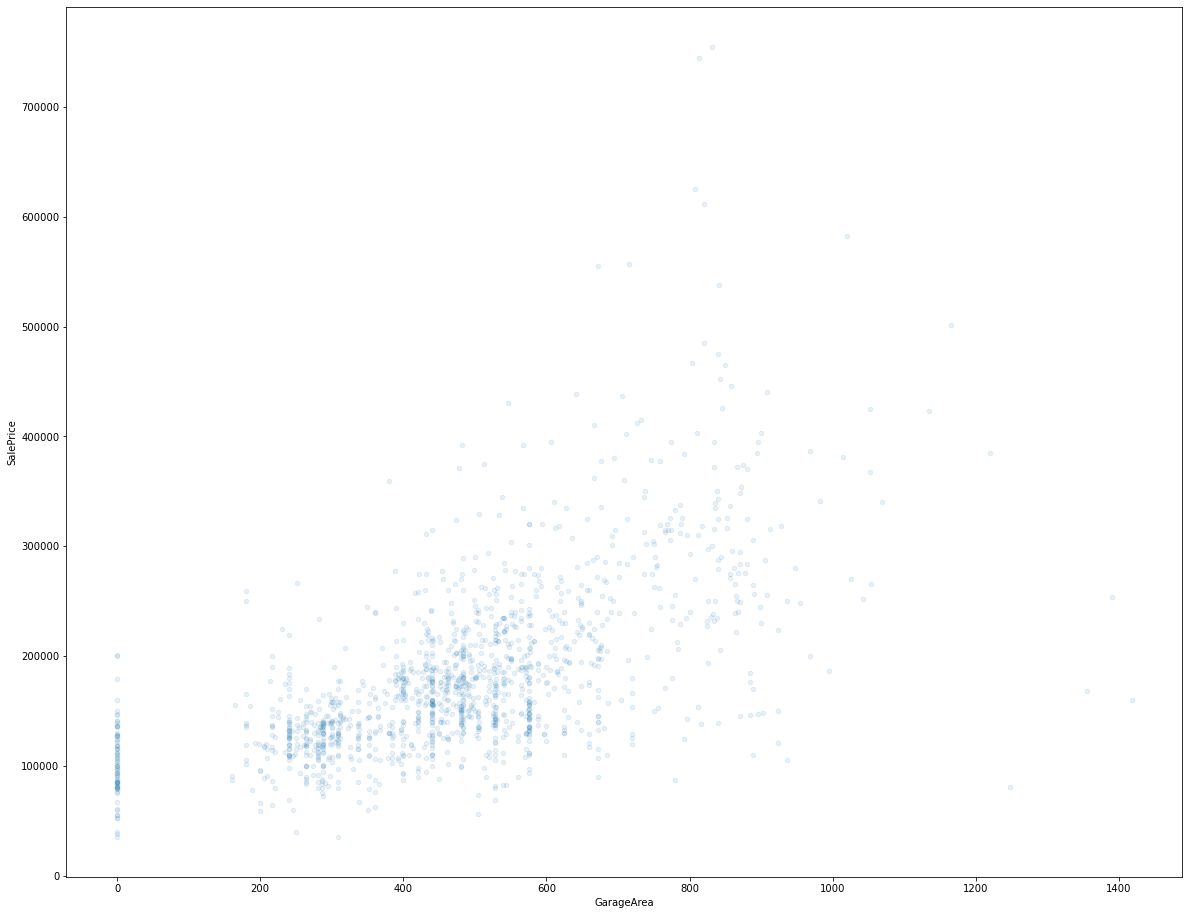

Unable to Plot GarageQual
Unable to Plot GarageCond


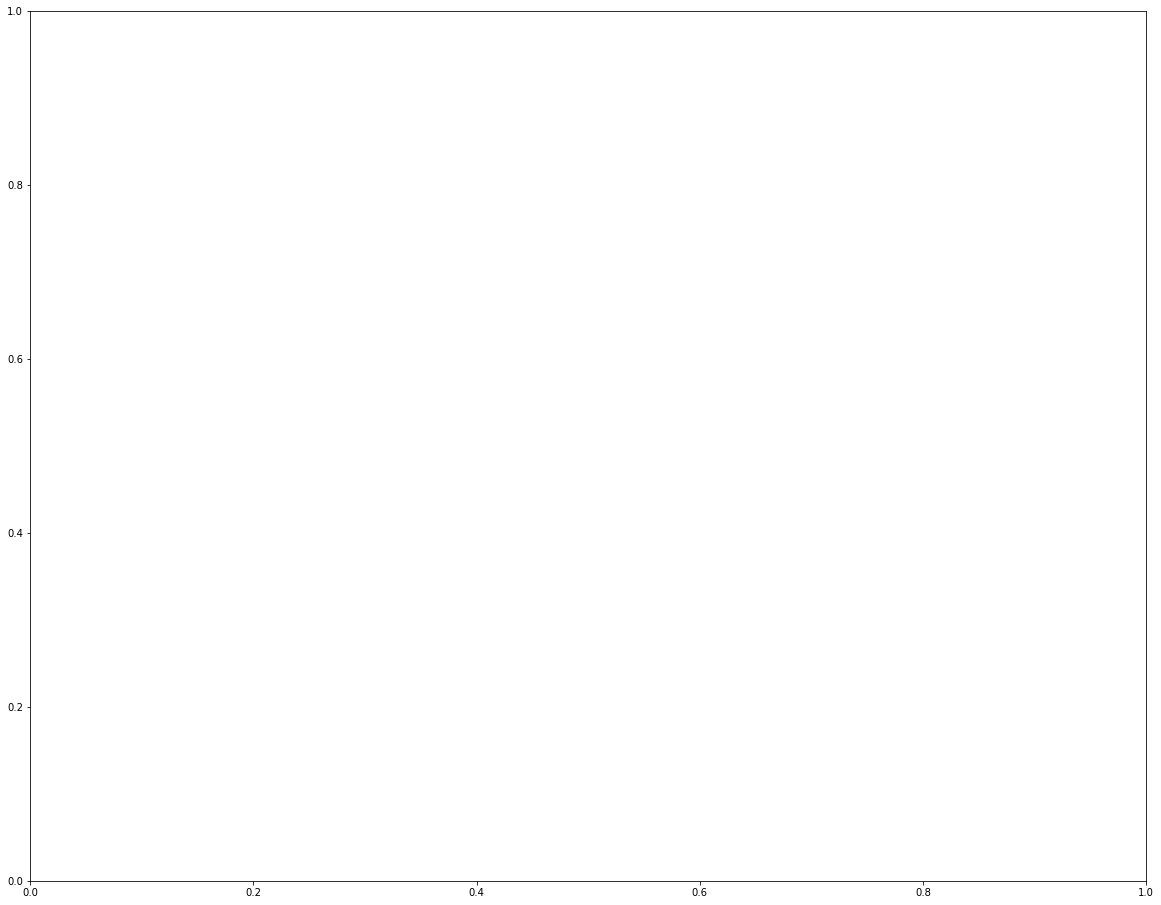

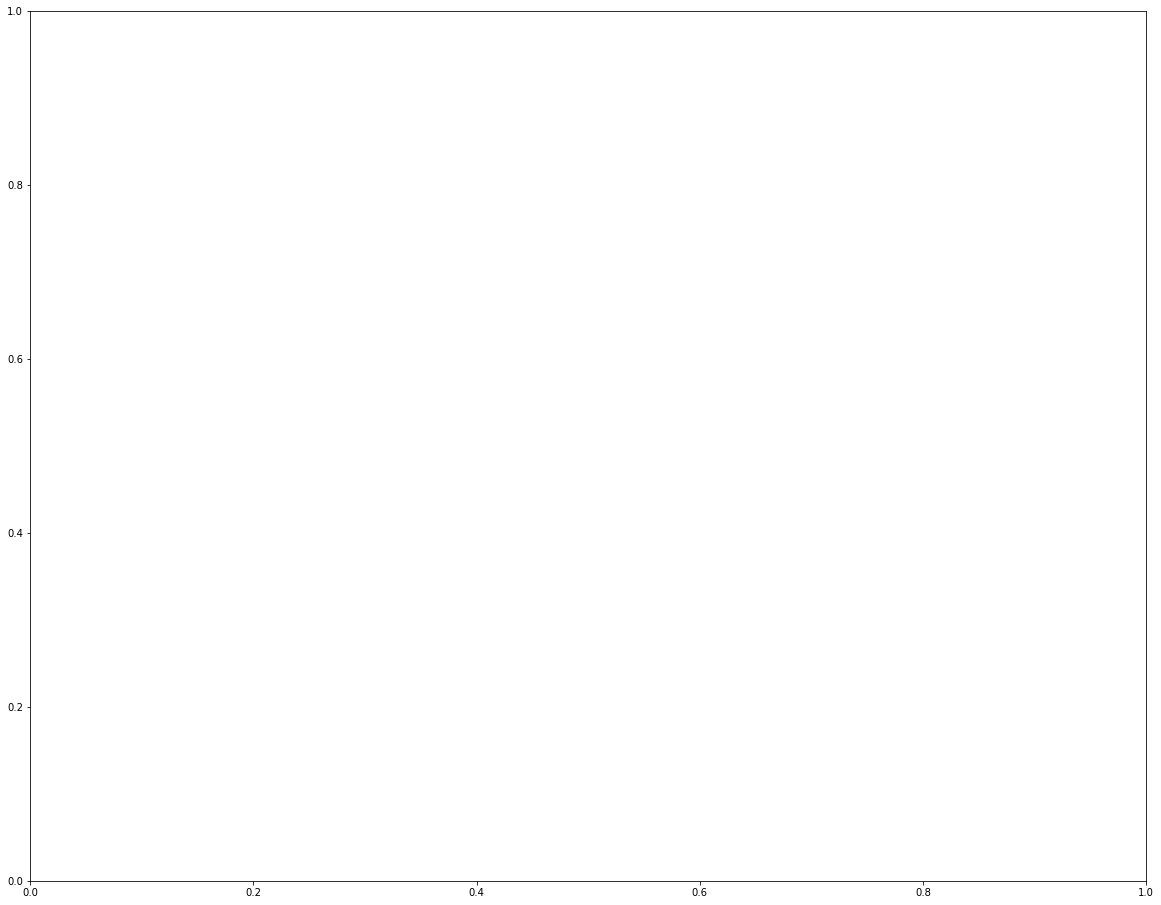

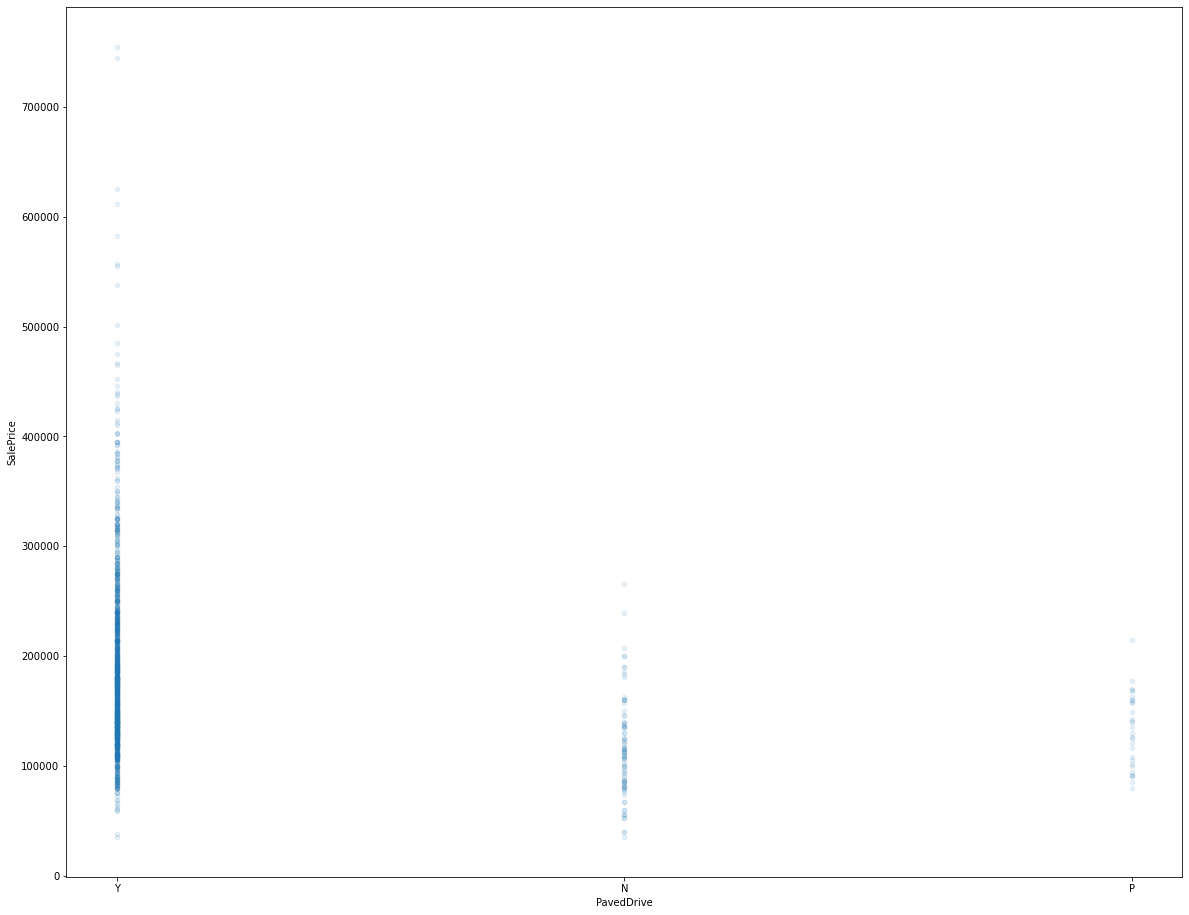

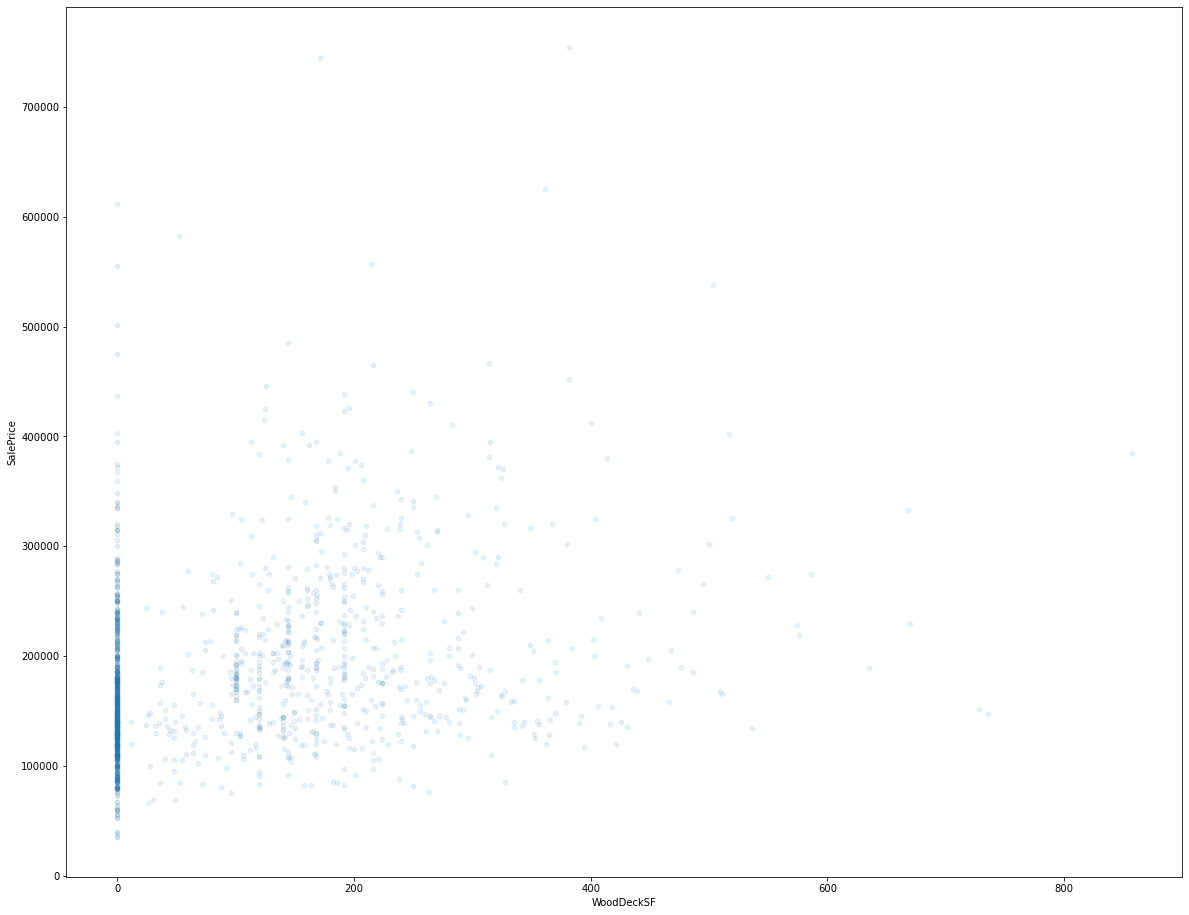

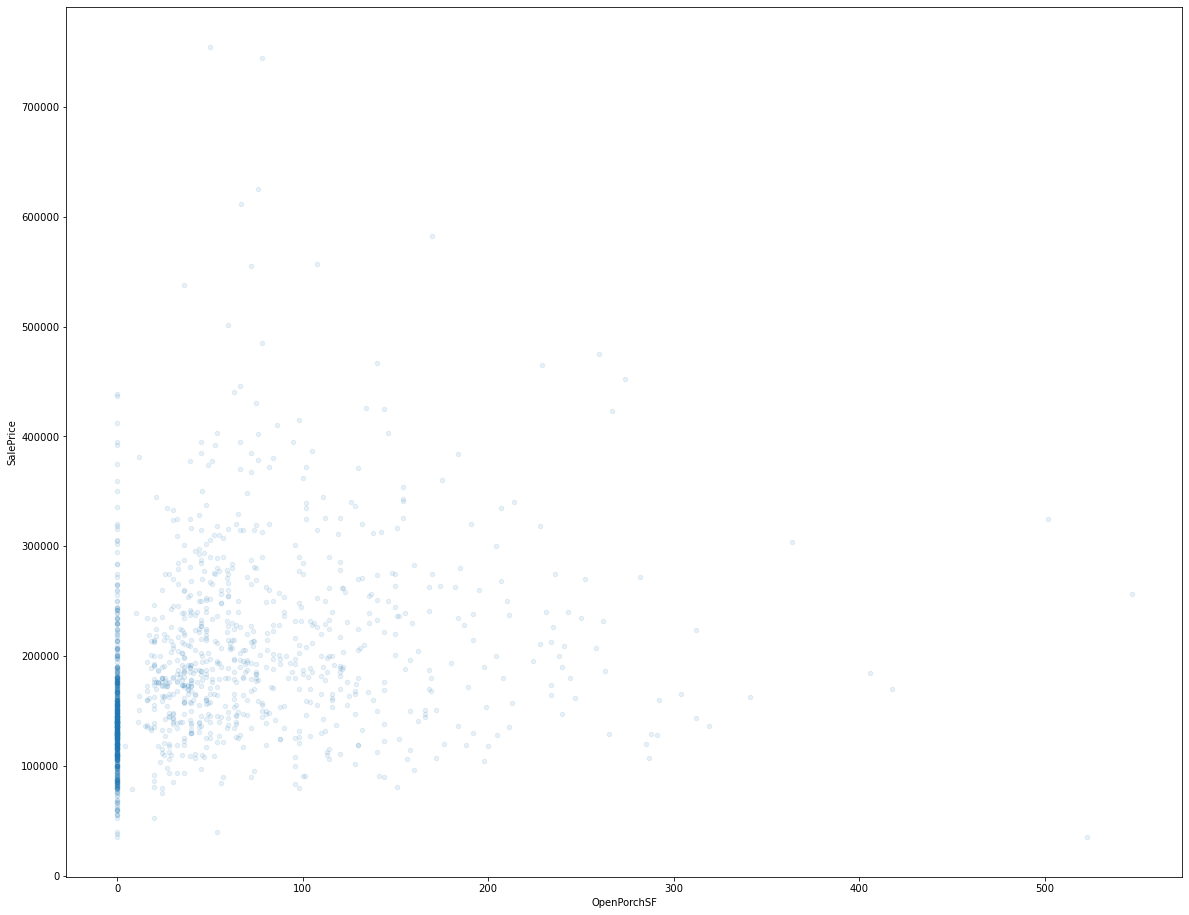

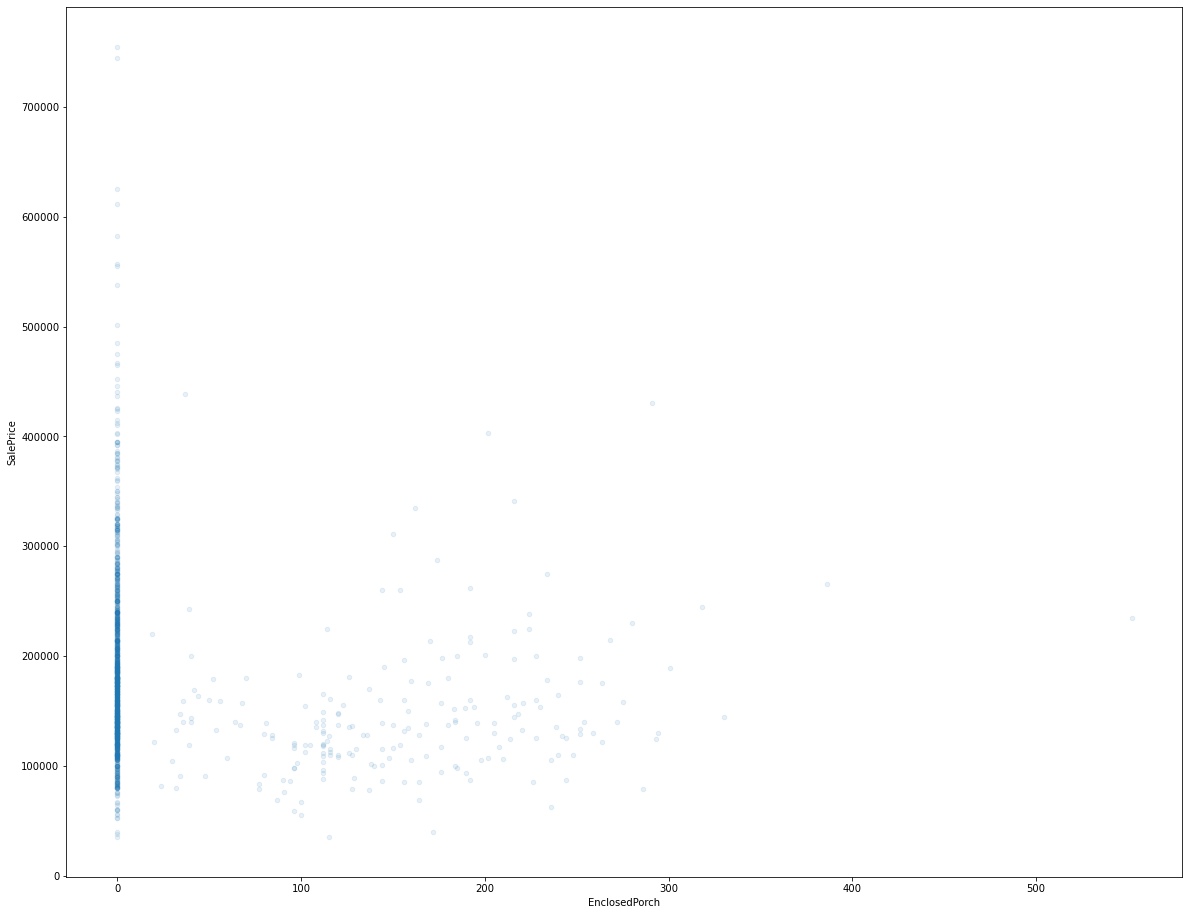

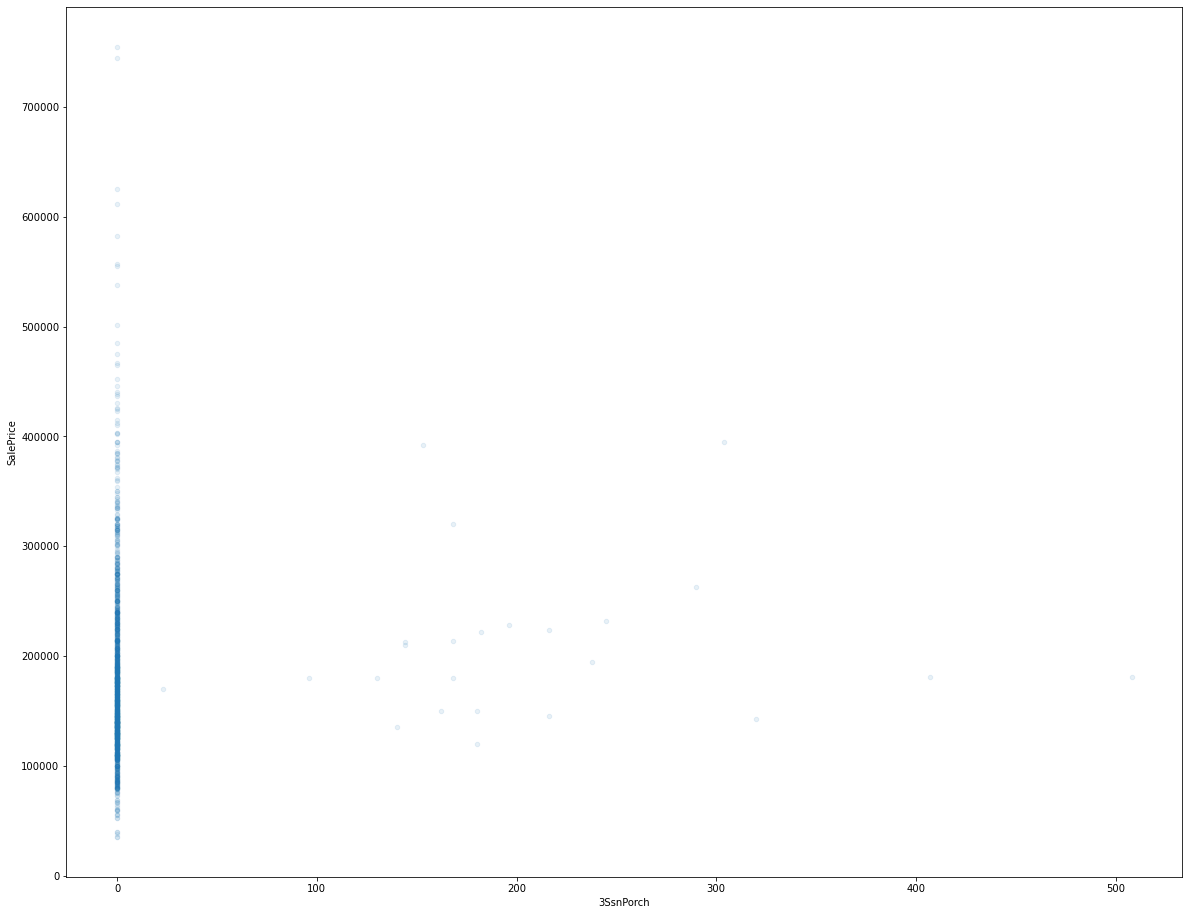

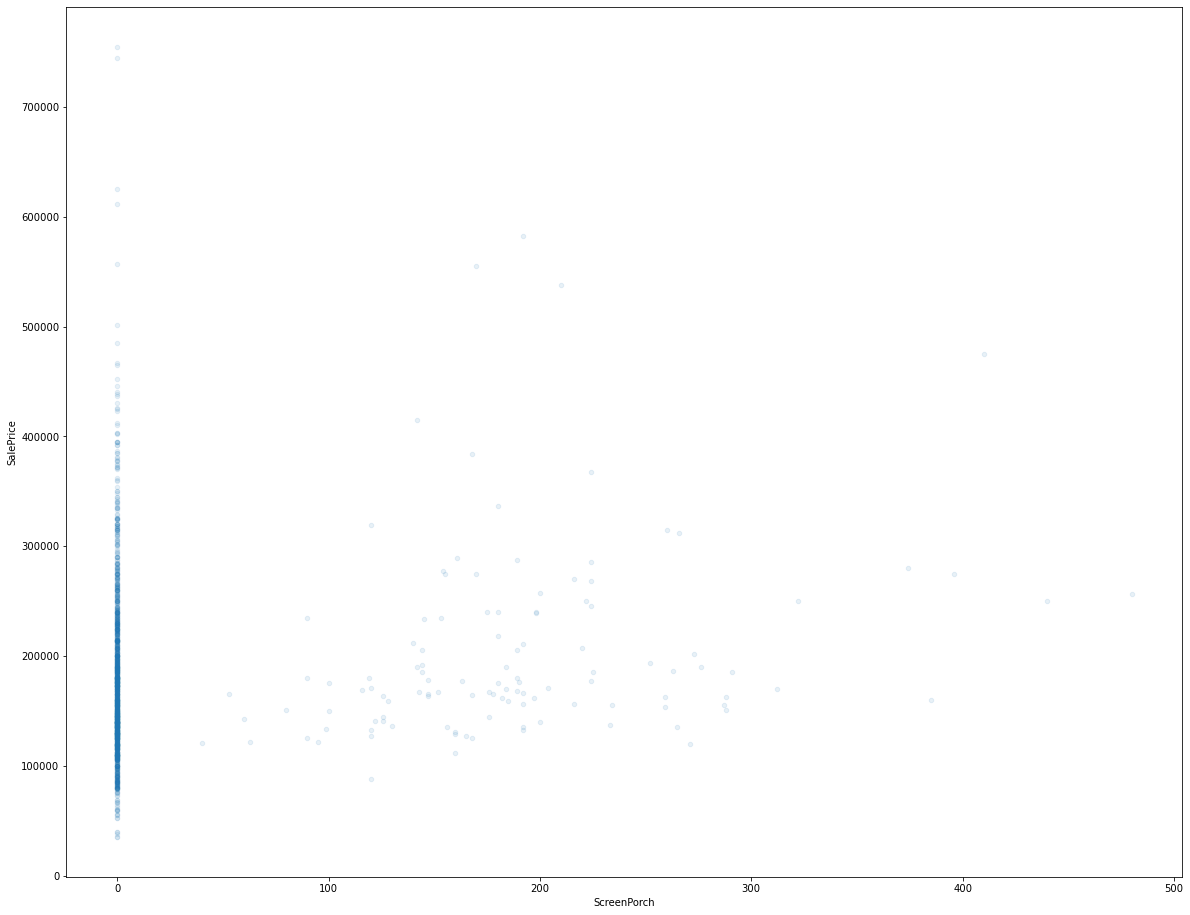

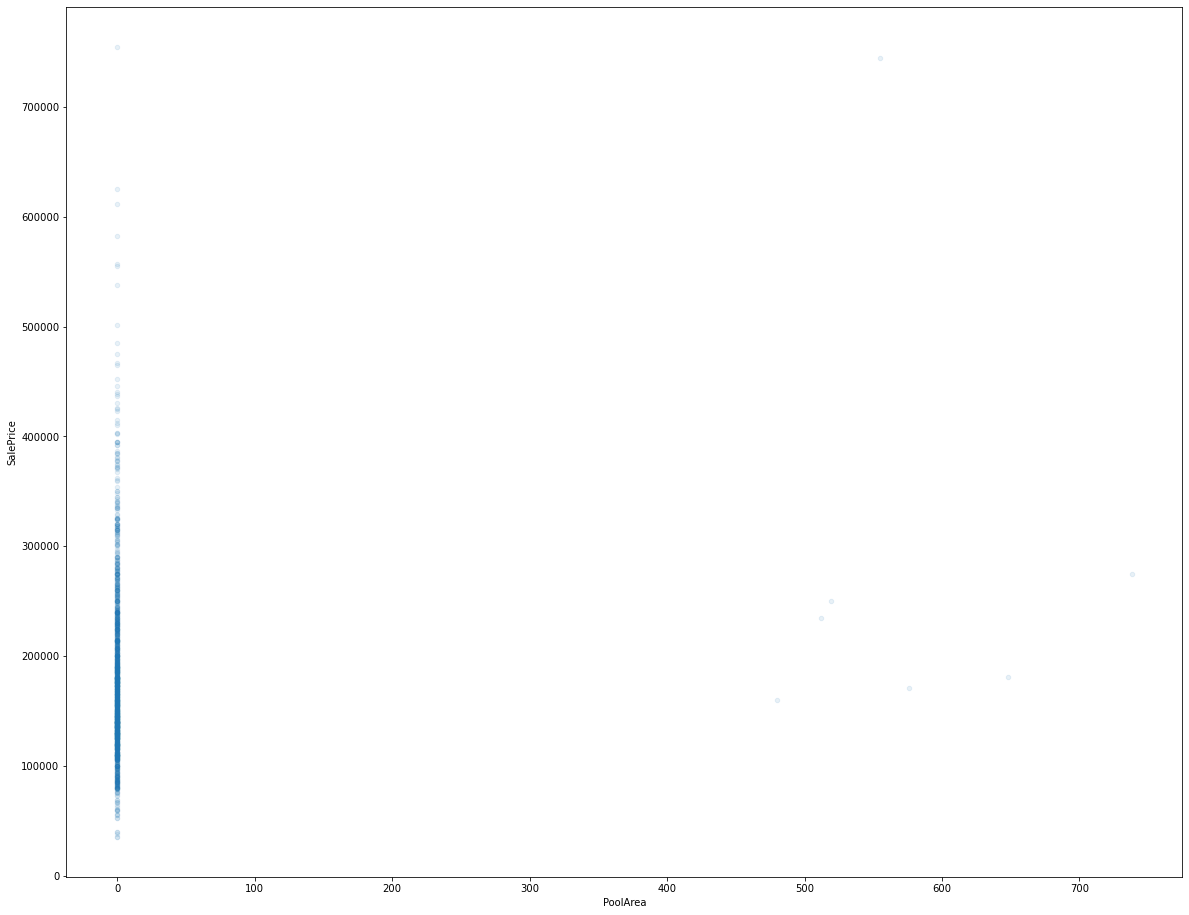

Unable to Plot PoolQC
Unable to Plot Fence
Unable to Plot MiscFeature


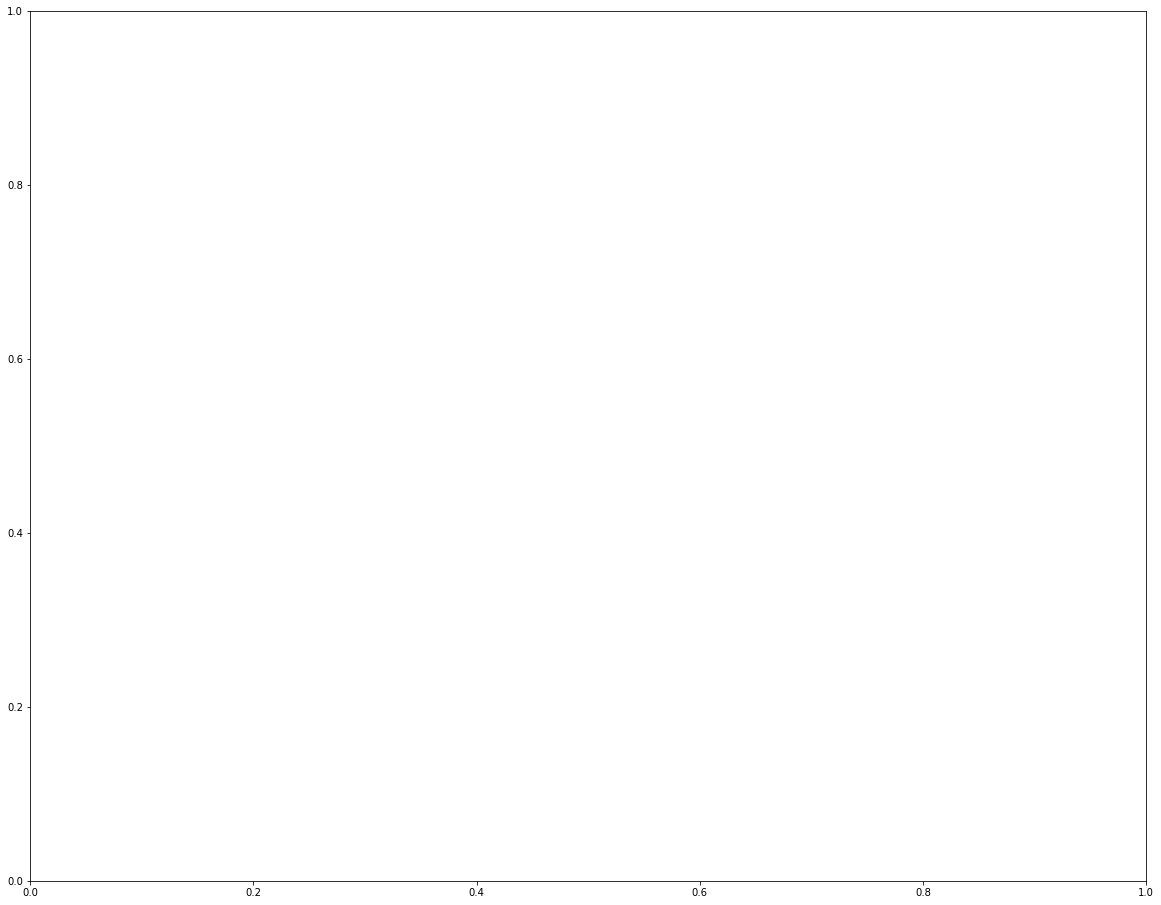

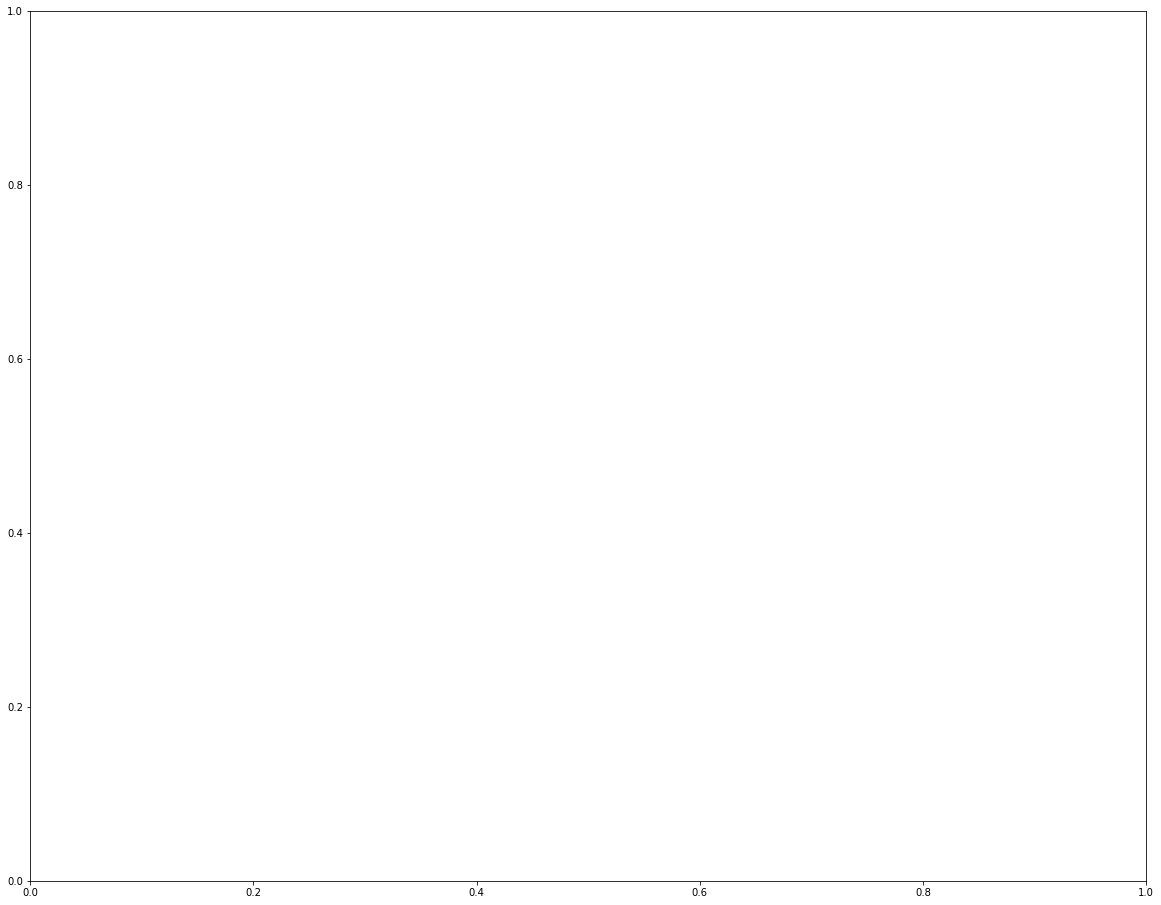

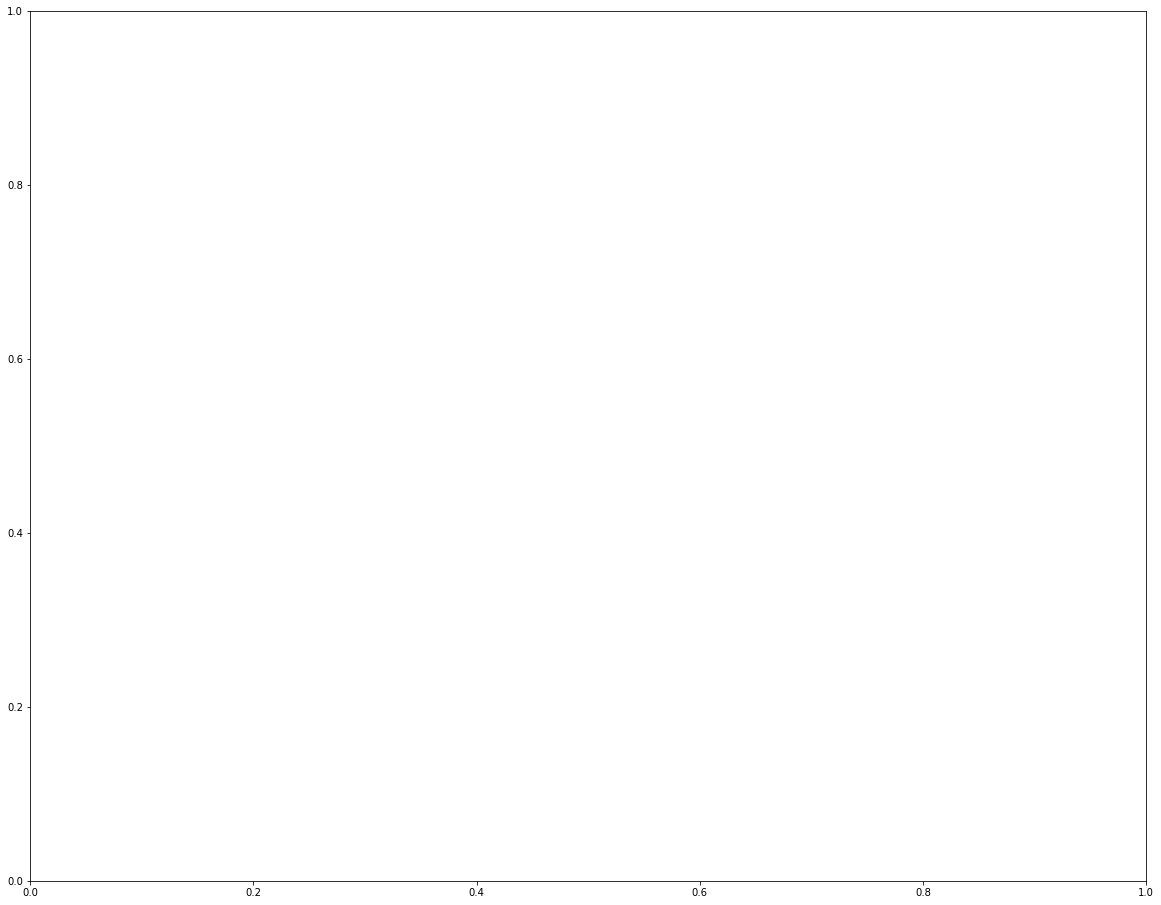

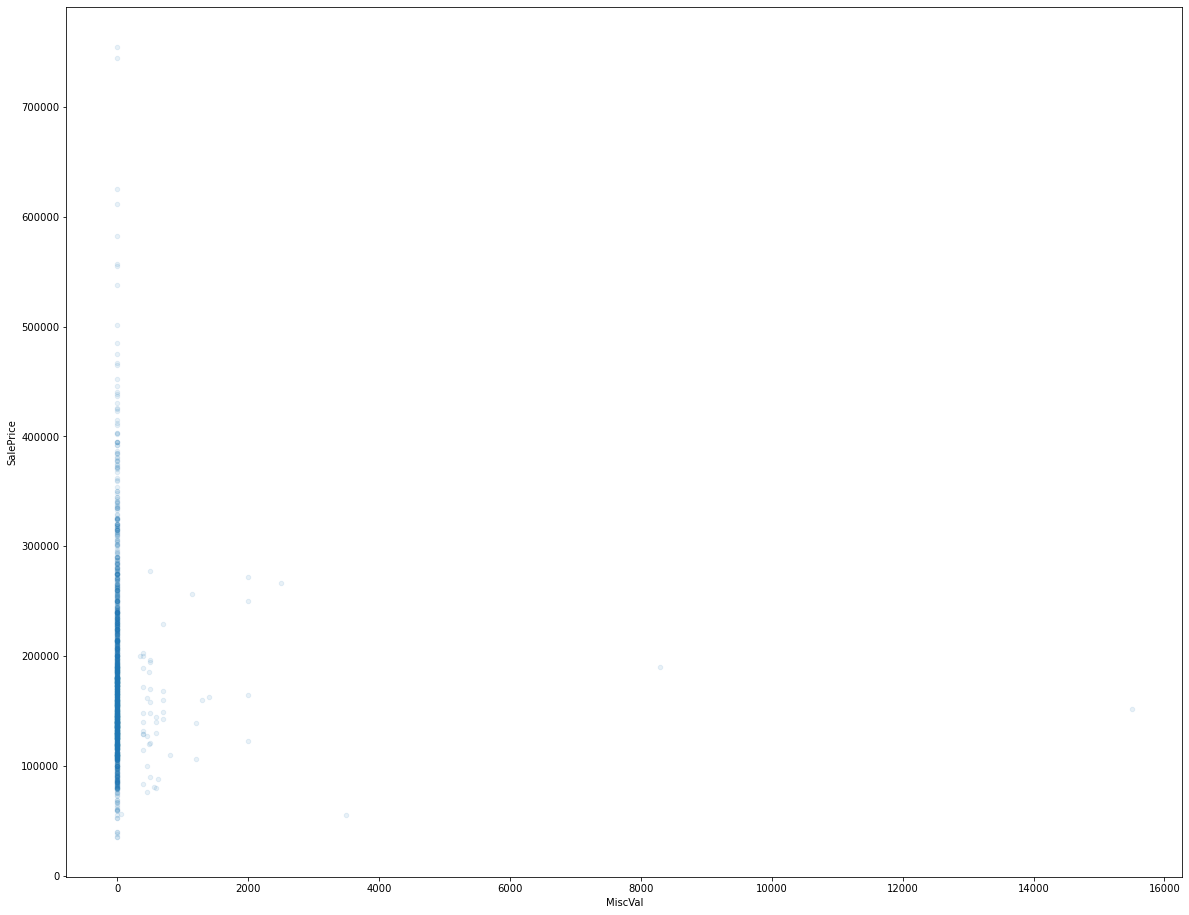

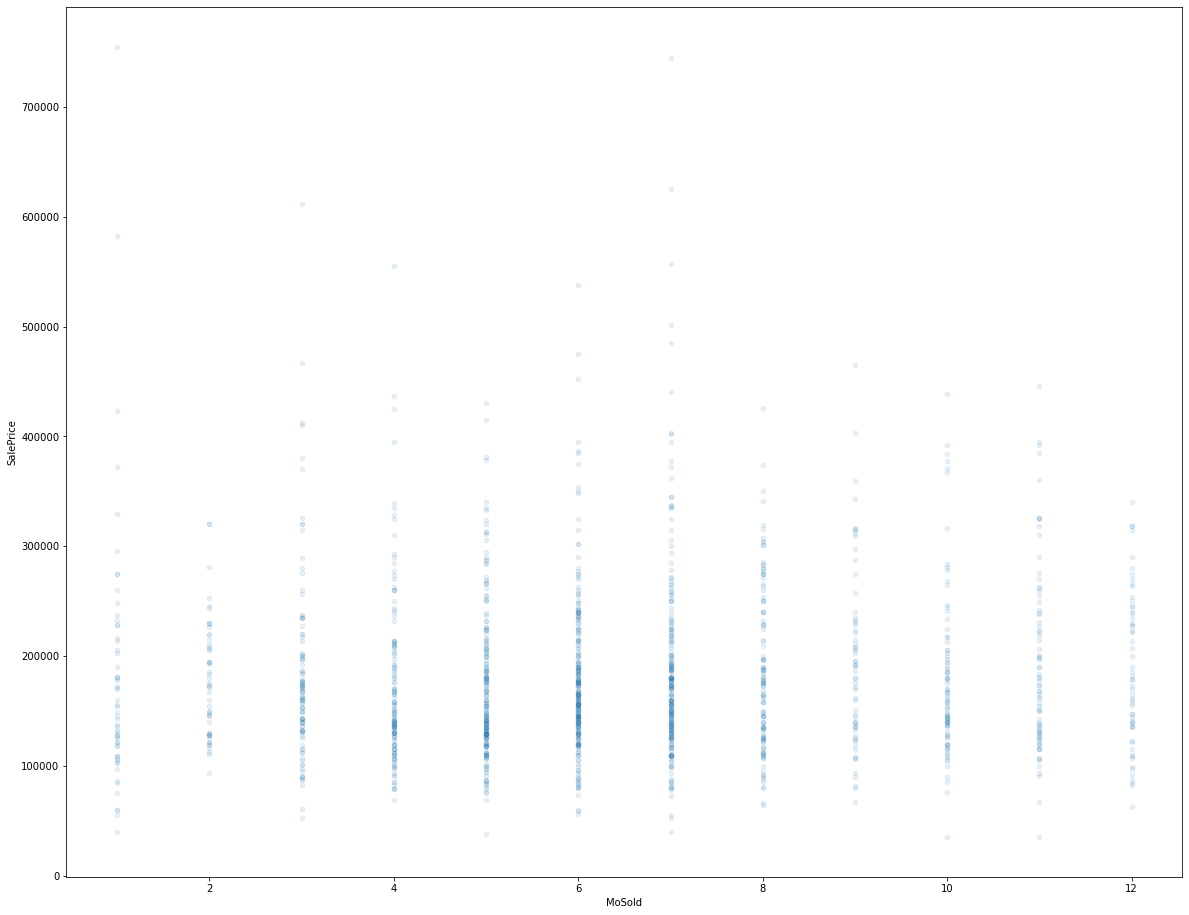

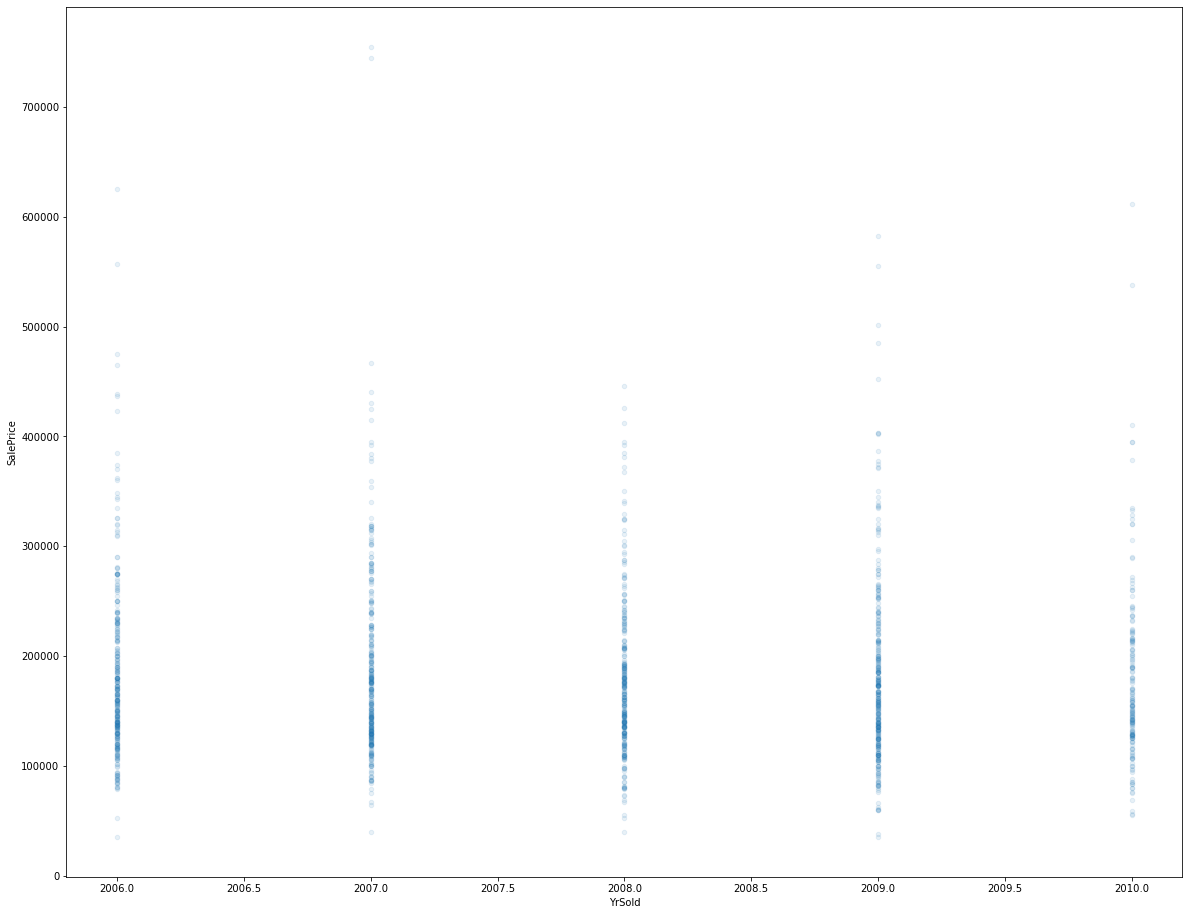

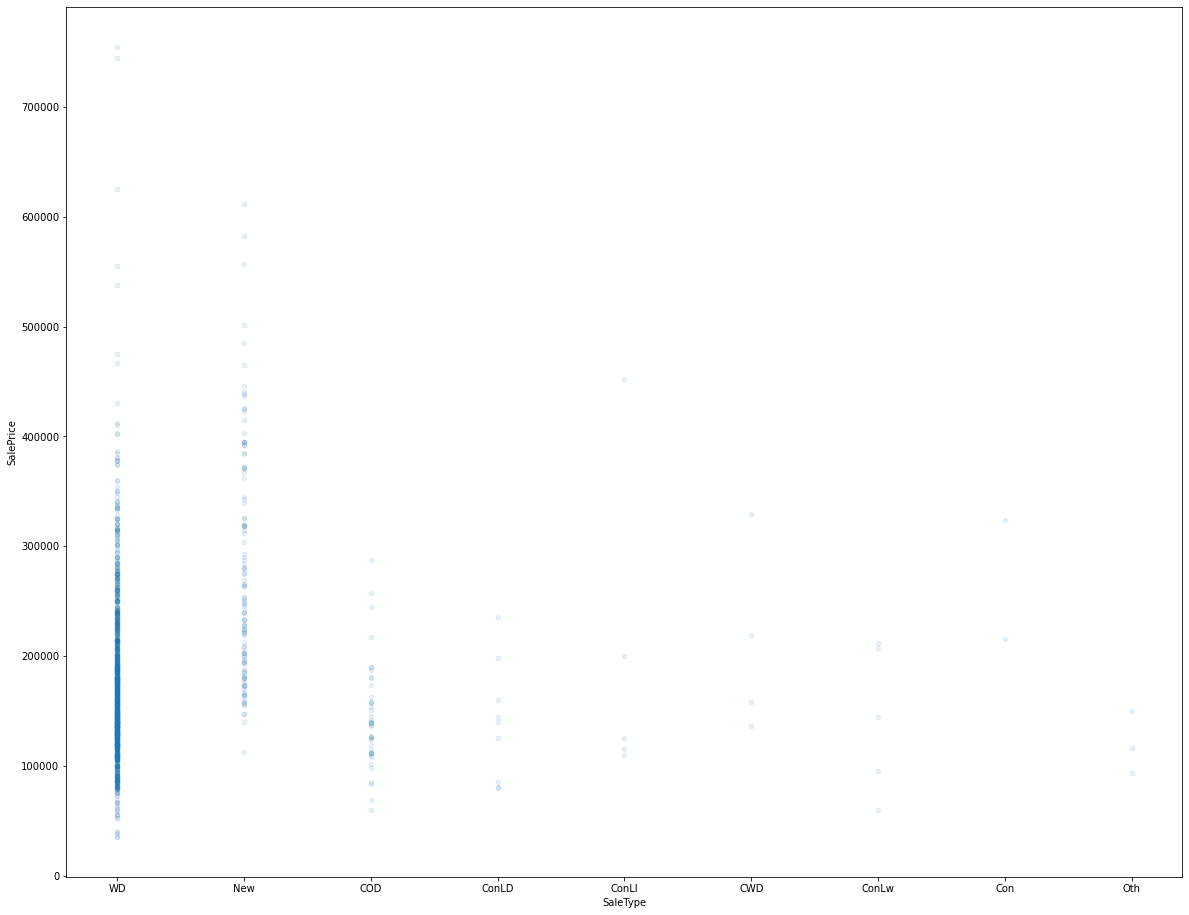

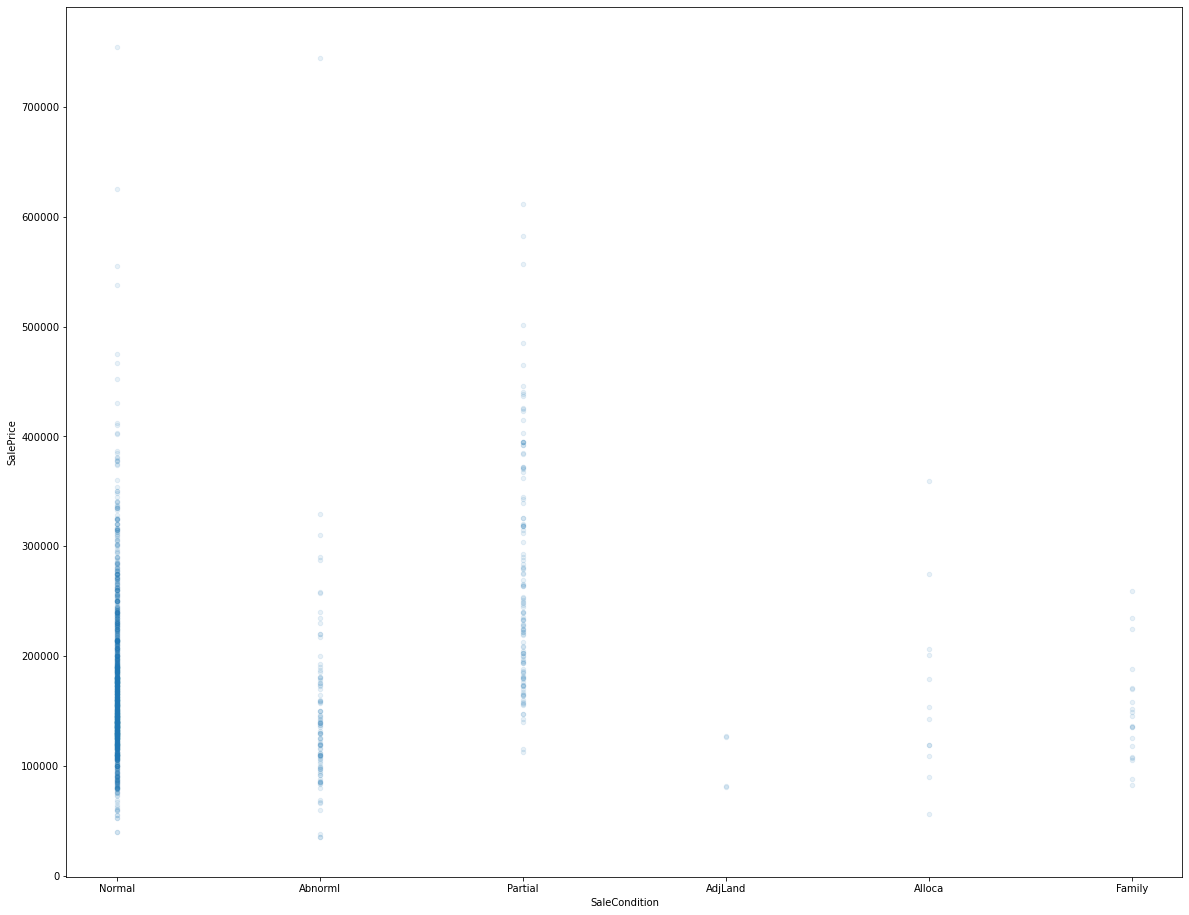

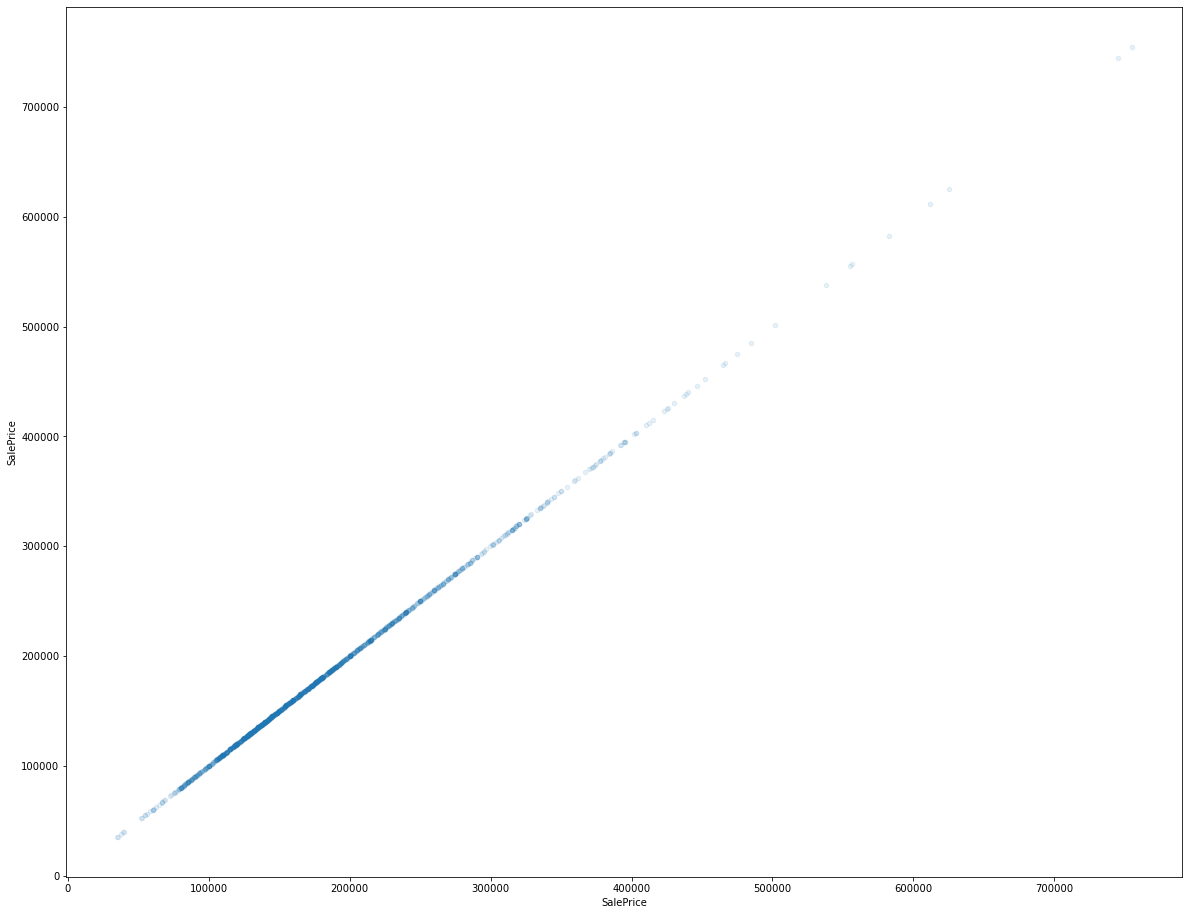

In [7]:
numerical_features = ['MSSubClass',
'LotFrontage',
'LotArea',
'Alley',
'OverallQual',
'OverallCond',
'YearBuilt',
'YearRemodAdd',
'MasVnrType',
'MasVnrArea',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinSF1',
'BsmtFinType2',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'Electrical',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'BsmtFullBath',
'BsmtHalfBath',
'FullBath',
'HalfBath',
'BedroomAbvGr',
'KitchenAbvGr',
'TotRmsAbvGrd',
'Fireplaces',
'FireplaceQu',
'GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageCars',
'GarageArea',
'GarageQual',
'GarageCond',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'PoolQC',
'Fence',
'MiscFeature',
'MiscVal',
'MoSold',
'YrSold',
'SalePrice']

categorical_features = [
    'MSZoning',
'Street',
'Alley',
'LotShape',
'LandContour',
'Utilities',
'LotConfig',
'LandSlope',
'Neighborhood',
'Condition1',
'Condition2',
'BldgType',
'HouseStyle',
'RoofStyle',
'RoofMatl',
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'ExterQual',
'ExterCond',
'Foundation',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'Heating',
'HeatingQC',
'CentralAir',
'Electrical',
'KitchenQual',
'Functional',
'FireplaceQu',
'GarageType',
'GarageFinish',
'GarageQual',
'GarageCond',
'PavedDrive',
'PoolQC',
'Fence',
'MiscFeature',
'SaleType',
'SaleCondition'
]


for feature in train_house_prices_df:
    try:
        train_house_prices_df.plot(kind="scatter", x=feature, y="SalePrice", figsize=(20,16), alpha=0.1)
        plt.show()
    except:
        print(f"Unable to Plot {feature}")

In [8]:
train_df, test_df = train_test_split(train_house_prices_df, test_size=0.2, random_state=123)

X_train = train_df.drop(columns=["SalePrice"])
y_train = train_df["SalePrice"]

X_test = test_df.drop(columns=["SalePrice"])
y_test = test_df["SalePrice"]


neighborhoods = ['Blmngtn',
       'Blueste',
       'BrDale',
       'BrkSide',
       'ClearCr',
       'CollgCr',
       'Crawfor',
       'Edwards',
       'Gilbert',
       'IDOTRR',
       'MeadowV',
       'Mitchel',
       'NAmes',
       'NoRidge',
       'NPkVill',
       'NridgHt',
       'NWAmes',
       'OldTown',
       'SWISU',
       'Sawyer',
       'SawyerW',
       'Somerst',
       'StoneBr',
       'Timber',
       'Veenker']

extCovs = [
    'AsbShng',
    'AsphShn',
    'BrkComm',
    'BrkFace',
    'CBlock',
    'CemntBd',
    'HdBoard',
    'ImStucc',
    'MetalSd',
    'Other',
    'Plywood',
    'PreCast',
    'Stone',
    'Stucco',
    'VinylSd',
    'Wd Sdng',
    'WdShing'
]

heatingVals = ['Floor', 'GasA', 'GasW', 'Grav', 'OthW', 'Wall']


numerical_features = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF', '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd', 'BsmtFinSF1',
                     'OverallCond', 'LowQualFinSF', 'BedroomAbvGr', 'Fireplaces', 'LotArea']

spec_cat_features = ['Neighborhood', 'Exterior1st']

cat_ord_features = ['ExterQual', 'KitchenQual', 'ExterQual', 'Functional', 'ExterCond', 'HeatingQC']
categorical_features = ['Foundation', 'CentralAir', 'LotConfig', 'Condition1', 'BldgType', 'SaleCondition',
                       'MSZoning', ]



numerical_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", drop='if_binary', sparse=False))
cat_ordinal_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"), 
    OrdinalEncoder(categories=[
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
        ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
        ['Po', 'Fa', 'TA', 'Gd', 'Ex']
    ])
)

spec_cat_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", drop="if_binary", sparse=False,
                 categories=[
                     neighborhoods, extCovs
                 ]
    )
)

preprocessor = make_column_transformer(
    (numerical_transformer, numerical_features),
    (categorical_transformer, categorical_features),
    (cat_ordinal_transformer, cat_ord_features),
    (spec_cat_transformer, spec_cat_features)
)
                      
pipeline5 = make_pipeline(
    preprocessor,
    Ridge(alpha=14)
)

                      
cv_scores = cross_validate(pipeline5, X_train, y_train, return_train_score=True)
cv_results = pd.DataFrame(cv_scores)
print(cv_results)
print("Mean")
print(cv_results.mean())

   fit_time  score_time  test_score  train_score
0  0.020470    0.007544    0.804614     0.858897
1  0.020284    0.009086    0.869551     0.846974
2  0.021422    0.008894    0.809506     0.855667
3  0.021346    0.008096    0.894963     0.839910
4  0.021501    0.006001    0.594721     0.880486
Mean
fit_time       0.021005
score_time     0.007924
test_score     0.794671
train_score    0.856387
dtype: float64


In [9]:
pipeline5.fit(X_train, y_train)
test = pd.read_csv('house-prices/test.csv')
y_pred = pipeline5.predict(test)
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
submission.to_csv('submission_csv/submission1.csv', index=False)

In [10]:
# perform a grid search to determine the best hyperparameters of the Ridge model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge__alpha': [0.1, 1, 10, 100, 1000],
    'ridge__solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}
ridge_grid_search = GridSearchCV(pipeline5, param_grid, cv=5, n_jobs=-1, return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Score: {ridge_grid_search.best_score_}')

Best parameters: {'ridge__alpha': 10, 'ridge__solver': 'lsqr'}
Best Score: 0.7945316927378783


In [11]:
param_grid = {
    'ridge__alpha': range(8,20),
    'ridge__solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}
ridge_grid_search = GridSearchCV(pipeline5, param_grid, cv=5, n_jobs=-1, return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Score: {ridge_grid_search.best_score_}')


Best parameters: {'ridge__alpha': 14, 'ridge__solver': 'sparse_cg'}
Best Score: 0.7949184712999495


In [12]:
pipeline6 = make_pipeline(
    preprocessor,
    decomposition.PCA(),
    Ridge(alpha=14)
)

param_grid = {
    'pca__n_components': range(60,81,1),
    'ridge__alpha': range(8,17),
    'ridge__solver': ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]
}
ridge_grid_search = GridSearchCV(pipeline6, param_grid, cv=5, n_jobs=-1, return_train_score=True)
ridge_grid_search.fit(X_train, y_train)

print(f'Best parameters: {ridge_grid_search.best_params_}')
print(f'Best Score: {ridge_grid_search.best_score_}')

pipeline6.fit(X_train, y_train)
test = pd.read_csv('house-prices/test.csv')
y_pred = pipeline6.predict(test)
submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_pred})
submission.to_csv('submission_csv/submission2.csv', index=False)

Best parameters: {'pca__n_components': 78, 'ridge__alpha': 12, 'ridge__solver': 'sparse_cg'}
Best Score: 0.7951018224670595
